# Macrofinancial Analysis

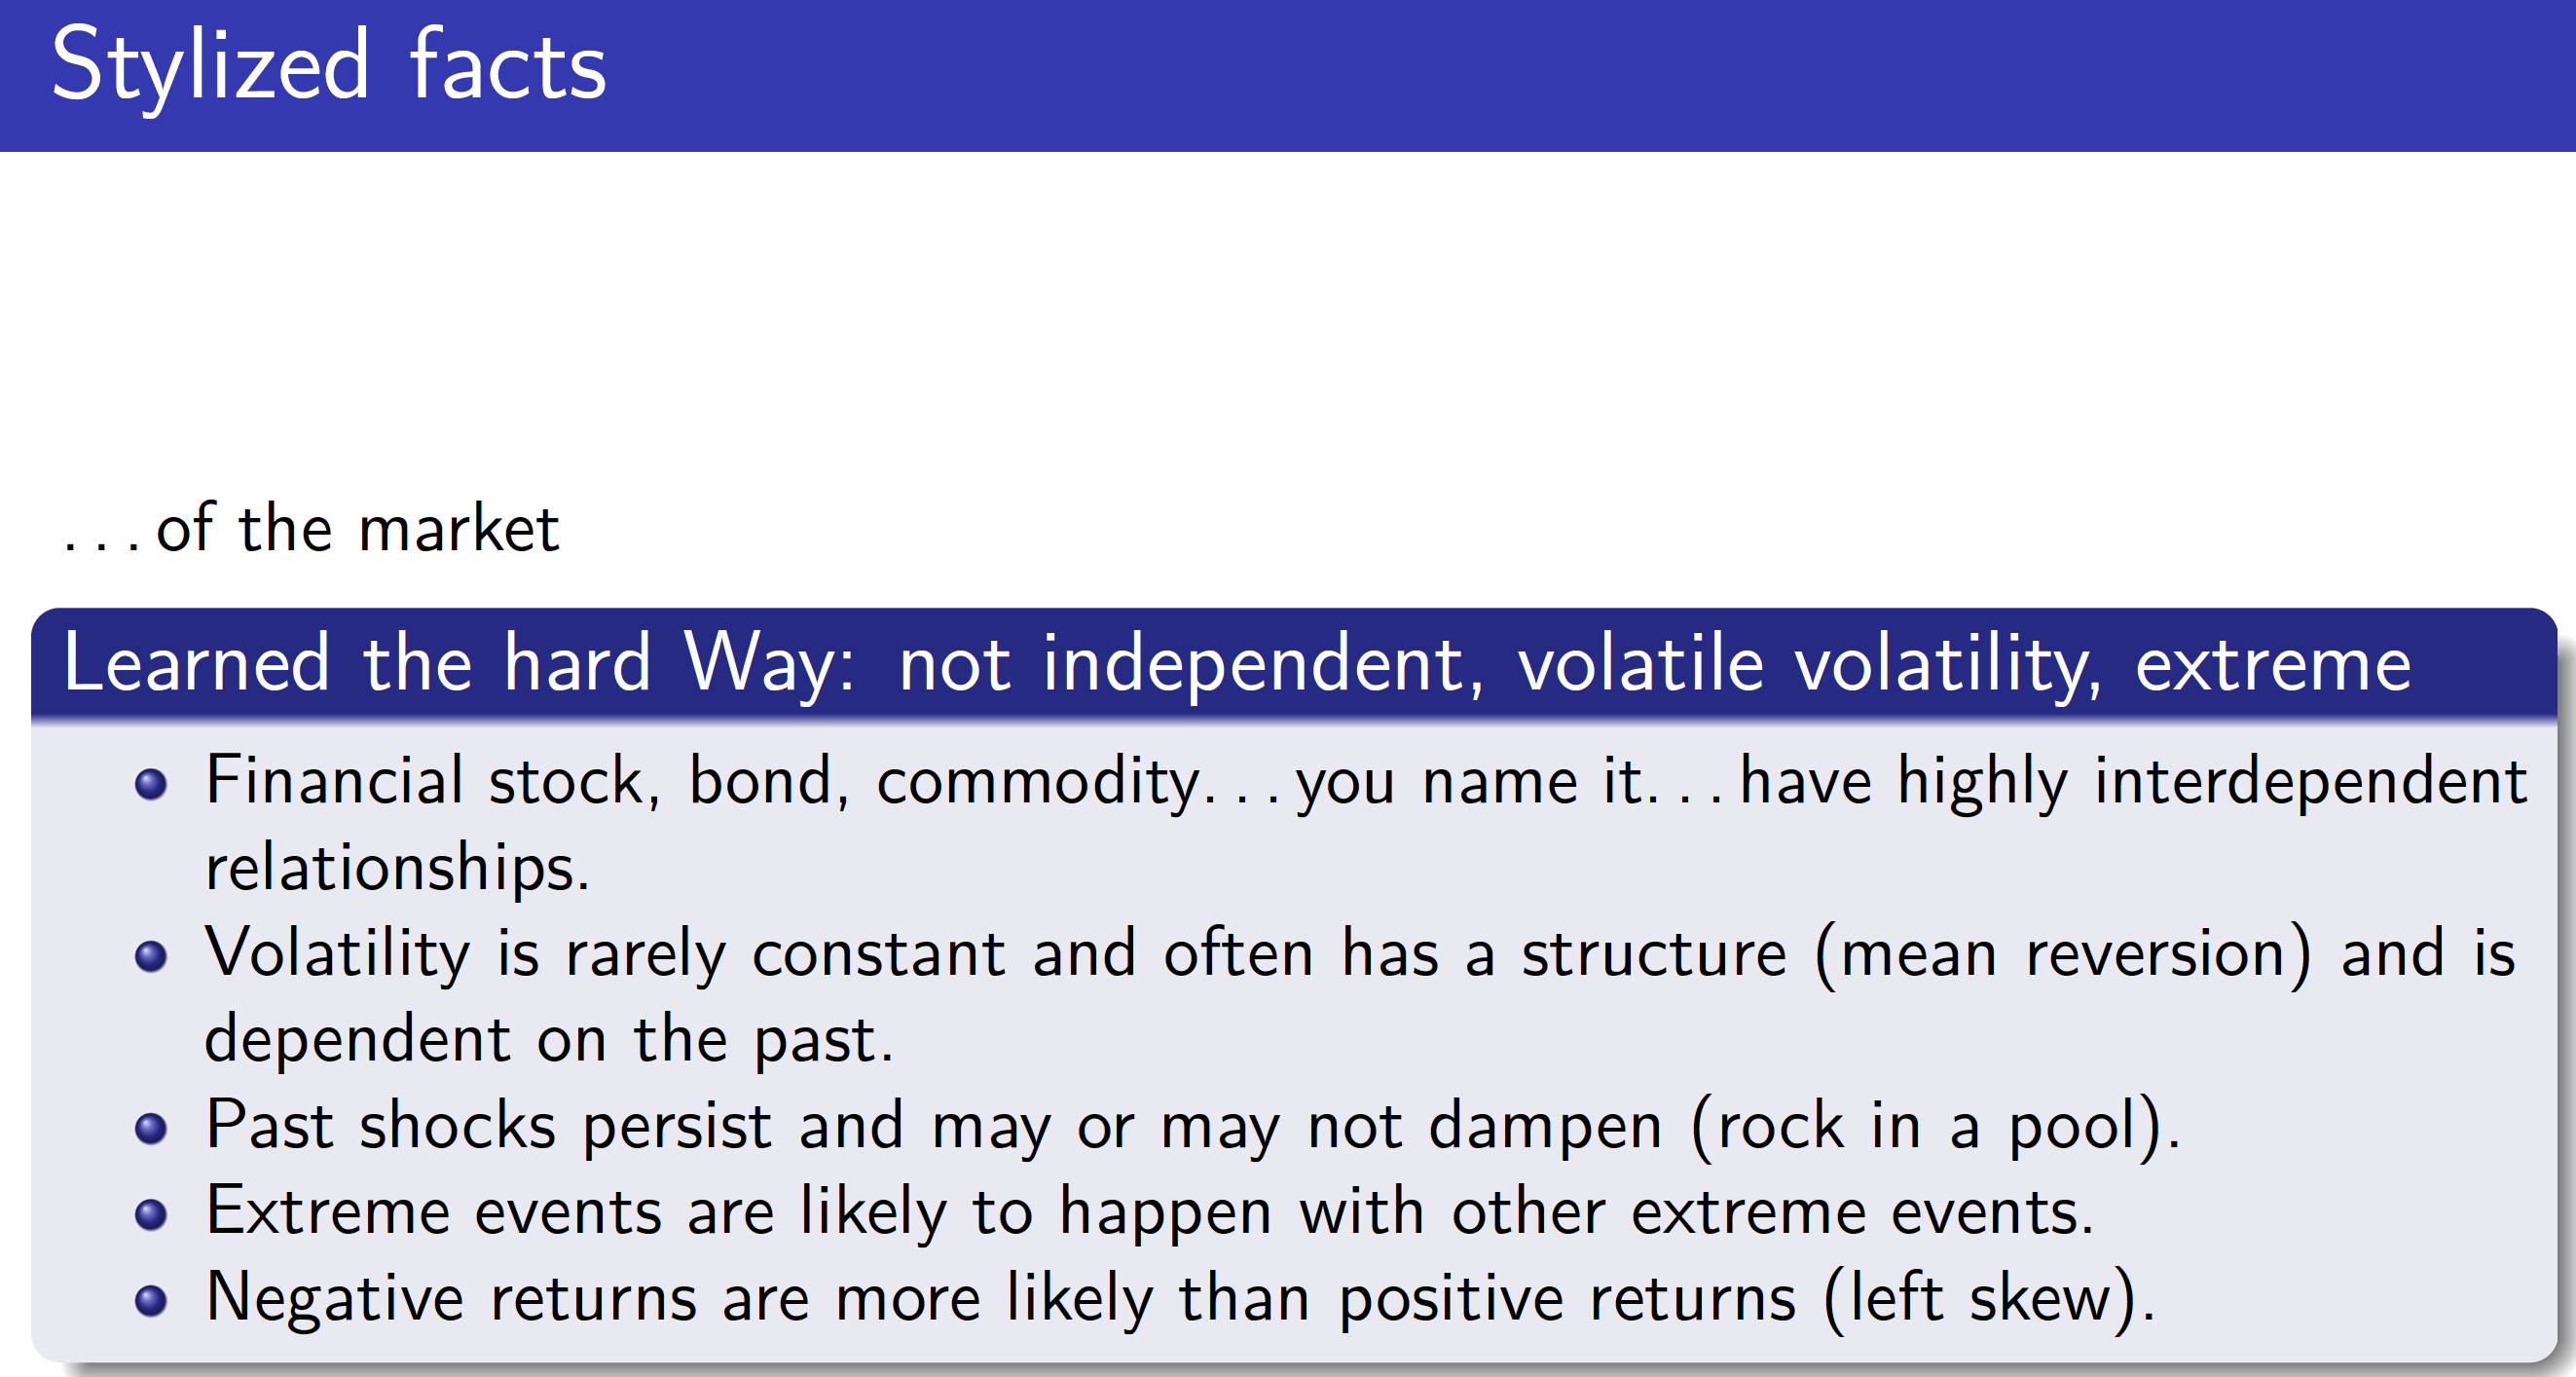

In [3]:
display_png(file = "Screen Shot 2020-01-24 at 12.53.04 PM.png")

In [2]:
# Libraries 
library(ggplot2)
library(IRdisplay)
library(psych)
library(GGally)
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ psych::%+%()    masks ggplot2::%+%()
✖ psych::alpha()  masks ggplot2::alpha()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# install
install.packages(c("fBasics","evir","qrmdata", "zoo"))

Warning message in install.packages(c("fBasics", "evir", "qrmdata", "zoo")):
“installation of package ‘fBasics’ had non-zero exit status”
Warning message in install.packages(c("fBasics", "evir", "qrmdata", "zoo")):
“installation of package ‘zoo’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
# additional Libraries
library(fBasics)
library(evir)
library(qrmdata)
library(zoo)

Loading required package: timeDate

Loading required package: timeSeries


Attaching package: ‘timeSeries’


The following object is masked from ‘package:psych’:

    outlier



Attaching package: ‘fBasics’


The following object is masked from ‘package:psych’:

    tr



Attaching package: ‘evir’


The following object is masked from ‘package:ggplot2’:

    qplot


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [15]:
install.packages("repr")

also installing the dependencies ‘ellipsis’, ‘rlang’, ‘vctrs’, ‘pillar’


Warning message in install.packages("repr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("repr"):
“installation of package ‘ellipsis’ had non-zero exit status”
Warning message in install.packages("repr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("repr"):
“installation of package ‘pillar’ had non-zero exit status”
Warning message in install.packages("repr"):
“installation of package ‘repr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
data(OIL_Brent)
str(OIL_Brent)

An ‘xts’ object on 1987-05-20/2015-12-28 containing:
  Data: num [1:7258, 1] 18.6 18.4 18.6 18.6 18.6 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "OIL_Brent"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [7]:
# Let's create brent price as an object
Brent.price <- as.zoo(OIL_Brent)
Brent.return <- diff(log(Brent.price))[-1] *100

colnames(Brent.return)<-"Brent.return"
head(Brent.return, n = 5)

           Brent.return
1987-05-22    0.5405419
1987-05-25    0.2691792
1987-05-26    0.1611604
1987-05-27   -0.1611604
1987-05-28    0.0000000

## Resize the plot dimentions

In [22]:
options(repr.plot.width=14, repr.plot.height=9) 

Warning message in plot.window(...):
“"title" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"title" is not a graphical parameter”
Warning message in axis(side, at = z, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in box(...):
“"title" is not a graphical parameter”
Warning message in title(...):
“"title" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"title" is not a graphical parameter”


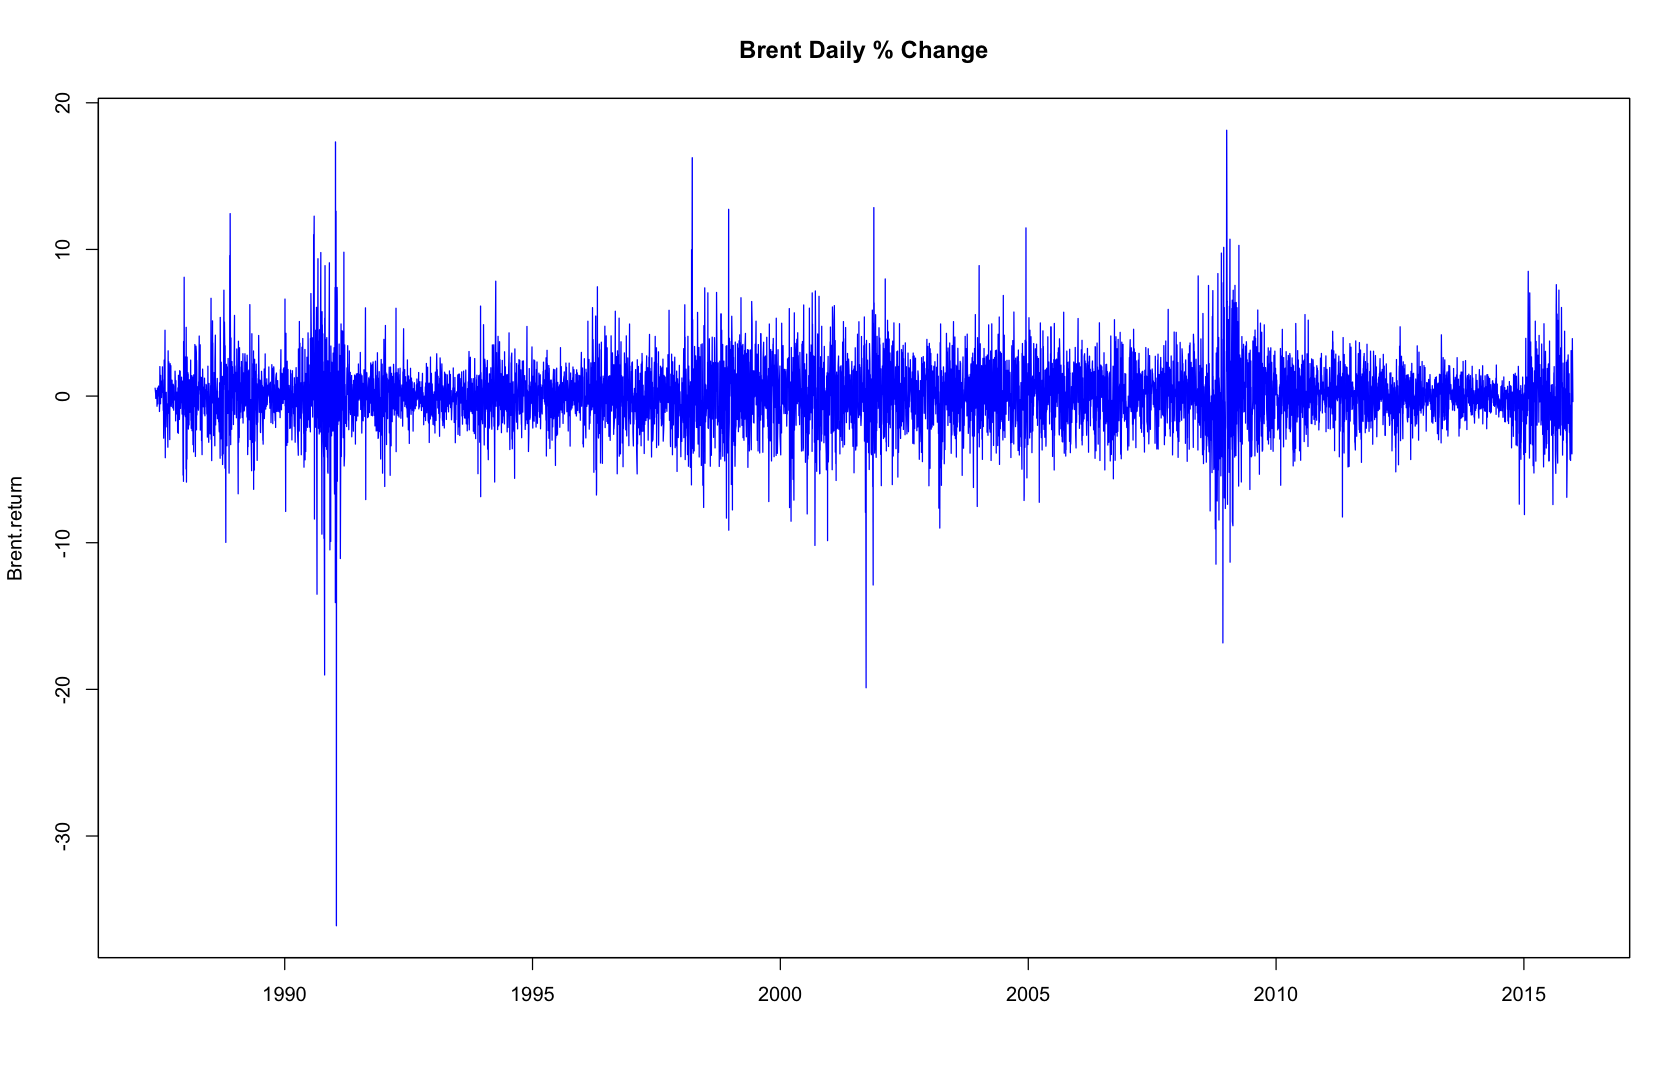

In [23]:
plot(Brent.return, title = FALSE, xlab = "",
    main = "Brent Daily % Change", col= "blue")

**Comment on the likelihood of positive versus negative returns. You might want to look up
skewness and kurtosis definitions and ranges.**

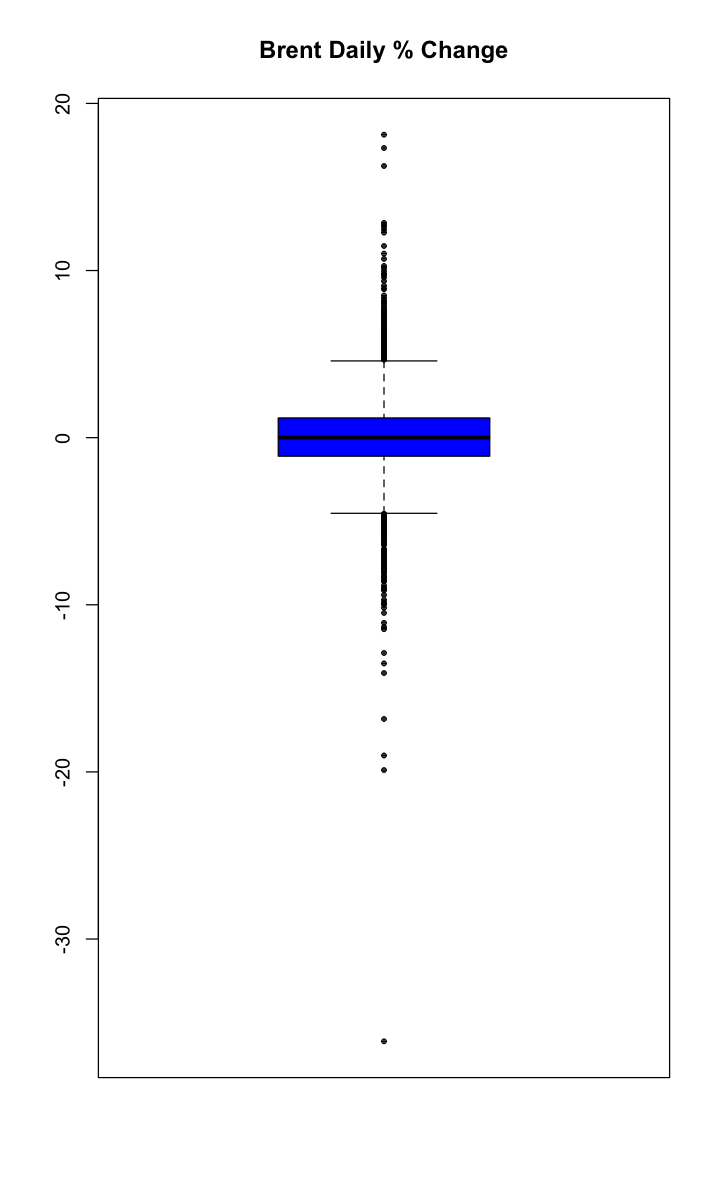

In [32]:
options(repr.plot.width=6, repr.plot.height=10) 
boxplot(as.vector(Brent.return), title = FALSE,
main = "Brent Daily % Change", col = "blue",
cex = 0.5, pch = 10)

**A negative skew means there are more observations less than the median than greater.**

**This high a kurtosis means a pretty heavy tail, especially in negative returns. That means they have happened more often than positive returns.**

**A preponderance of negative returns frequently happening spells trouble for the holding of
these assets.**

## Implications
Budget for the body of the distribution from the mean and out to positive
levels.

Build a comprehensive playbook for the strong possibility that bad tail events
frequently happen and might happen again

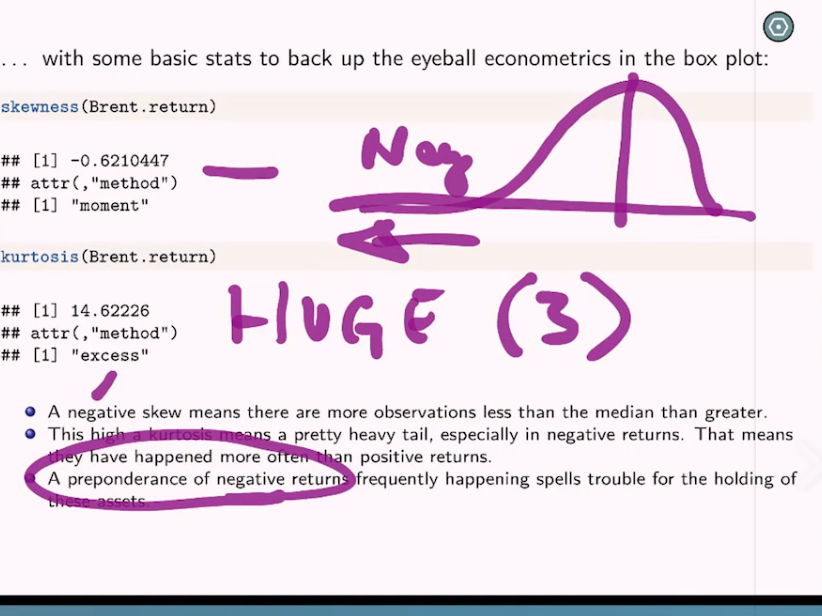

In [45]:
display_png(file = "Screen Shot 2020-01-24 at 2.31.08 PM.png")

In [33]:
skewness(Brent.return)
kurtosis(Brent.return)


[1] -0.6210447
attr(,"method")
[1] "moment"

[1] 14.62226
attr(,"method")
[1] "excess"

**Let's look at persistence:**

Confidence intervals are the red dashed lines. 
ACF at lag 6 means the correlation of current Brent returns with returns 6 trading days ago, including any correlations from trading day 1 through 6.

PACF is simpler: it is the raw correlation between day 0 and day 6. ACF starts at lag 0 (today);
PACF starts at lag 1 (yesterday)

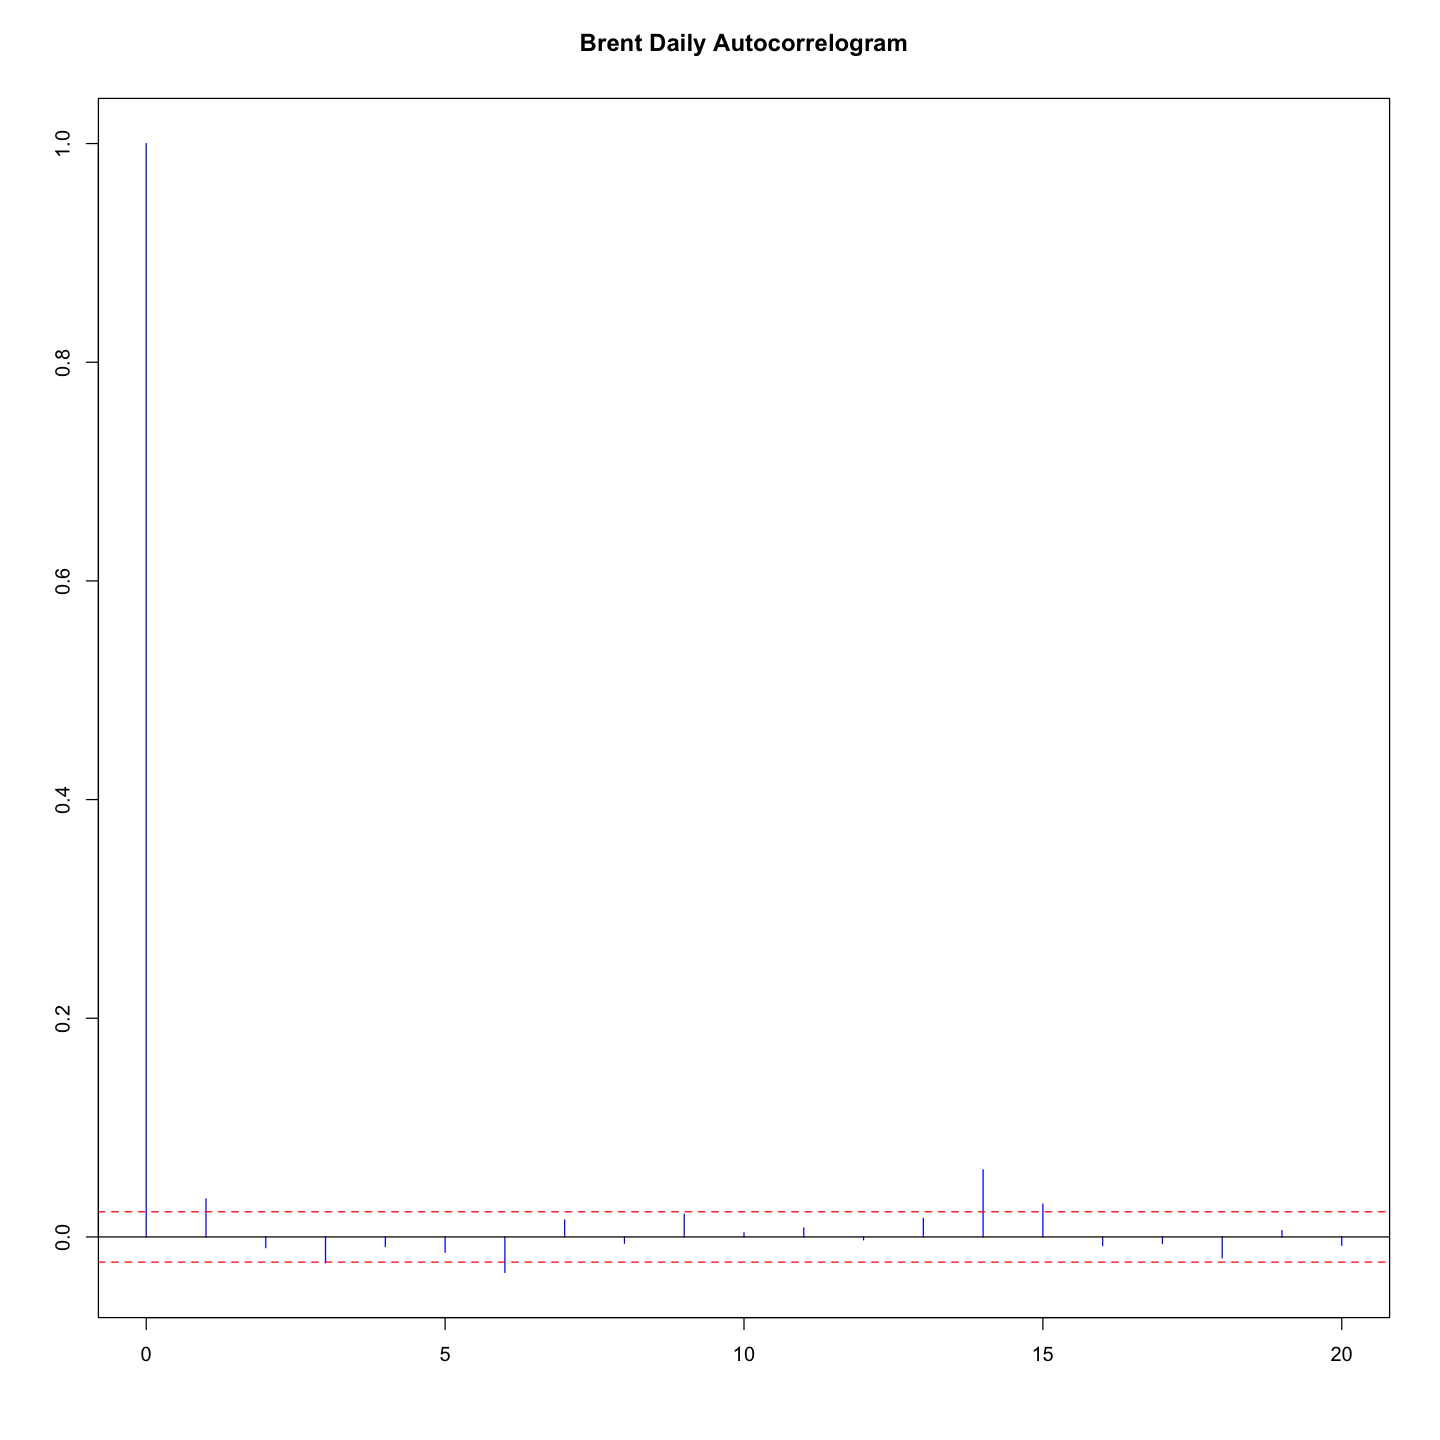

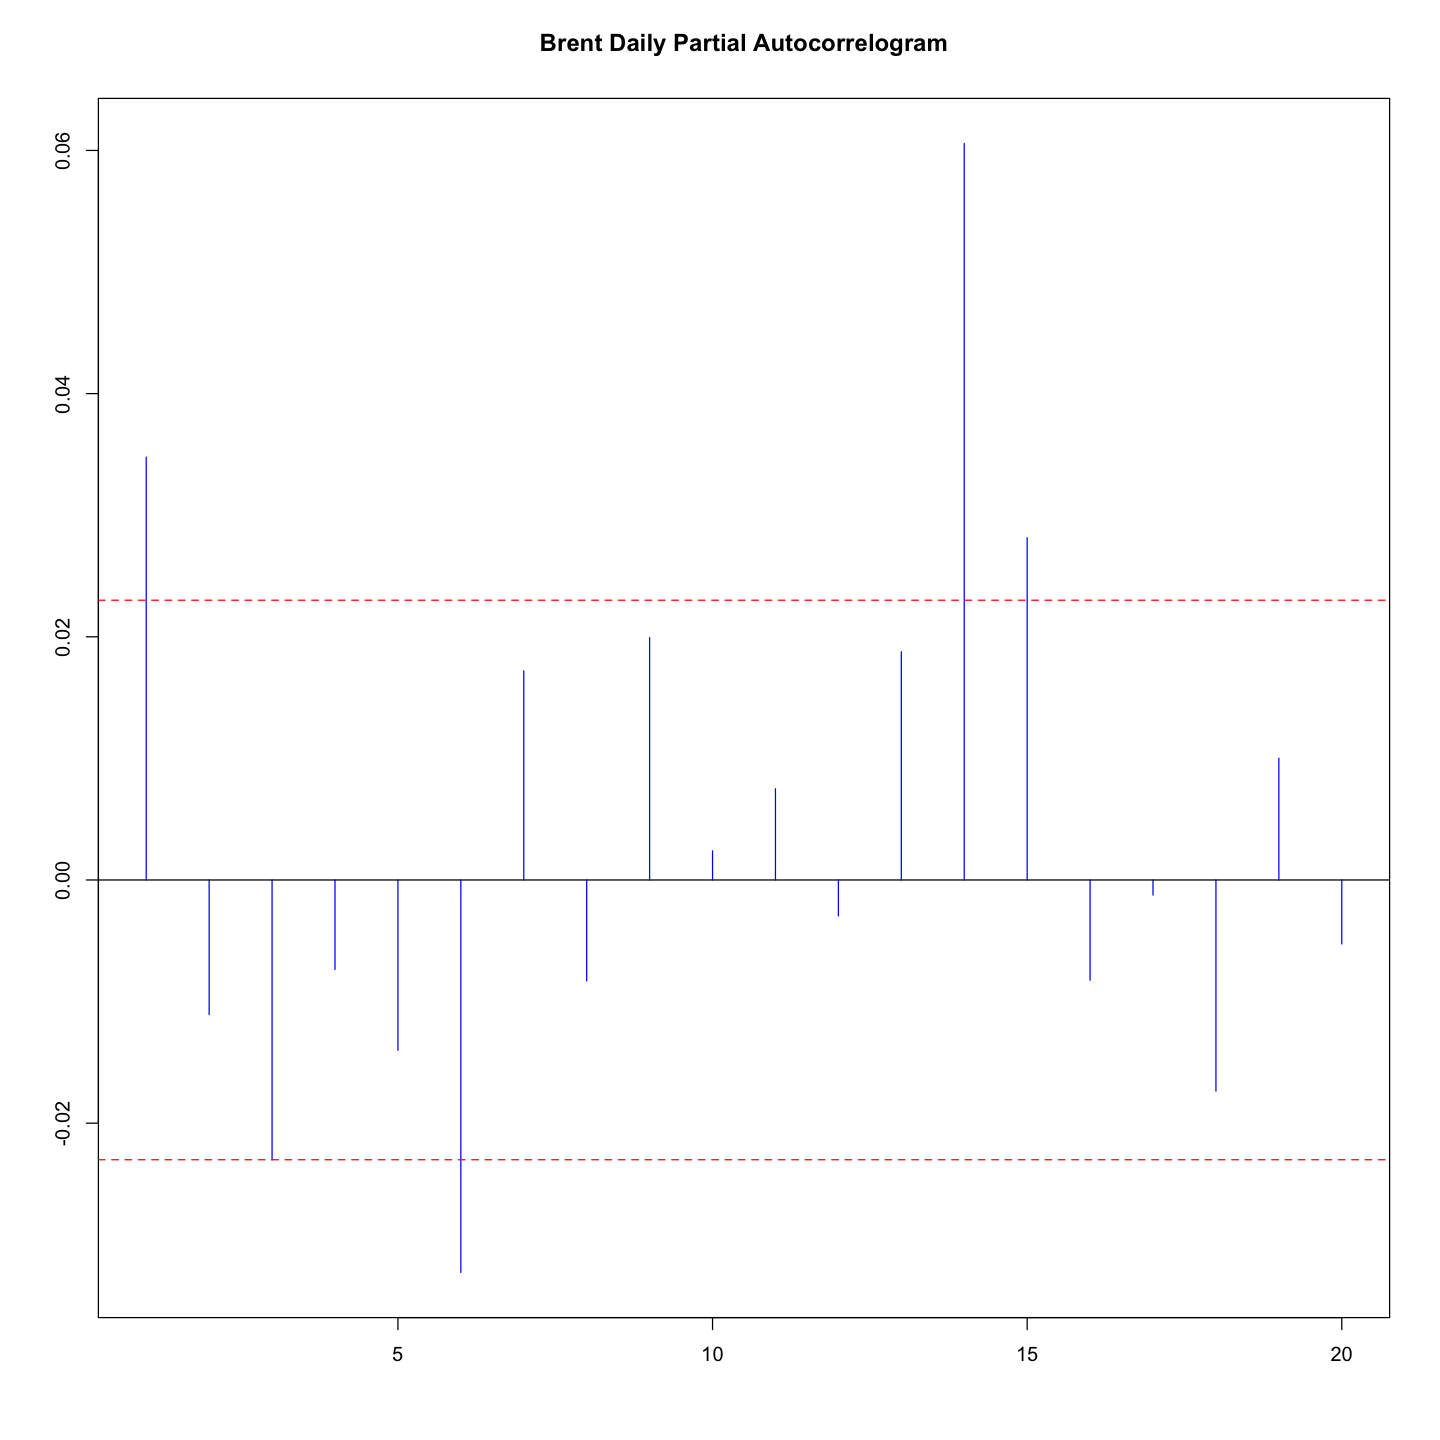

In [35]:
options(repr.plot.width=12, repr.plot.height=12) 
acf(coredata(Brent.return), main = "Brent Daily Autocorrelogram",
lag.max = 20, ylab = "", xlab = "",
col = "blue", ci.col = "red")
pacf(coredata(Brent.return), main = "Brent Daily Partial Autocorrelogram",
lag.max = 20, ylab = "", xlab = "",
col = "blue", ci.col = "red")

### On average there are 5 days in the trading week and 20 in the trading month.

### Some thoughts:
There seems to be positive weekly and negative monthly cycles.

On a weekly basis negative rates (5 trading days ago) are followed by negative
rates (today) and vice-versa with positive rates.

On a monthly basis negative rates (20 days ago) are followed by positive rates
(today).

**There is memory in the markets: positive correlation at least weekly up to a
month ago reinforces the strong and frequently occurring negative rates
(negative skew and leptokurtotic, a.k.a. heavy tails).**

Run the PACF for 60 days to see a 40-day negative correlation as well.

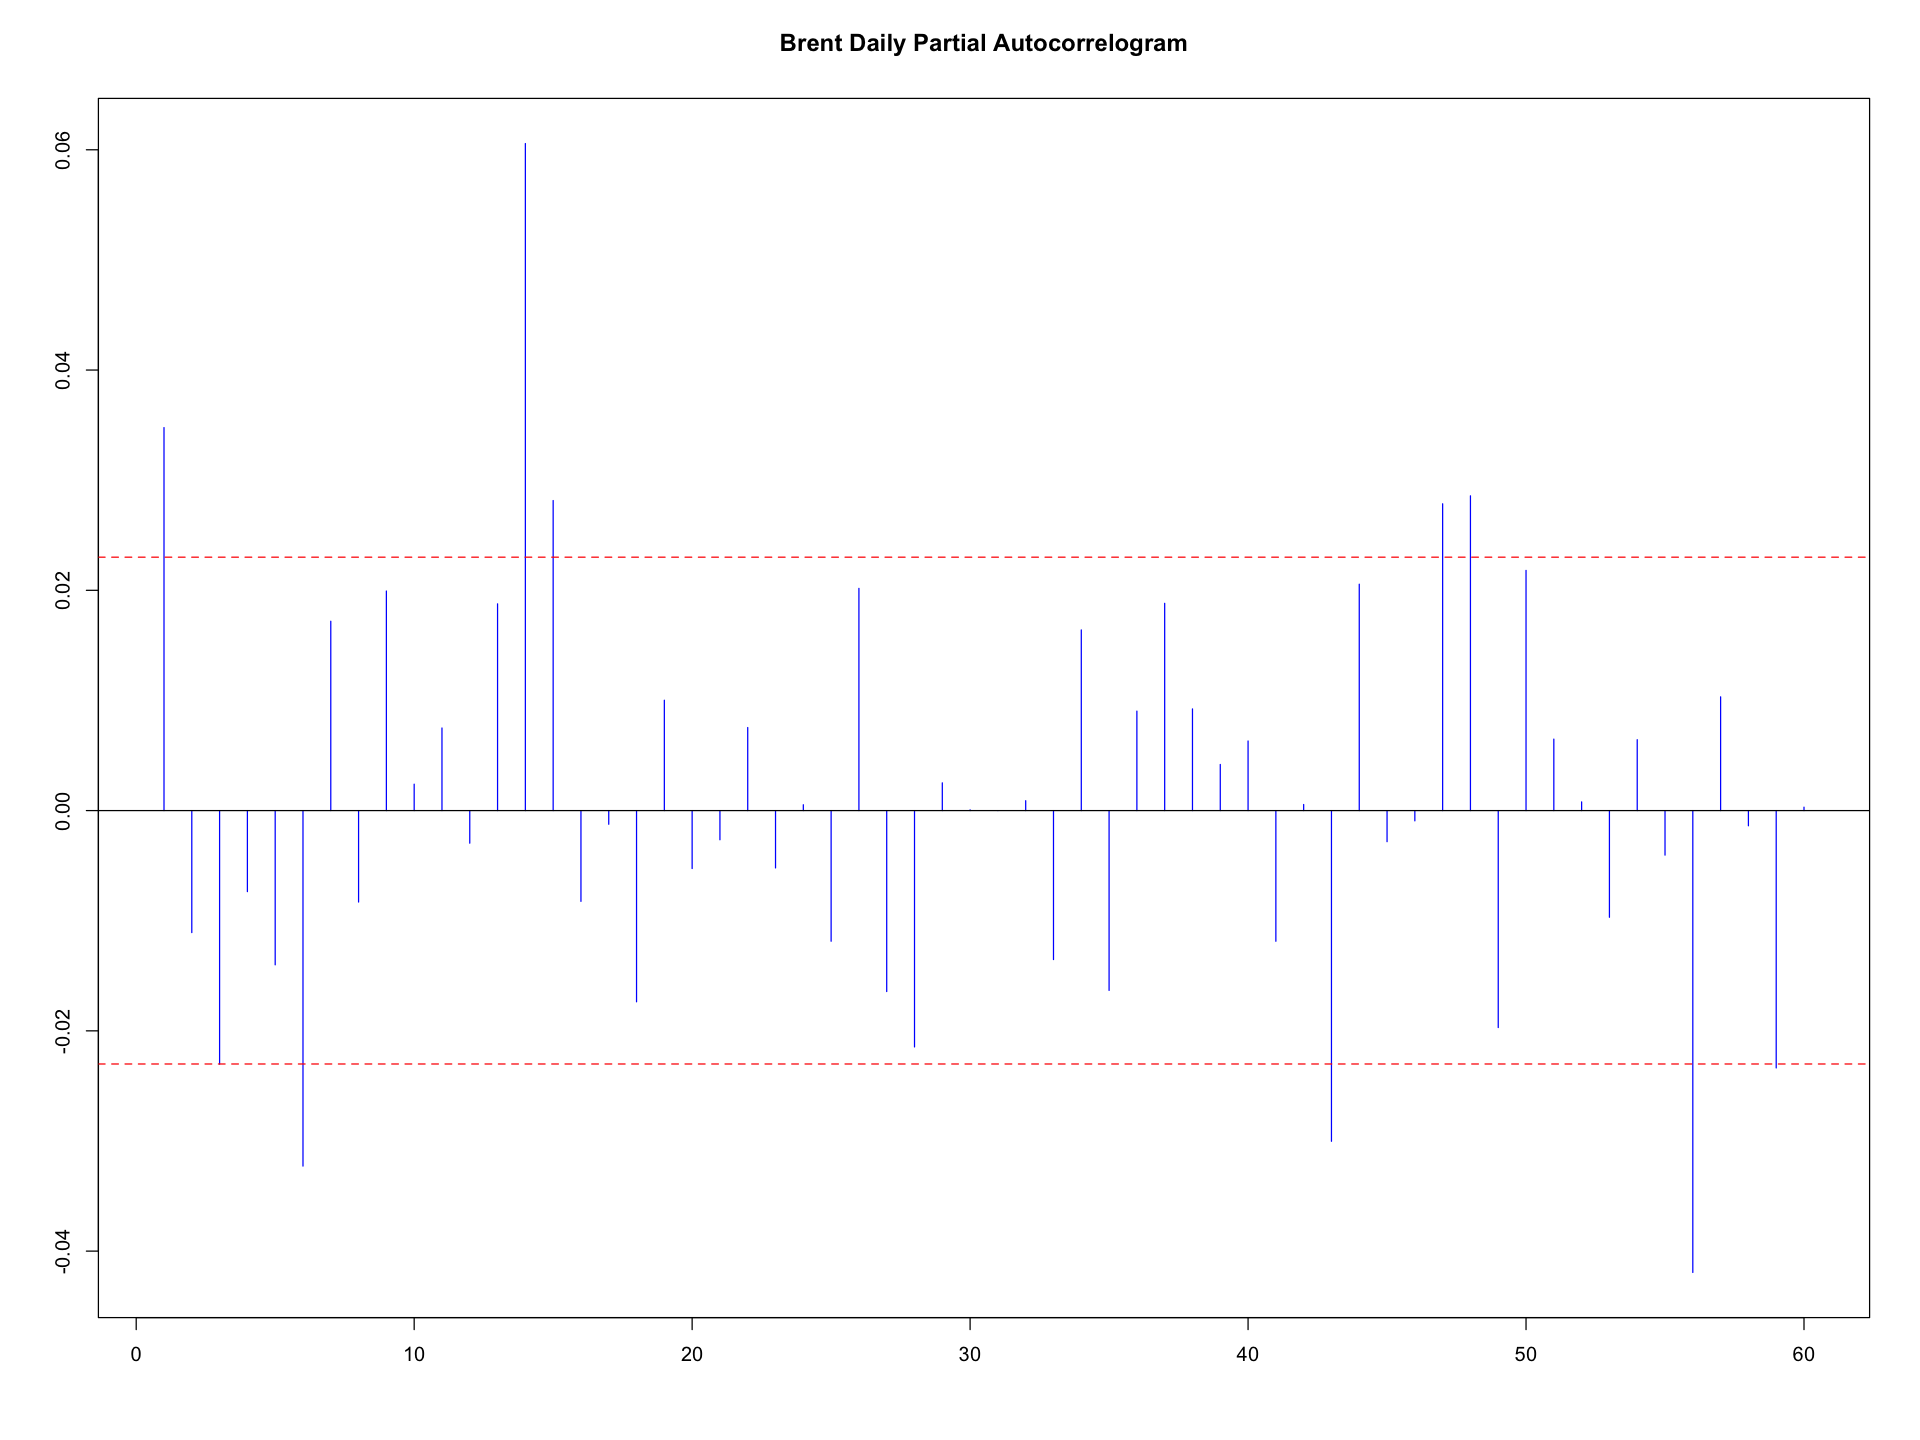

In [37]:
options(repr.plot.width=16, repr.plot.height=12) 
pacf(coredata(Brent.return), main = "Brent Daily Partial Autocorrelogram",
lag.max = 60, ylab = "", xlab = "",
col = "blue", ci.col = "red")

### Now for somthing really interesting. . . again
Let’s look just at the size of the Brent returns. 

The absolute value of the returns(think of oil and countries entering and leaving the EU!) can signal contagion, herd mentality, and simply very large margin calls (and the collateral to back it all up!).


In [38]:
Brent.return.abs <- abs(Brent.return)
# Trading position size matters
Brent.return.tail <- tail(Brent.return.abs[order(Brent.return.abs)],
100)[1]

In [39]:
# Take just the first of the 100
# observations and pick the first
index <- which(Brent.return.abs > Brent.return.tail,
arr.ind = TRUE)

In [40]:
# Build an index of those sizes that
# exceed the heavy tail threshold
Brent.return.abs.tail <- timeSeries(rep(0,
length(Brent.return)), charvec = time(Brent.return))

In [41]:
# just a lot of zeros we will fill up
# next
Brent.return.abs.tail[index, 1] <- Brent.return.abs[index]
# A Phew! is in order


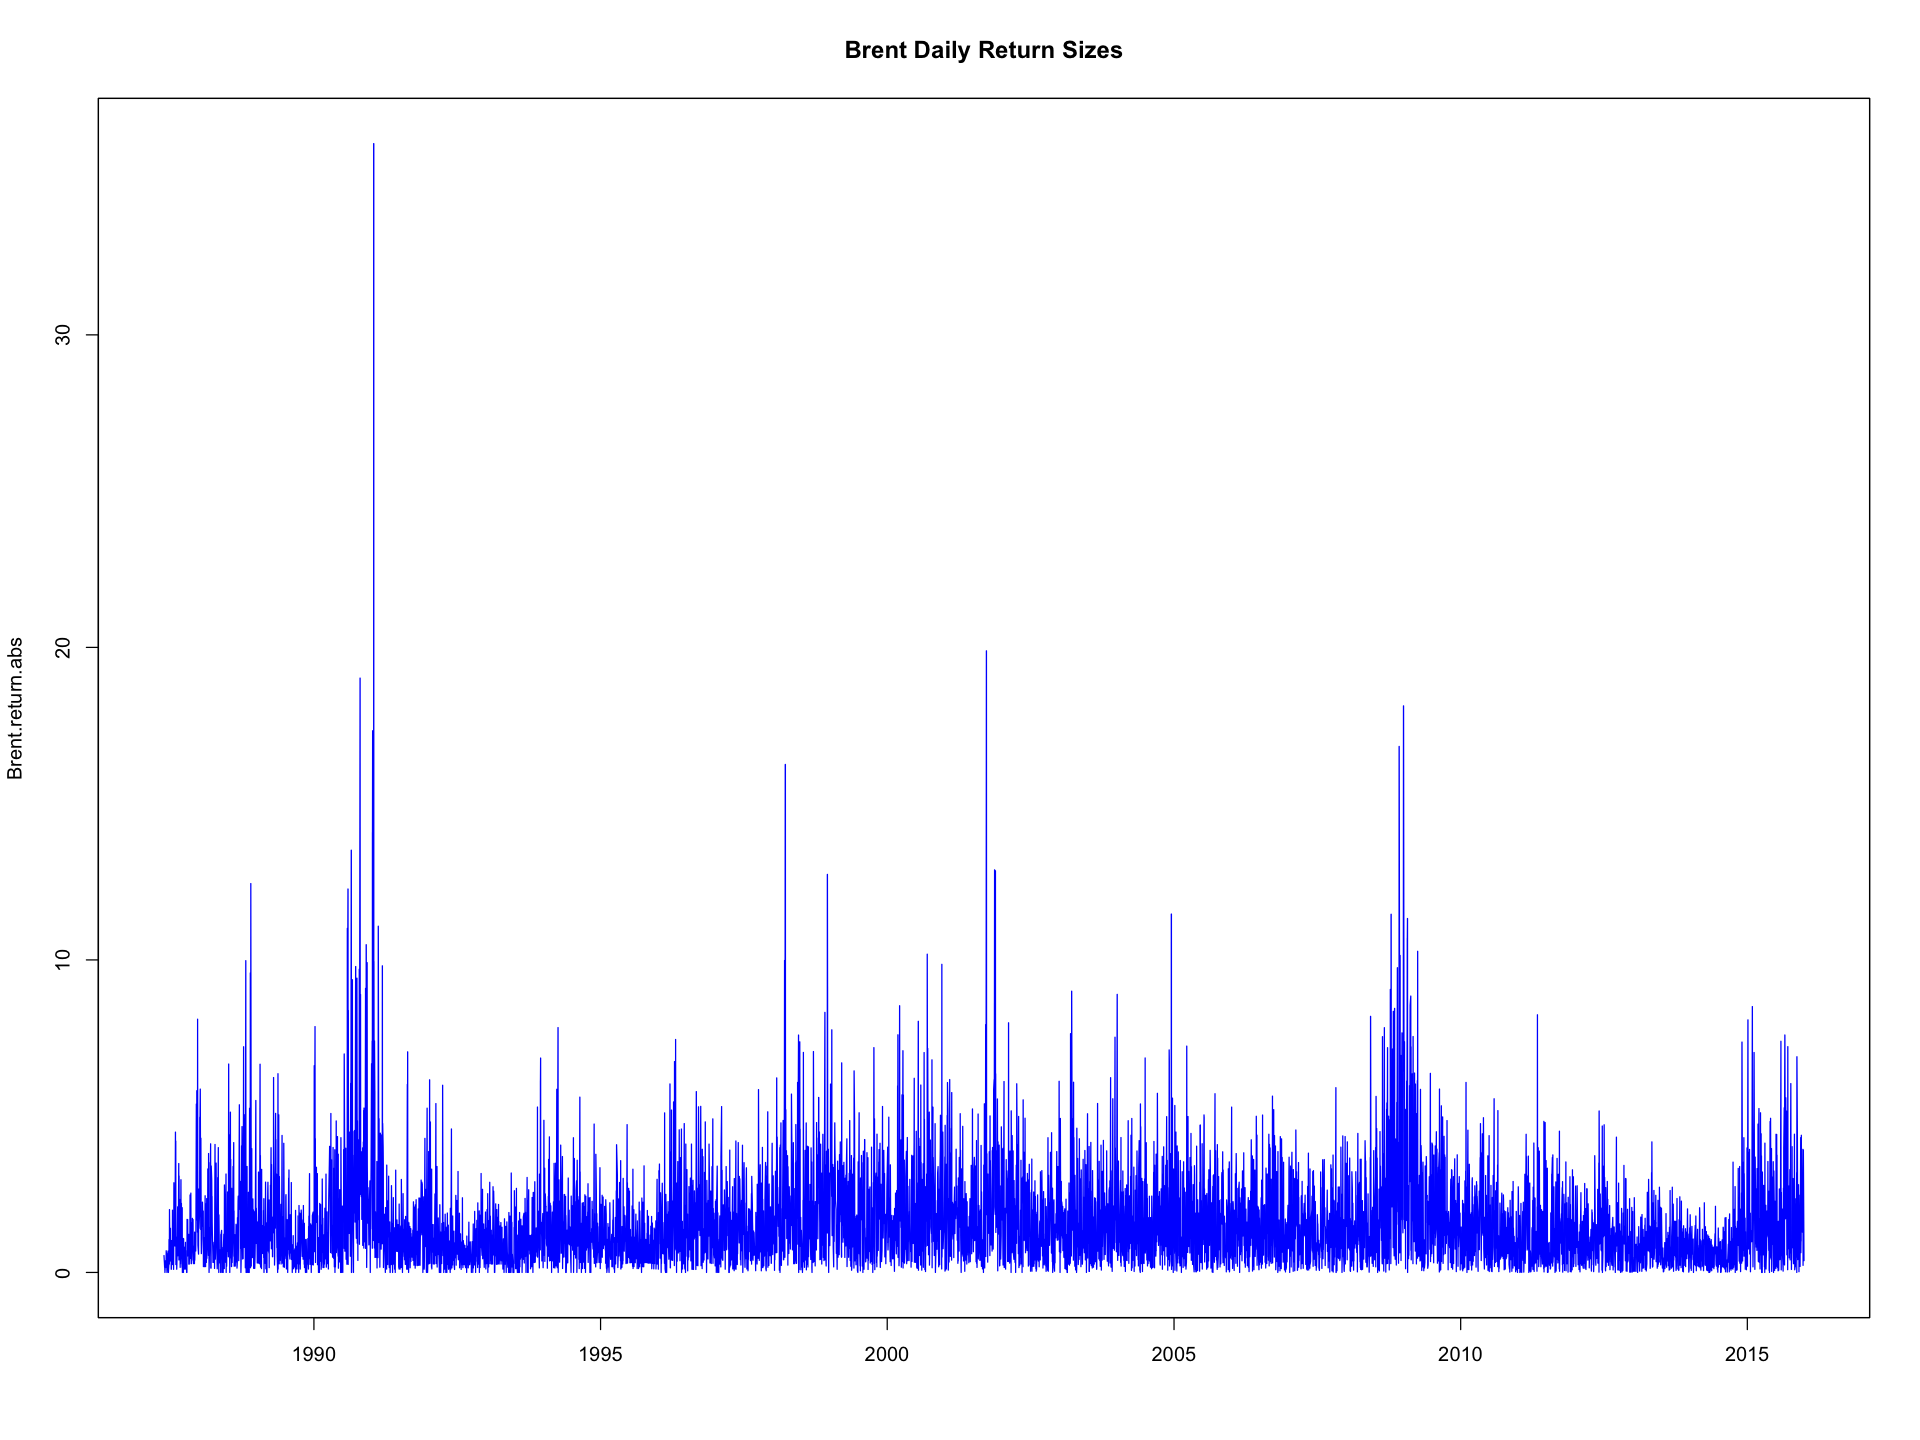

In [42]:
plot(Brent.return.abs, xlab = "", main = "Brent Daily Return Sizes",
col = "blue")

### Lots of return volatility – just in pure size
Same event

Correlated with financial innovations from the ’80s and ’90s

Gulf 1, Gulf 2, Great Recession, and its 9/11 antecedents

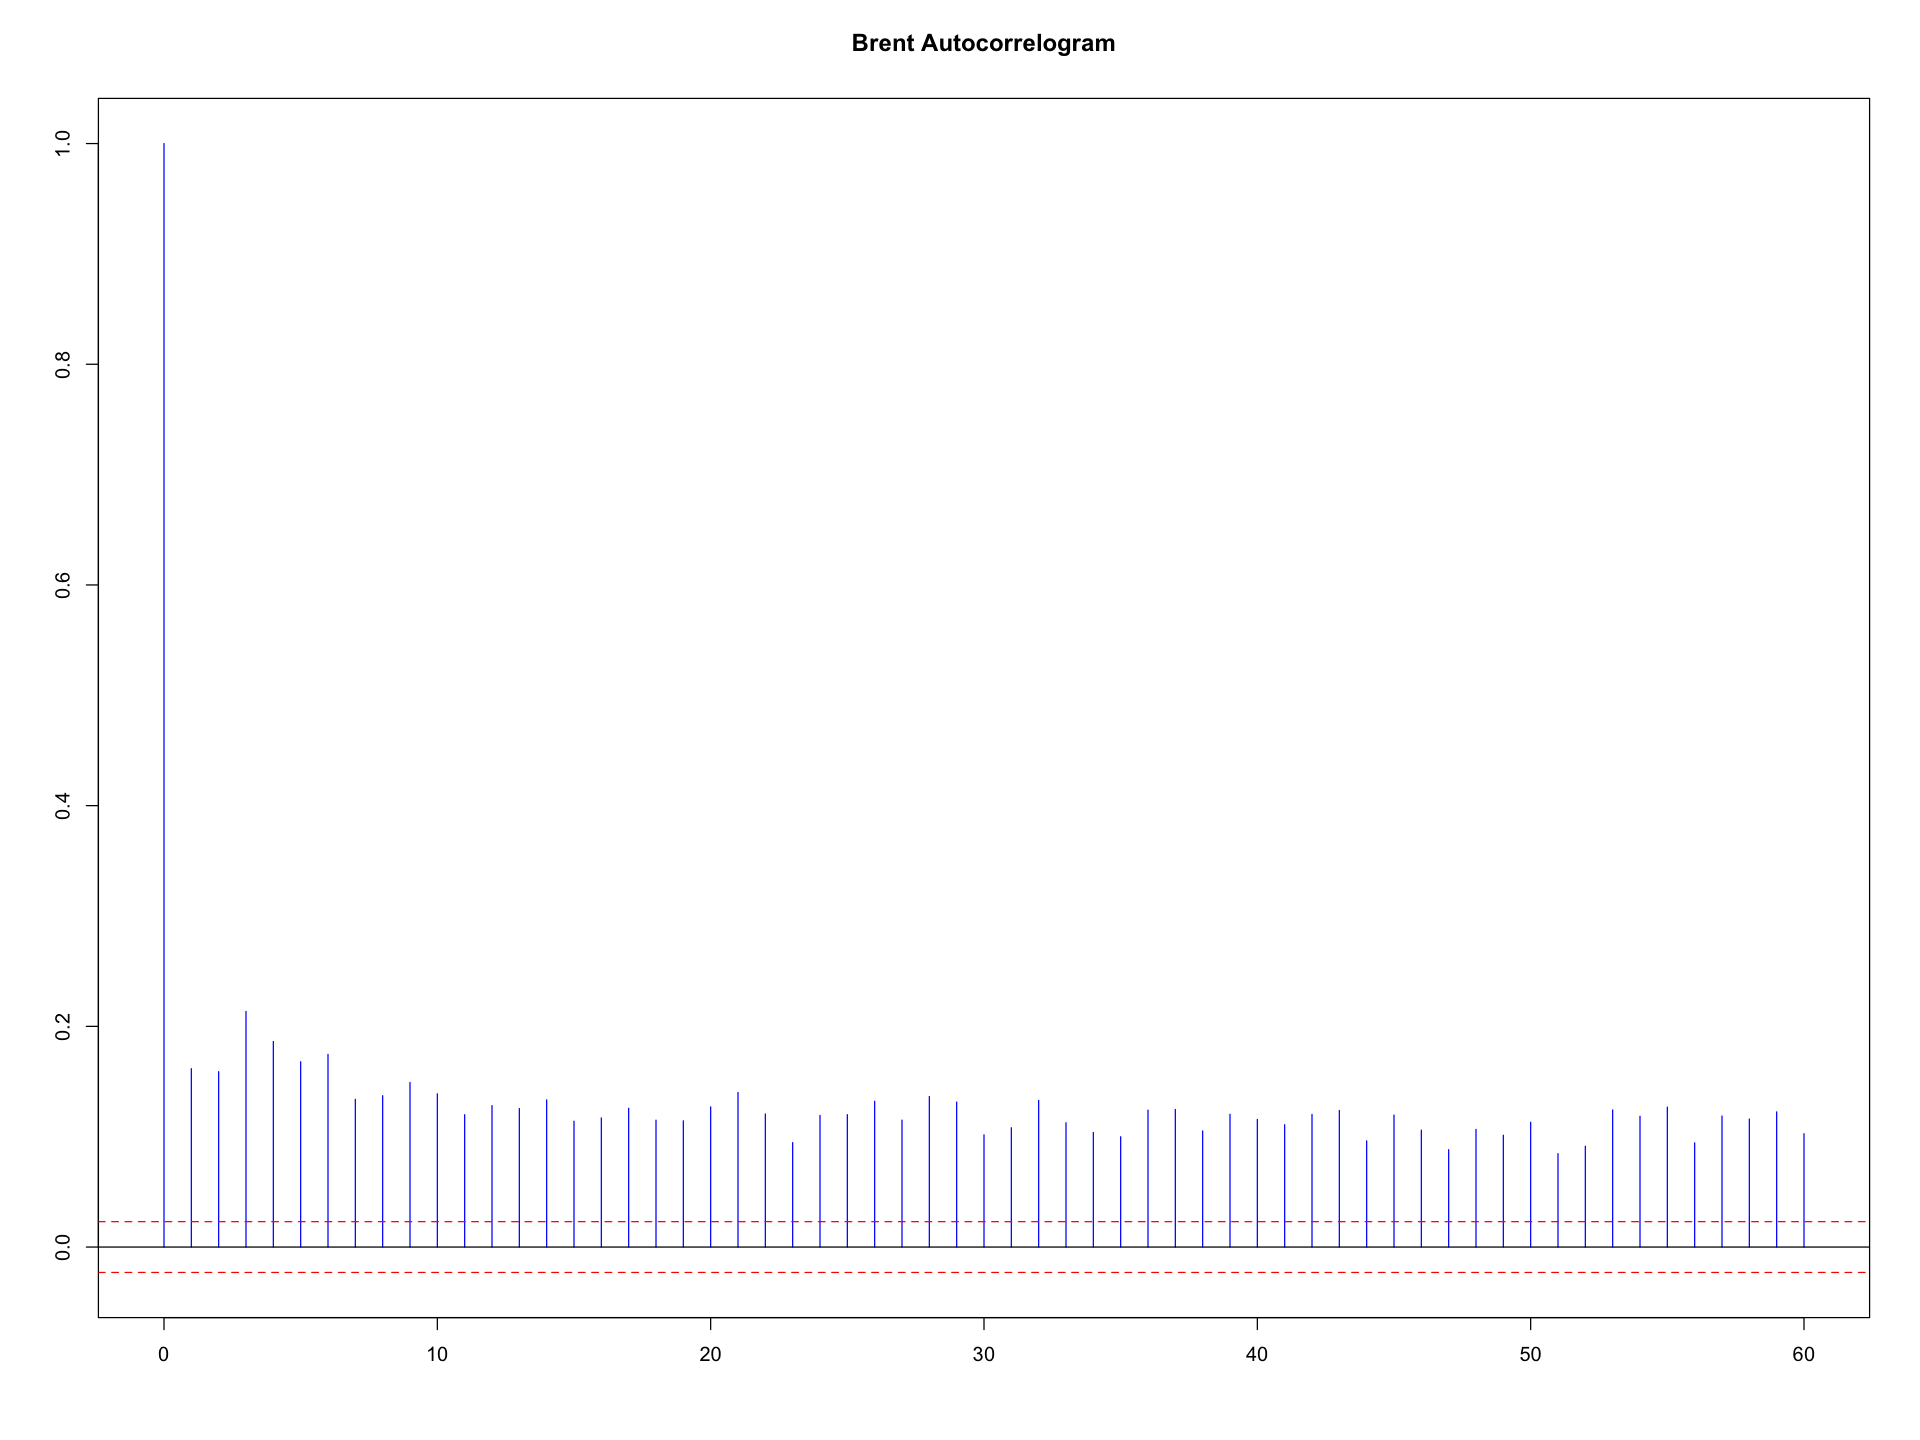

In [43]:
acf(coredata(Brent.return.abs), main = "Brent Autocorrelogram",
lag.max = 60, ylab = "", xlab = "",
col = "blue", ci.col = "red")

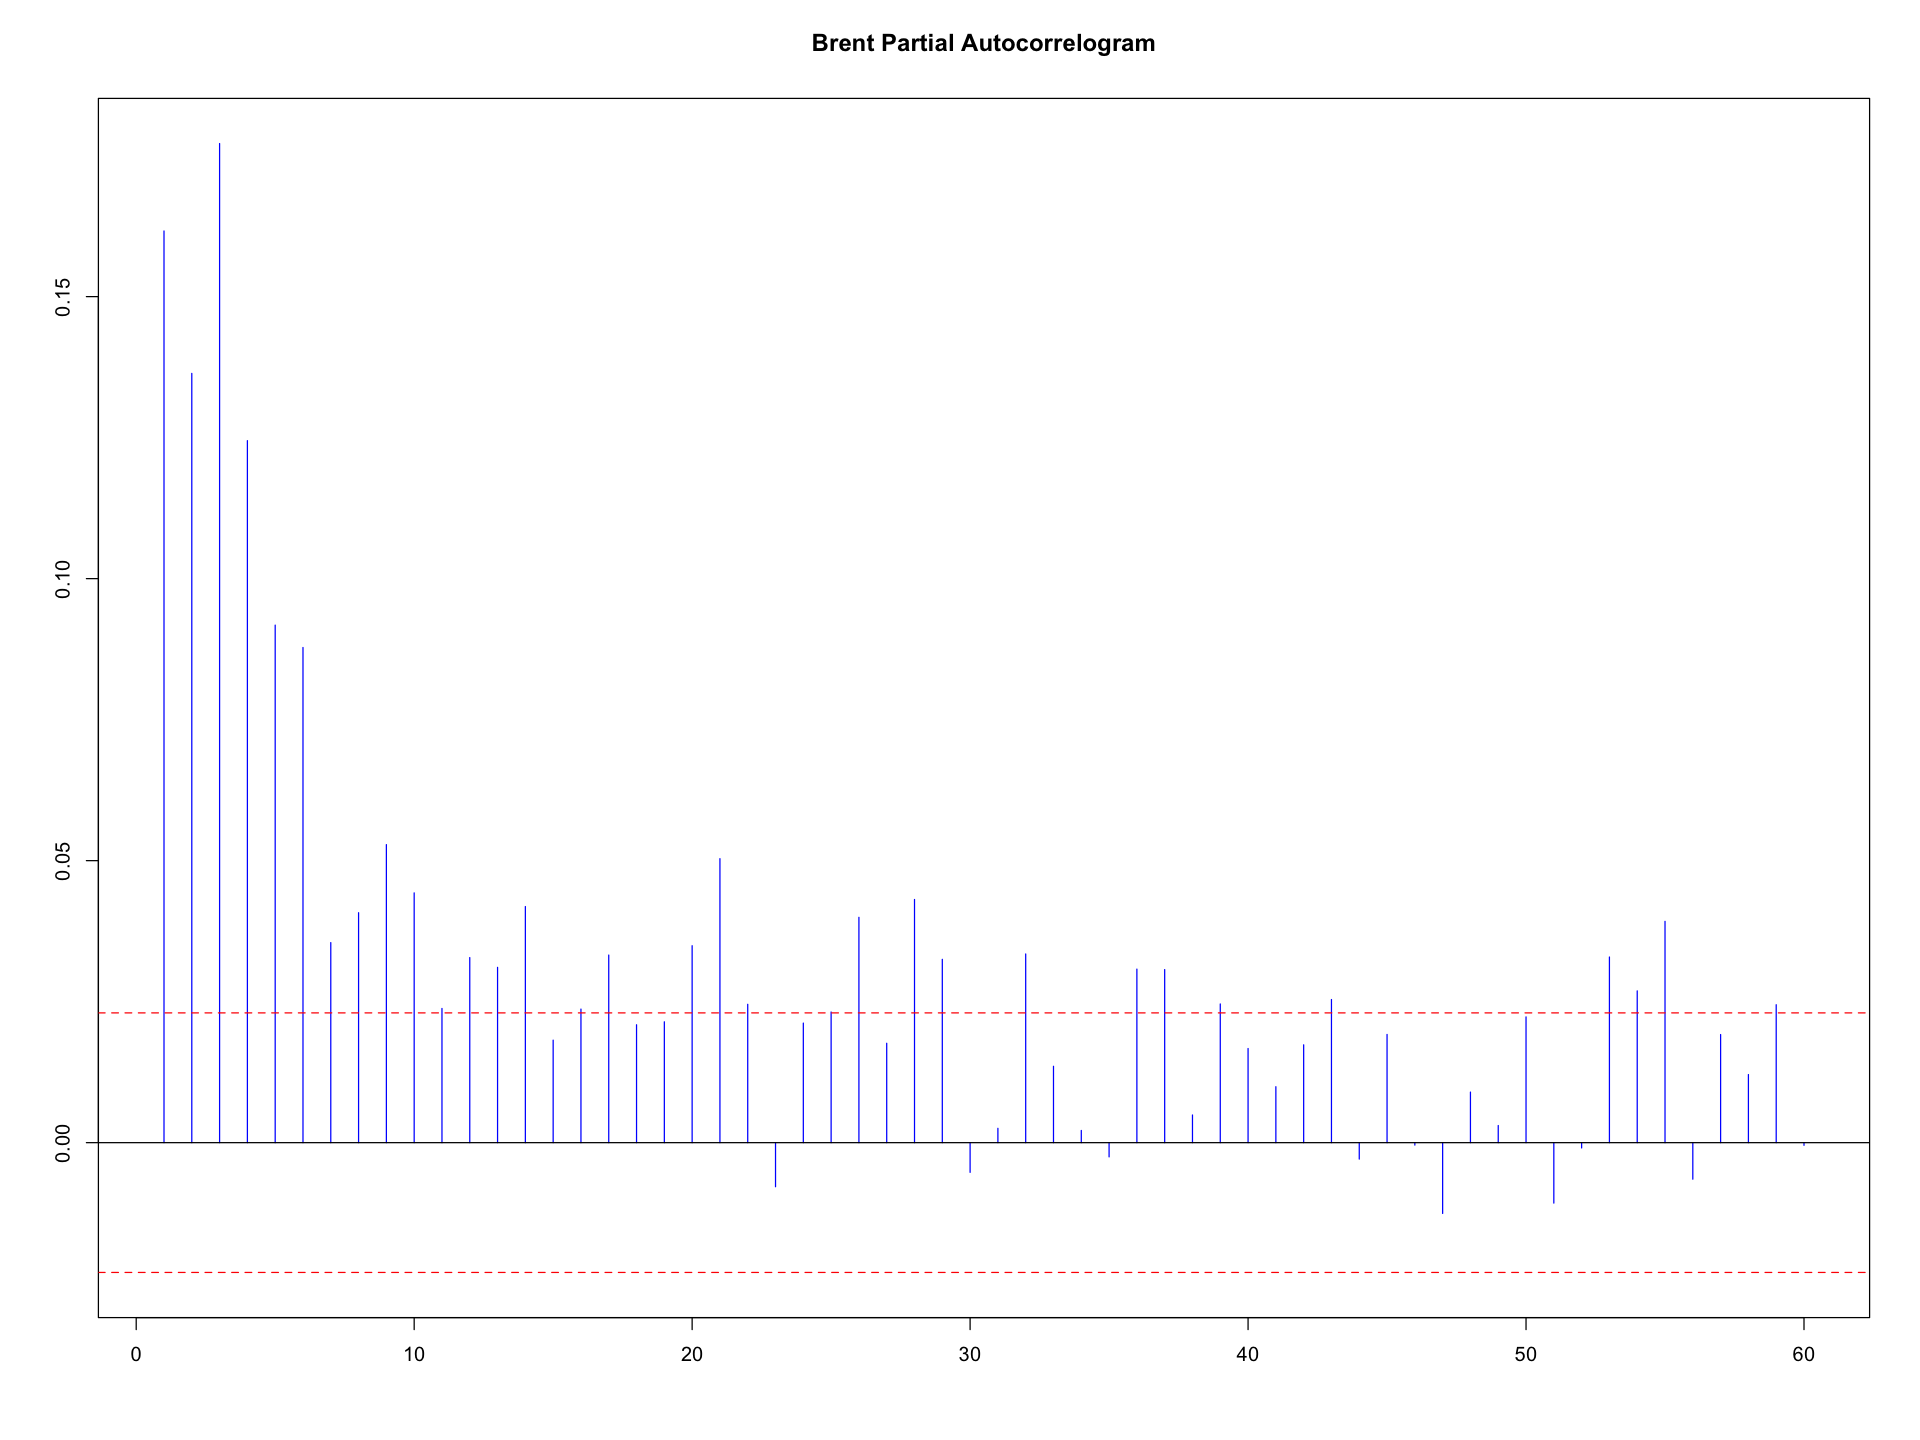

In [44]:
pacf(coredata(Brent.return.abs), main = "Brent Partial Autocorrelogram",
lag.max = 60, ylab = "", xlab = "",
col = "blue", ci.col = "red")

## Volatility Clustering galore
Getting strong persistent lags of absolute movements in returns

Dampening with after shocks past trading 10 days 10 ago: monthly volatility
affects today’s performance

### 3.4 Exercise: Getting Caught in the Crosscurrent

### Now our job is to ask the really important questions:
Suppose I am banking my investment in certain sectors of an economy, with its
GDP, financial capability, employment, exports and imports, etc.,

### then . . .

How will I decide to contract for goods and services, segment vendors,
segment customers, based on these interactions?

How do I construct my portfolio of business opportunities?

How do I identify insurgent and relational risks and build a playbook to
manage these?

How will changes in one sector’s factors (say, finance, political will) affect
factors in another?


We will now stretch out a bit and look at cross-correlations to help us get
the ground truth around these relationships,

. . . and begin to answer some of these business questions in a more specific
context.


Let’s load the zoo and qrmdata libraries first and look at the **EuroStoxx50 data
set.**

Here we can imagine we are rebuilding our brand and footprint in the European
Union and United Kingdom.

Our customers might be the companies based in these countries as our
target market.

The data: 4 stock exchange indices across Europe (and the United Kingdom)

This will allow us to profile the forward capabilities of these companies across
their economies.



In [46]:
require(zoo)
require(qrmdata)
require(xts)

Loading required package: xts


Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last




In [47]:
data("EuStockMarkets")
EuStockMarkets.price <- as.zoo(EuStockMarkets)
EuStockMarkets.return <- diff(log(EuStockMarkets.price))[-1] * 100

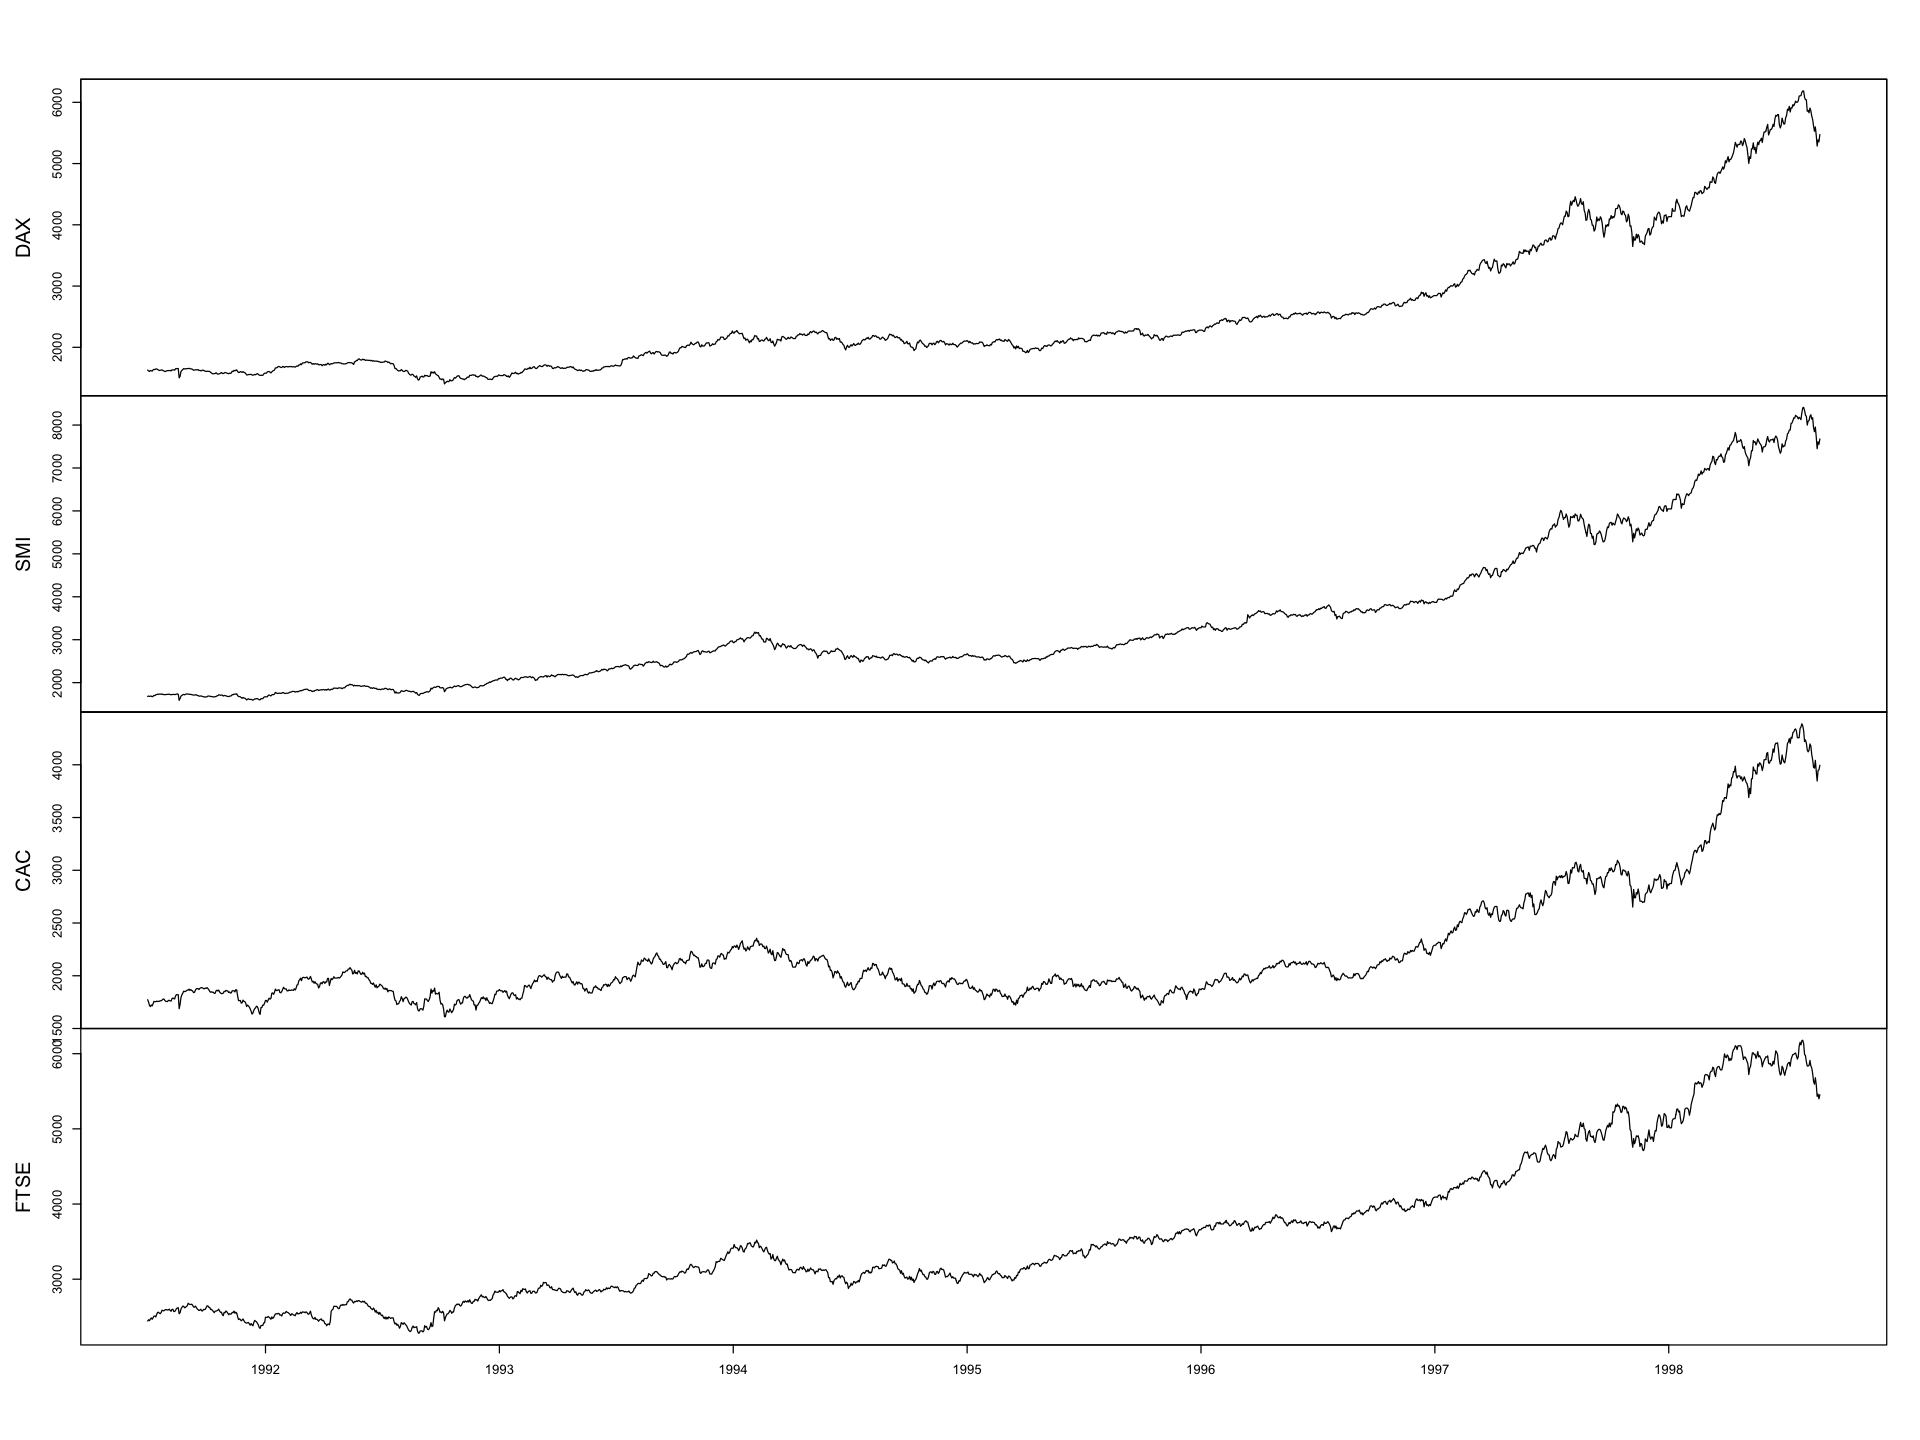

In [48]:
# Plot the levels and returns.
plot(EuStockMarkets.price, xlab = " ", main = " ")


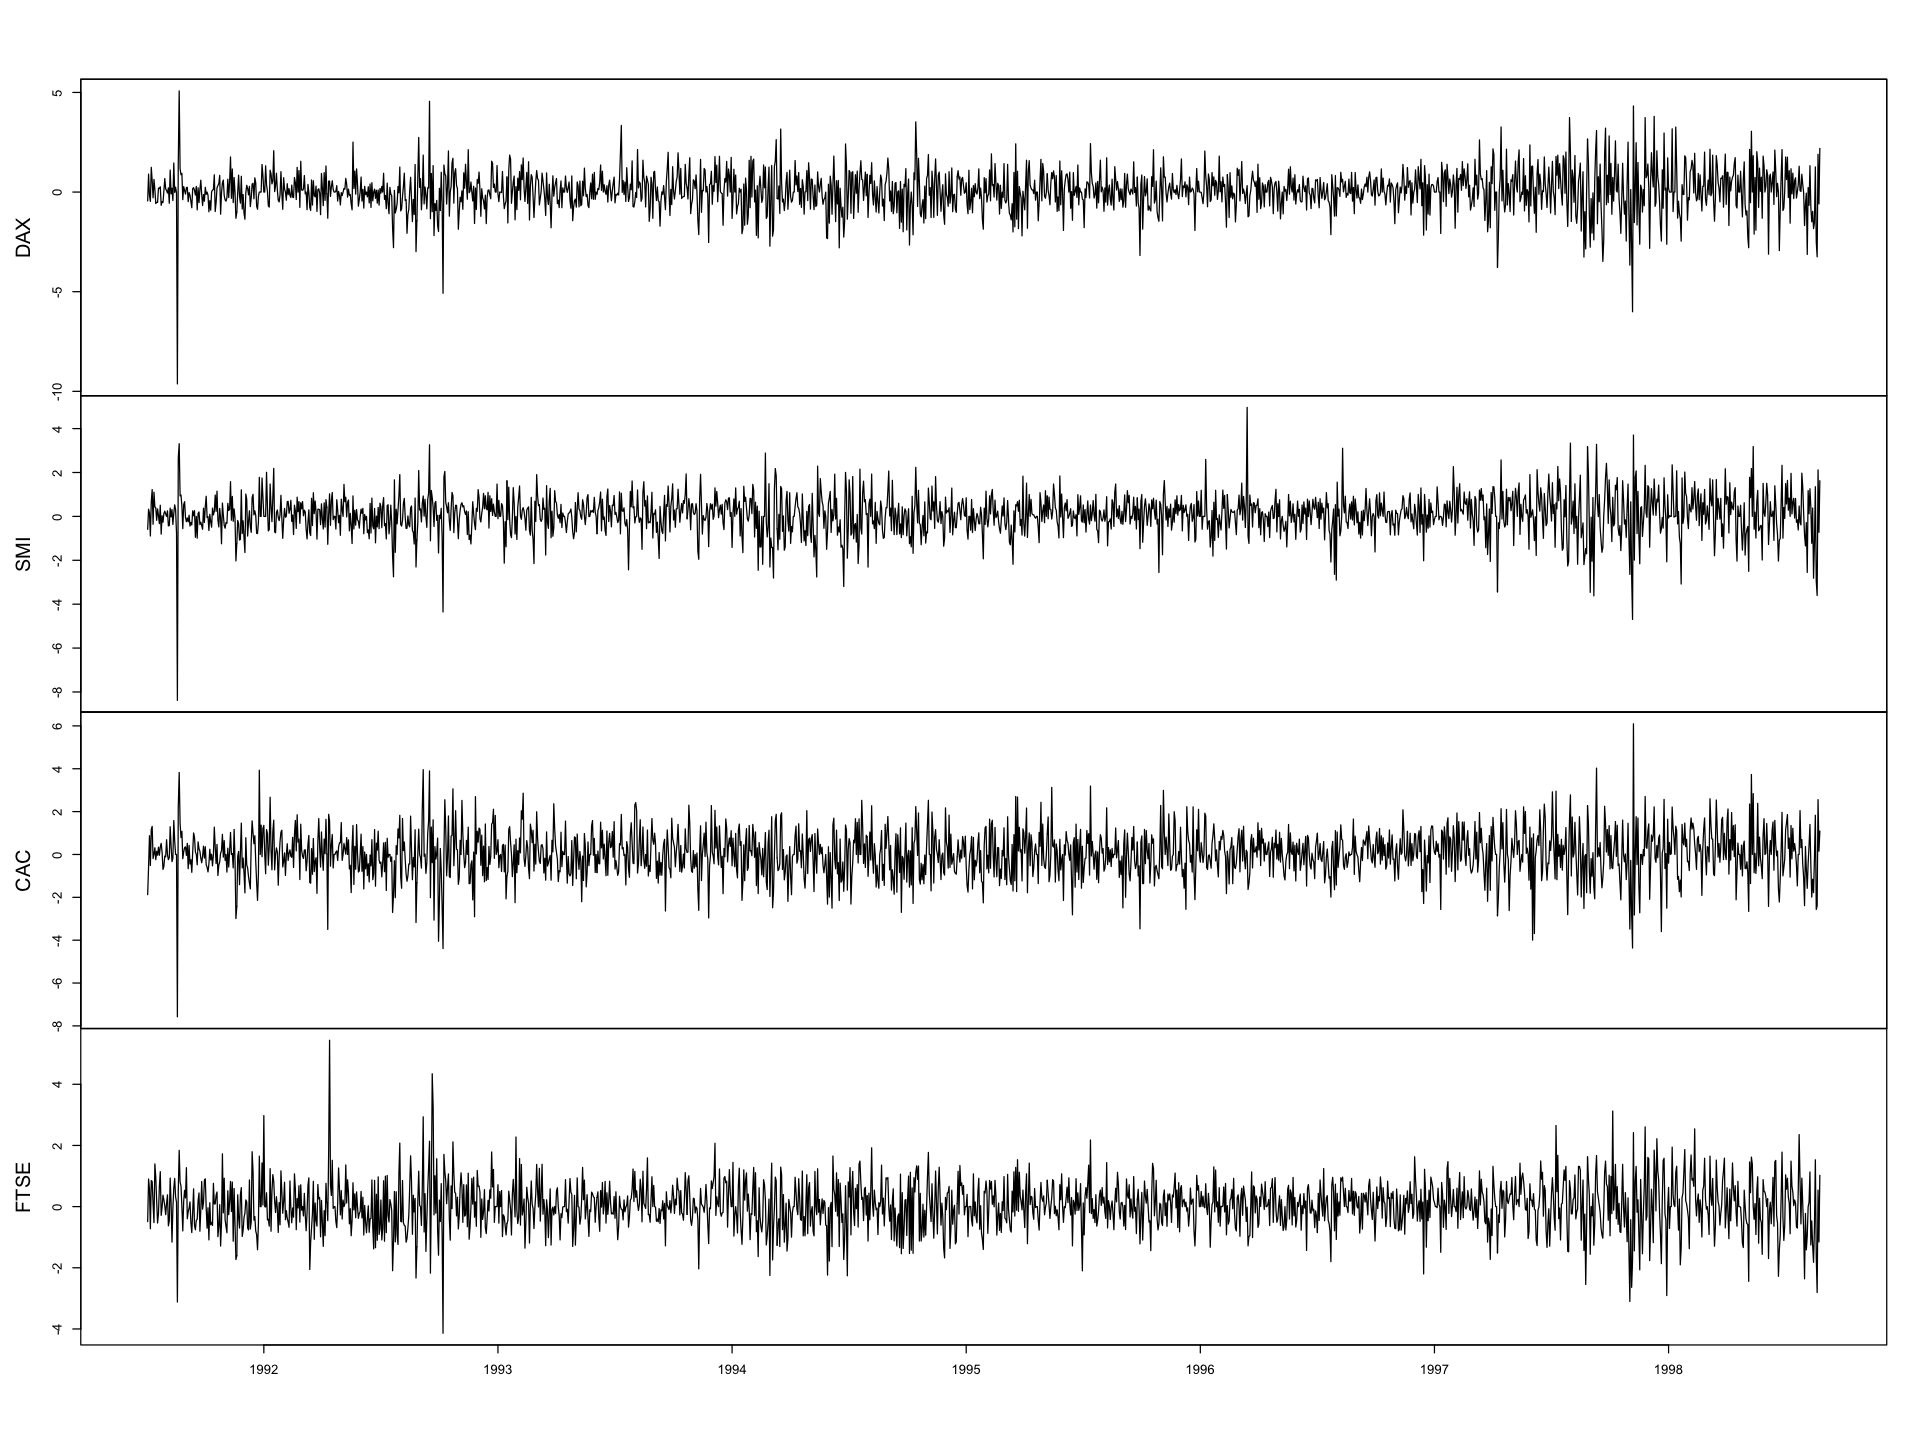

In [49]:
plot(EuStockMarkets.return, xlab = " ", main = " ")

### We see much the same thing as Brent oil with volatility clustering and heavily weighted tails.

Let’s look at **cross-correlations among one pair of these indices** to see how they are
## related across time (lags) for returns and the absolute value of returns

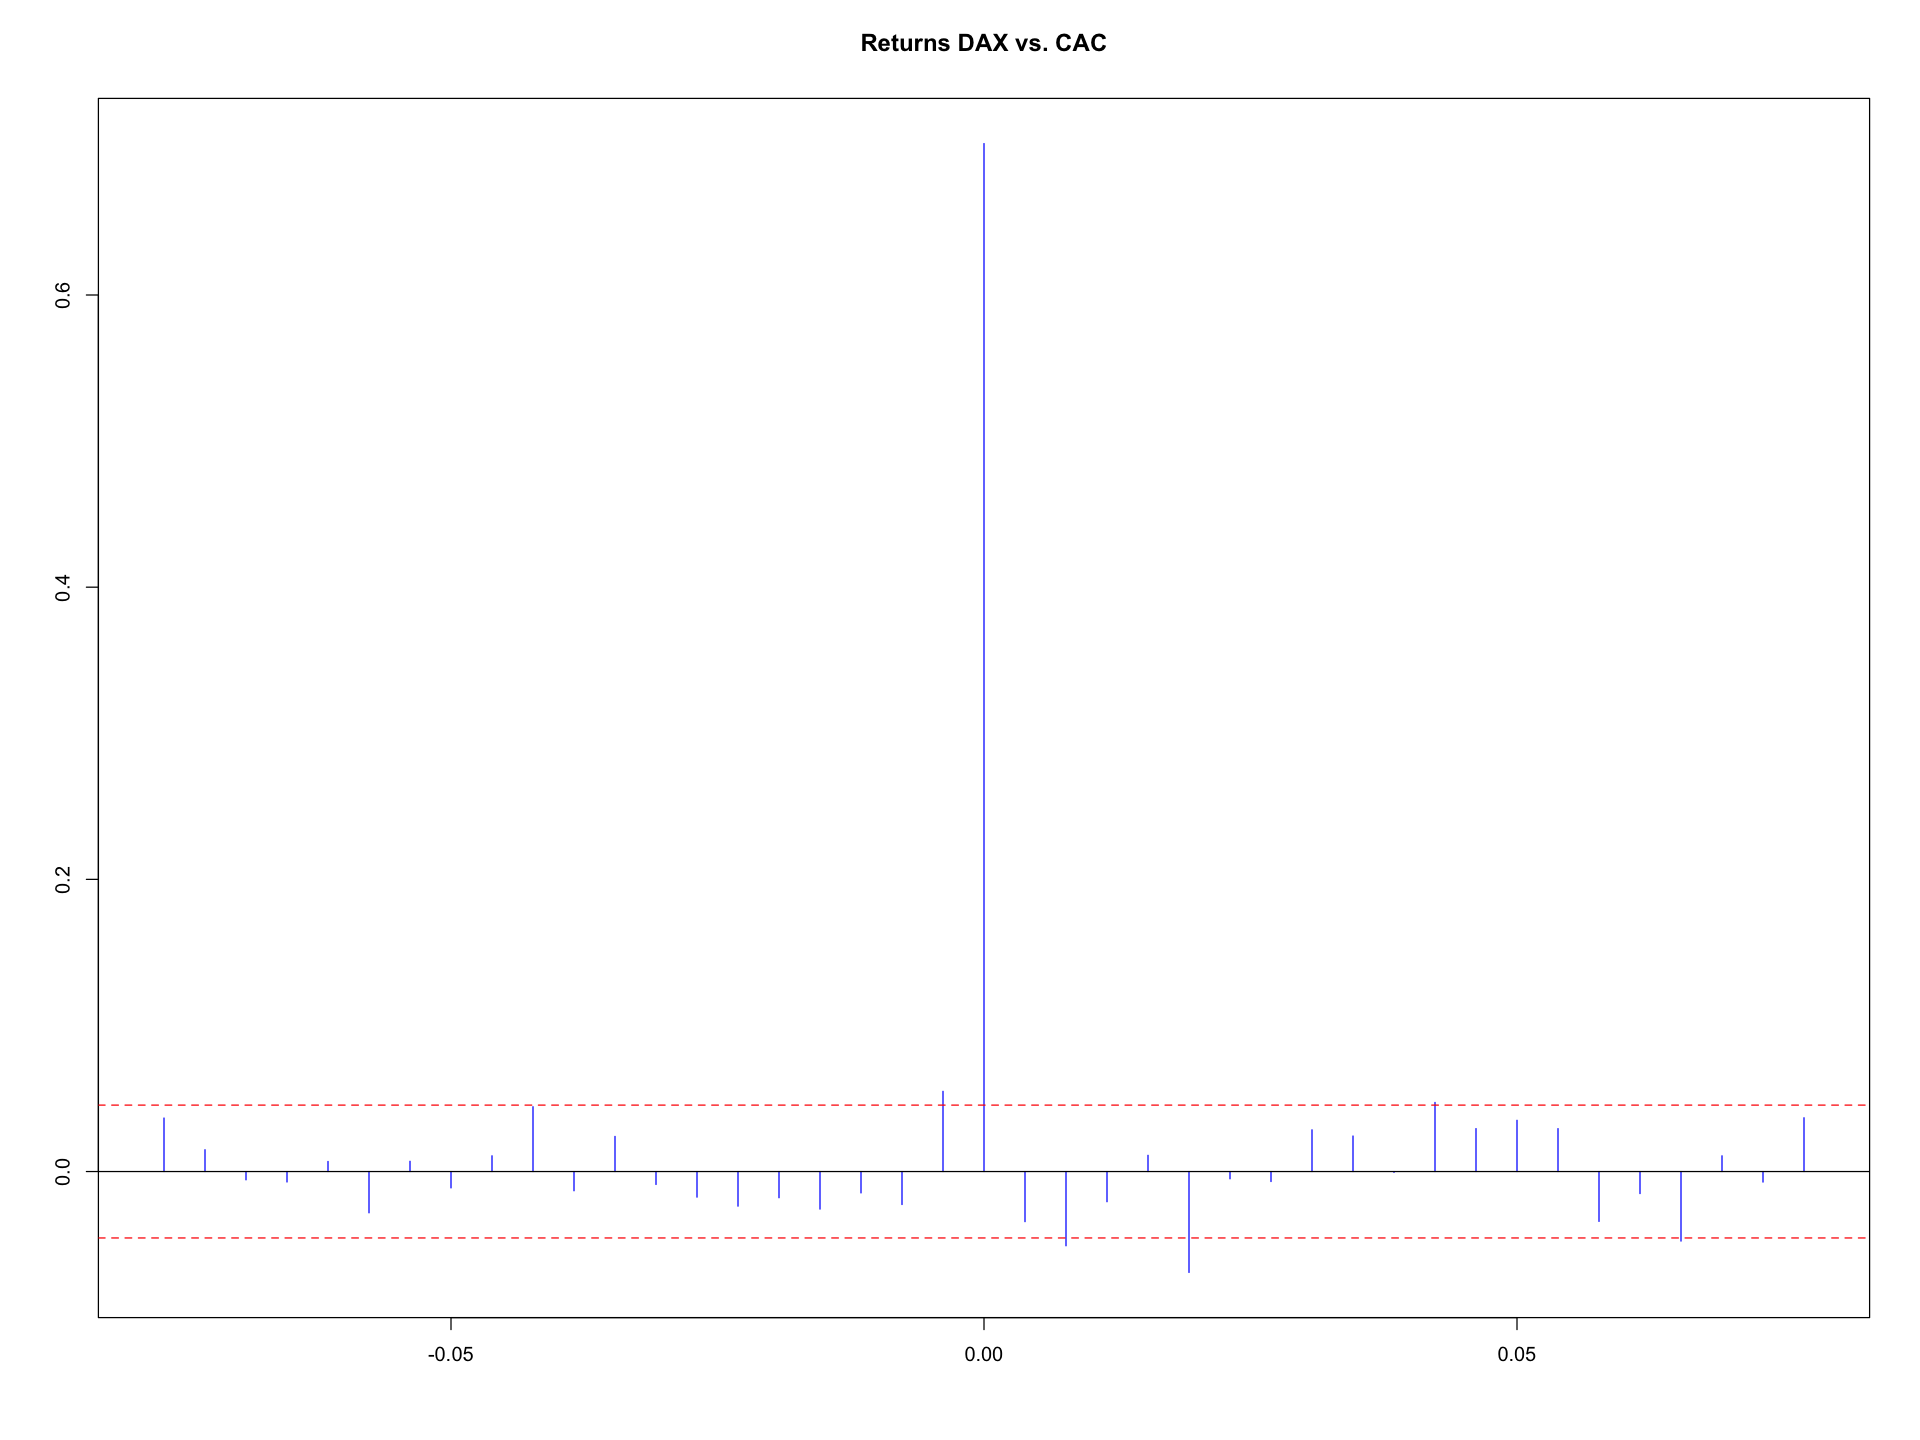

In [50]:
ccf(EuStockMarkets.return[, 1], EuStockMarkets.return[,2],
    main = "Returns DAX vs. CAC",
    lag.max = 20, ylab = "", xlab = "",
    col = "blue", ci.col = "red")

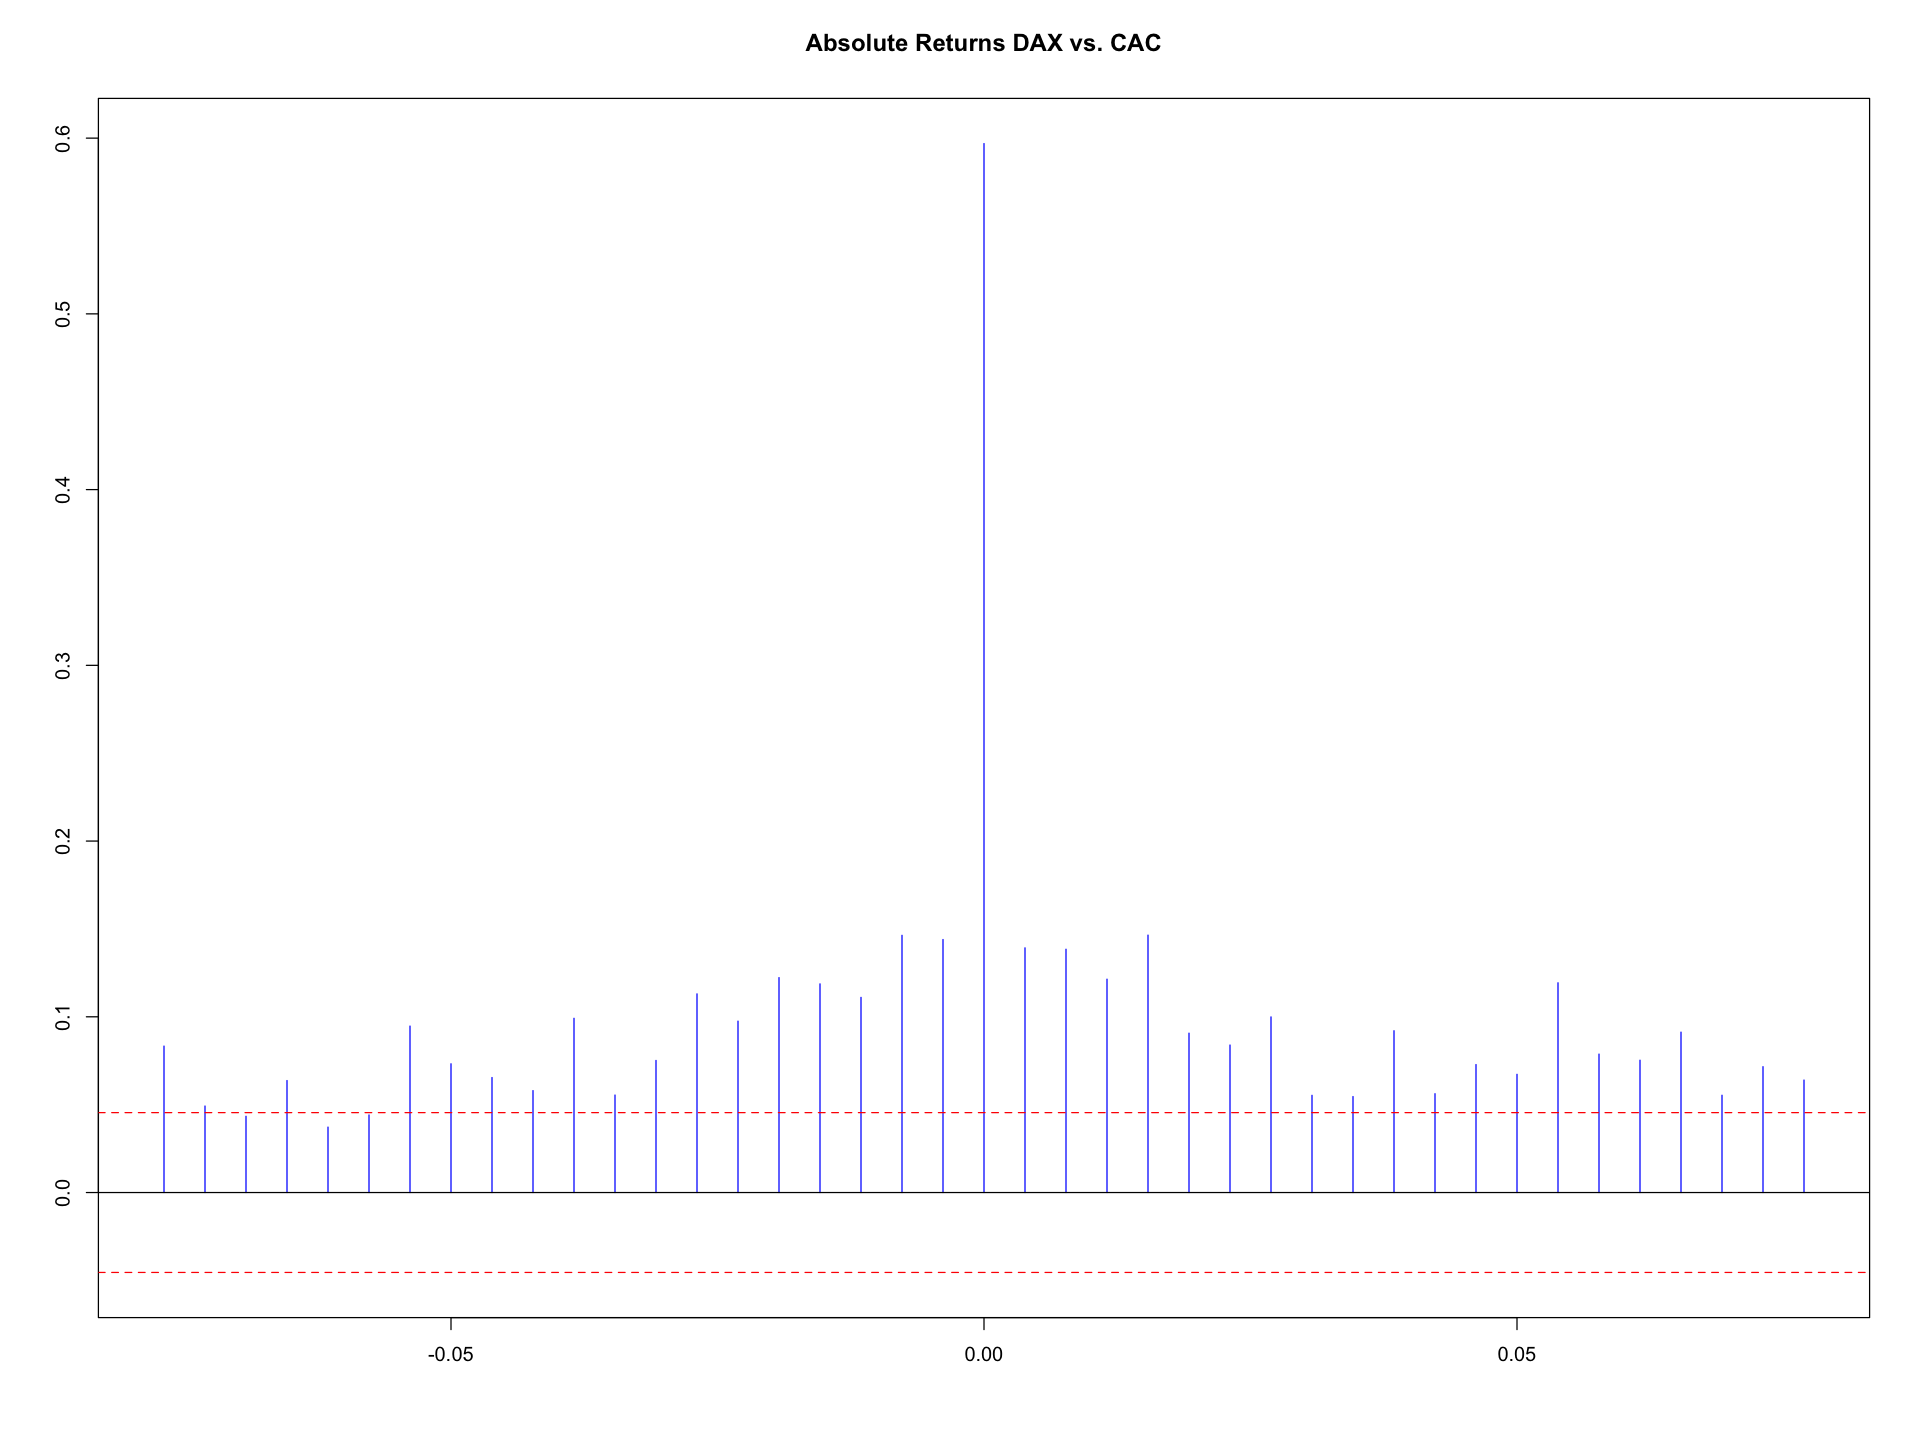

In [51]:
ccf(abs(EuStockMarkets.return[, 1]),
    abs(EuStockMarkets.return[, 2]),
    main = "Absolute Returns DAX vs. CAC",
    lag.max = 20, ylab = "", xlab = "",
    col = "blue", ci.col = "red")

### We see some small raw correlations across time with raw returns. 

More revealing,we see **volatility of correlation clustering using return sizes.**

One more experiment: **a rolling correlation using this function:**

In [52]:
corr.rolling <- function(x) {
    dim <- ncol(x)
    corr.r <- cor(x)[lower.tri(diag(dim),
                              diag = FALSE)]
    return(corr.r)
}

Embed our rolling correlation function, corr.rolling, into the function
rollapply (look this one up!). 

The question we need to answer is: 
**What is the history of correlations in the UK and EU stock markets?**

If this is a “history,” then we have to manage the risk that conducting business in one country will definitely affect business in another

**. . . and that bad things will be followed by more bad things more often than good things. . .**

In [53]:
corr.returns <- rollapply(EuStockMarkets.return, width = 250,
                          corr.rolling, align = "right", by.column = FALSE)

colnames(corr.returns) <- c("DAX & CAC", "DAX & SMI",
                            "DAX & FTSE", "CAC & SMI",
                            "CAC & FTSE", "SMI & FTSE")

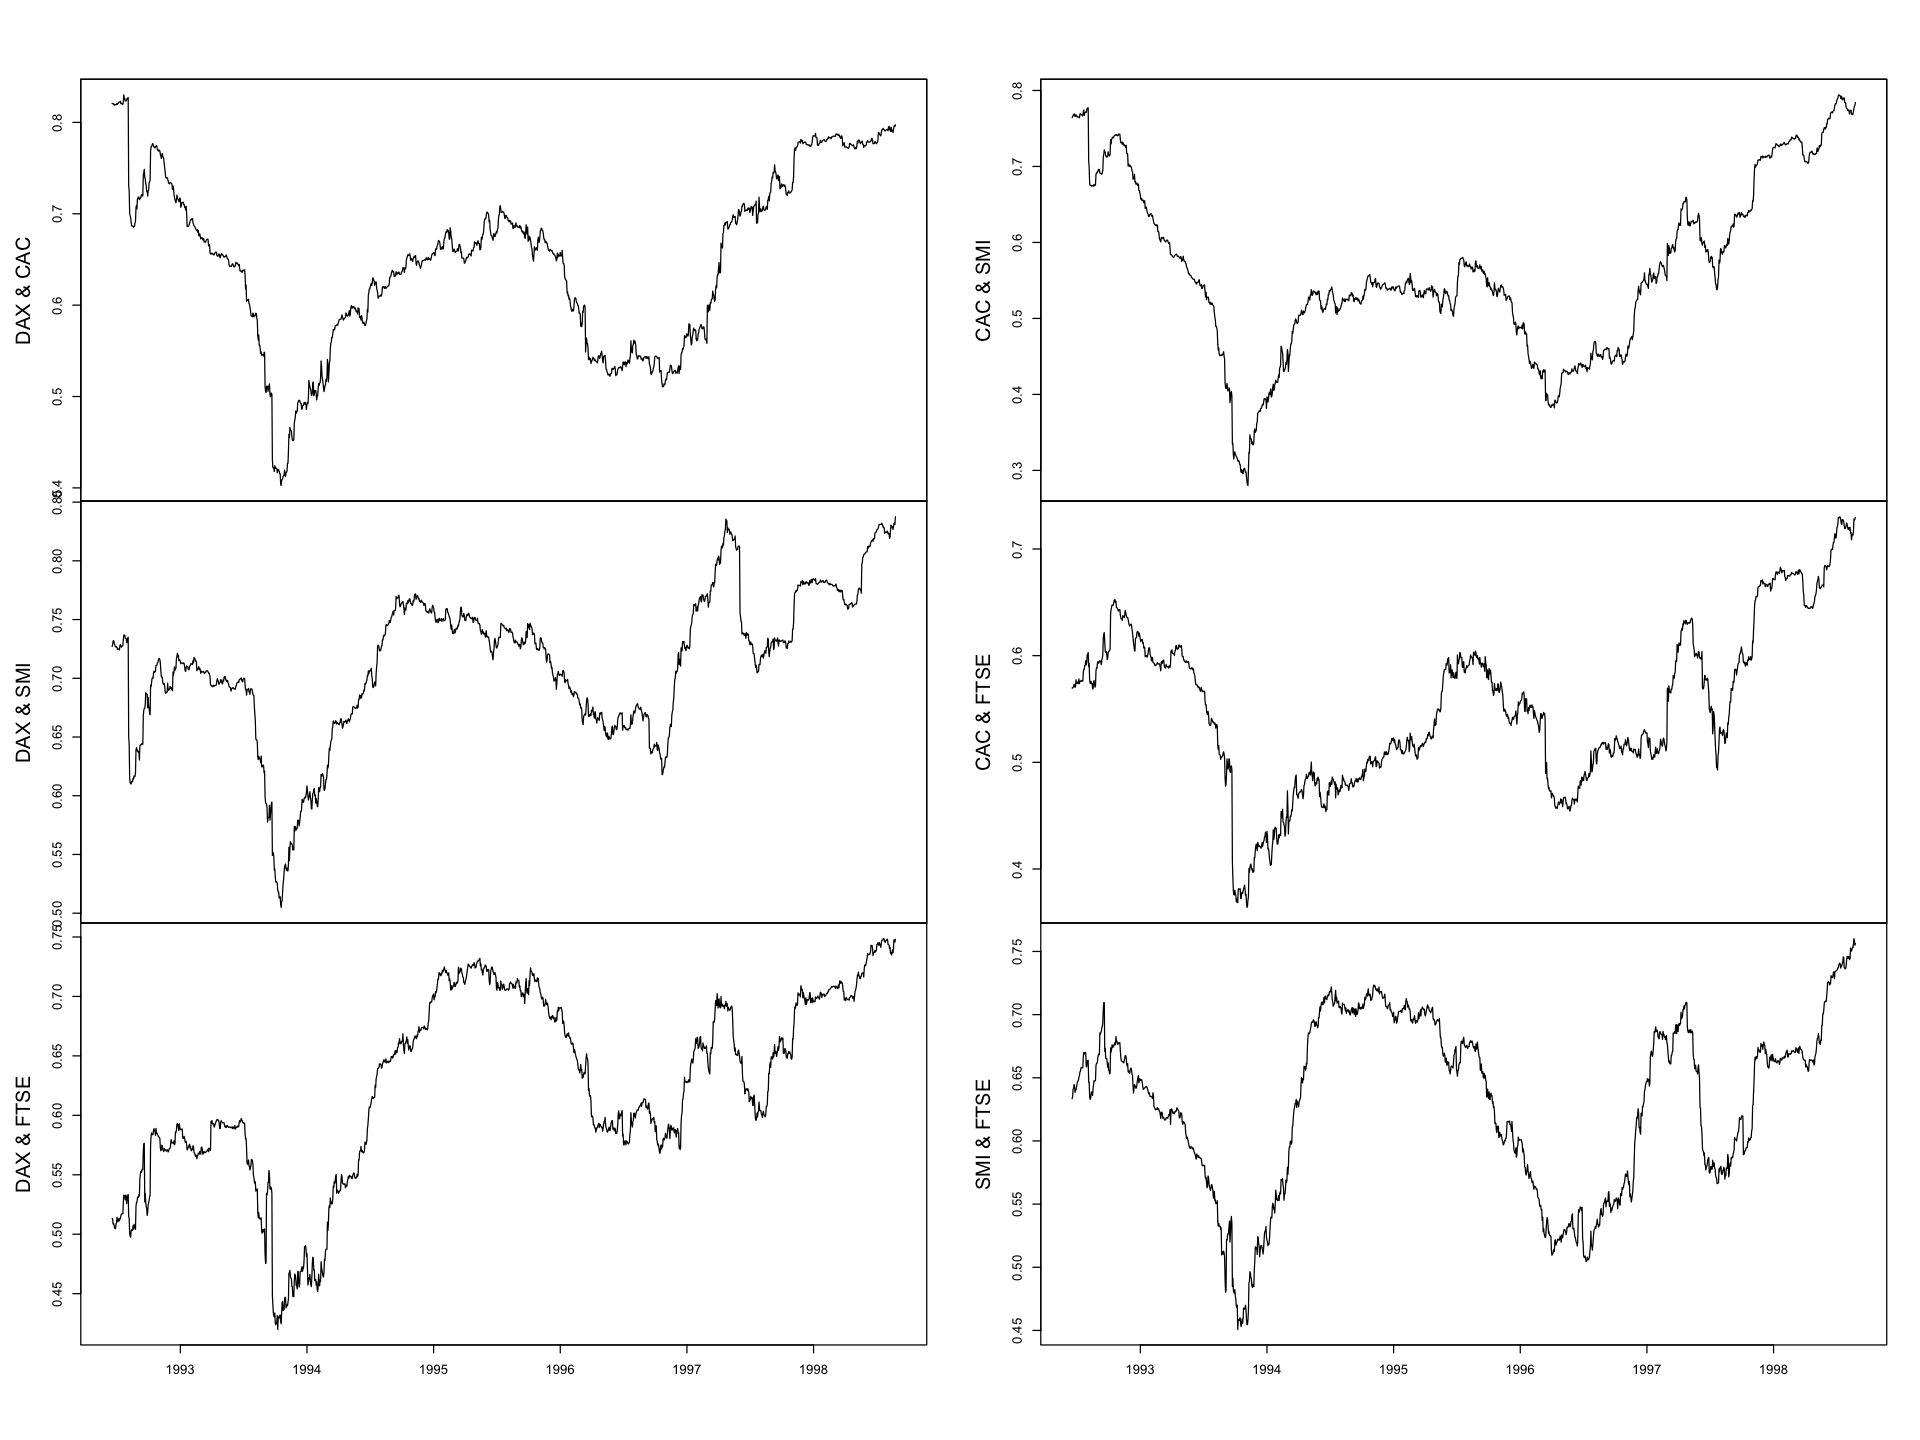

In [54]:
# Let's plot the correlation returns
plot(corr.returns, xlab = "", main = "")

Again look at the volatility clustering the absolute sizes of returns. 

**Economic performance is certainly subject here to the same dynamics we saw for a single
stock.**

## Try this one now . . .
Let’s redo some of the work we just did using another set of techniques.

This time we are using the **“Fisher” transformation.**
Look up Fisher in Wikipedia and in your reference texts. https://en.wikipedia.org/wiki/Fisher_transformation

## Fisher transformation

## Fisher transformation Stabilizes the variability of returns by Pulling the shockiness out, and pulling outliers in!

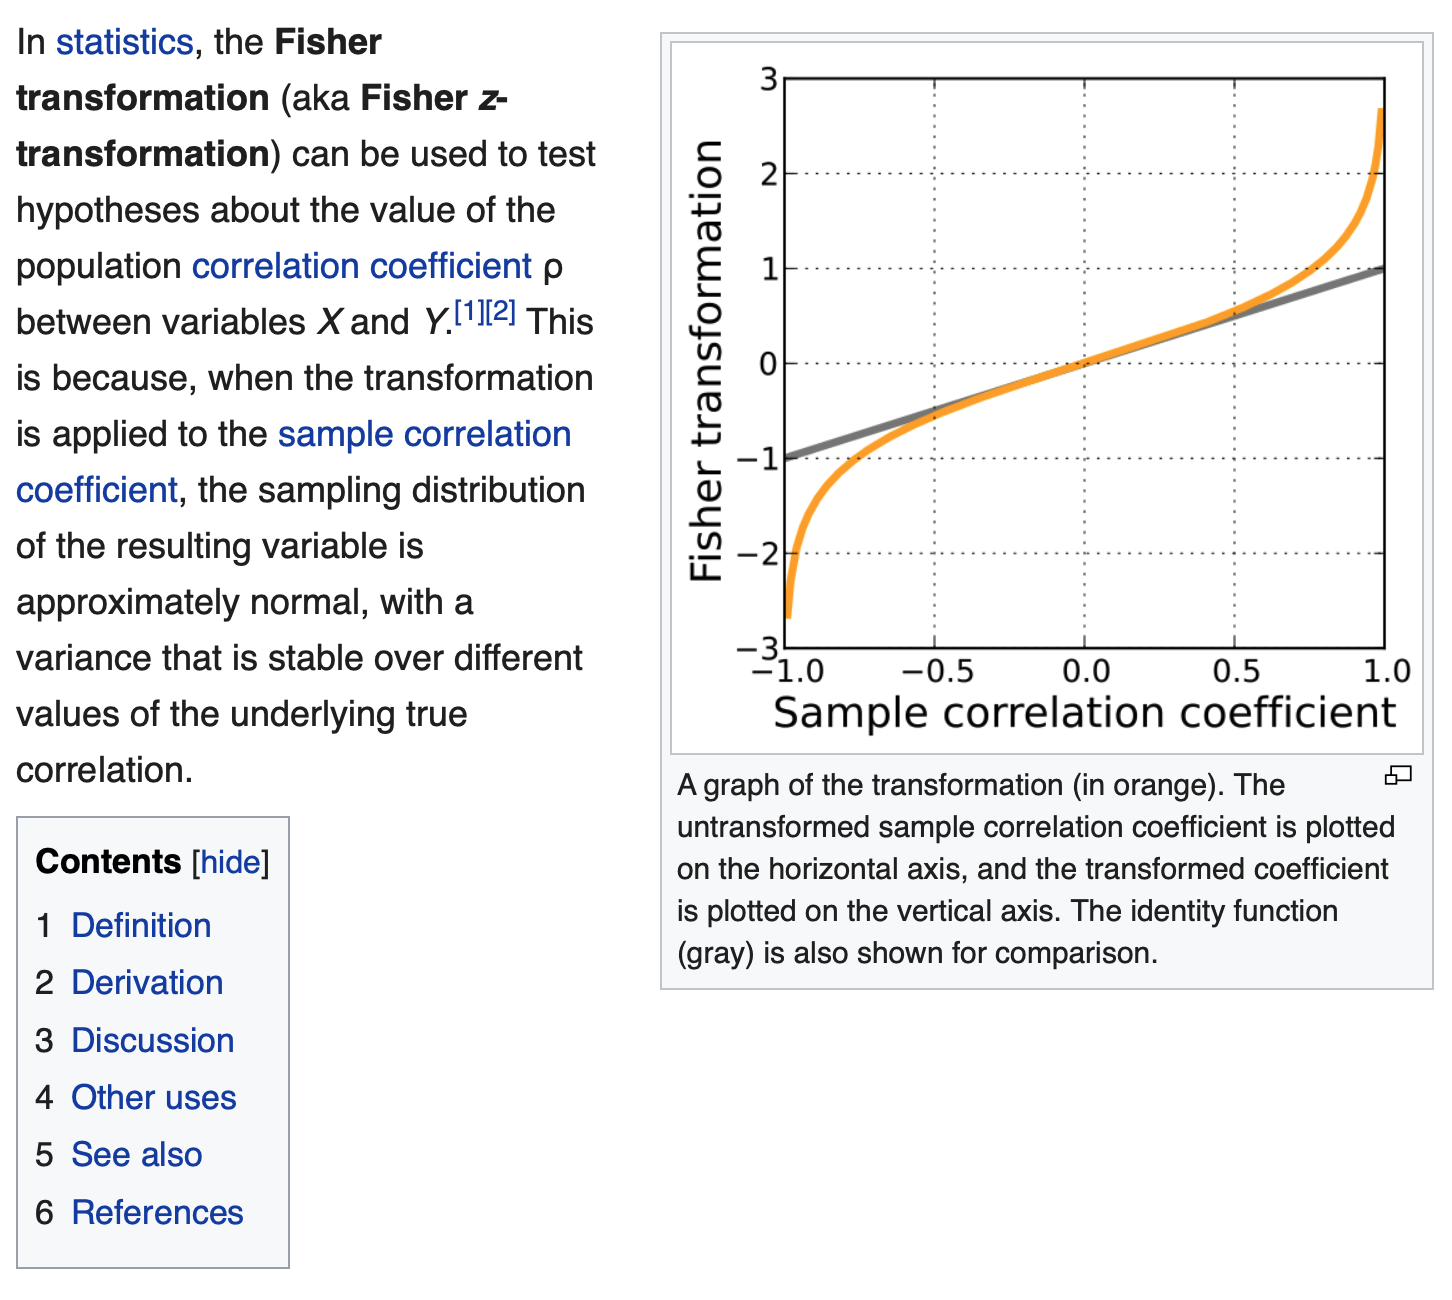

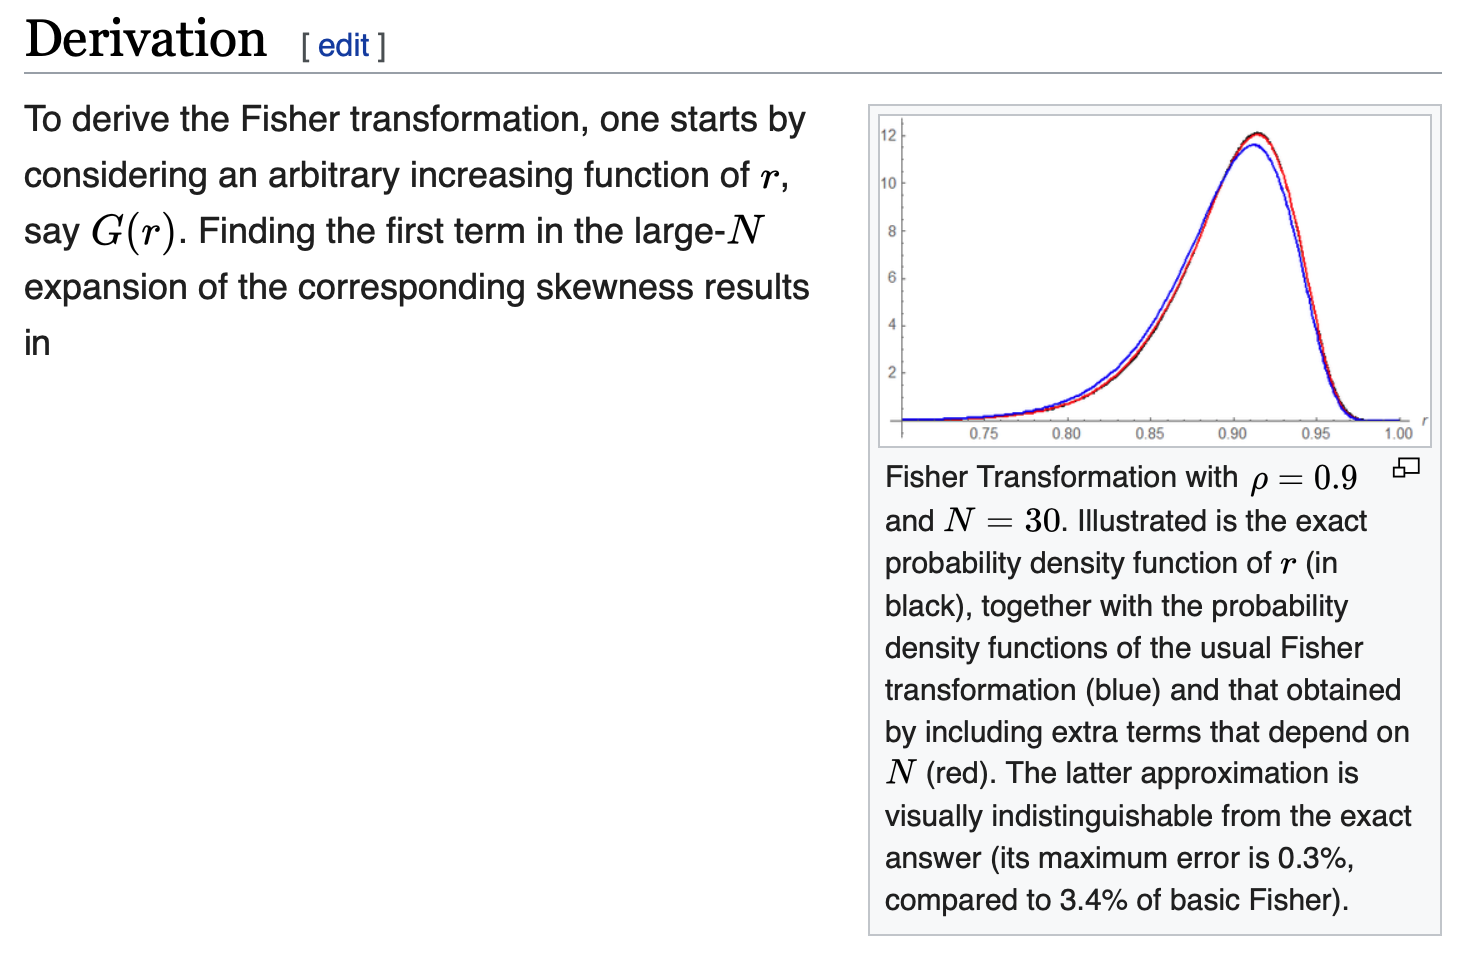

In [58]:
display_png(file = "Screen Shot 2020-01-24 at 7.22.39 PM.png")
display_png(file =  "Screen Shot 2020-01-24 at 7.23.21 PM.png")

In [55]:
fisher <- function(r){
    0.5 * log((1 + r)/(1 - r))
} 

## 2. Replicating the Brent and EU stock market experiments.

Load some packages and get some data using quantmod’s getSymbols off the
Madrid stock exchange. 

Then make some returns and merge into a master file.

In [60]:
install.packages("matrixStats")

Warning message in install.packages("matrixStats"):
“installation of package ‘matrixStats’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [61]:
require(xts)
require(qrmdata)
require(quantreg)
require(quantmod)

In [62]:
require(matrixStats)

Loading required package: matrixStats

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘matrixStats’”


In [63]:
tickers <- c("ELE.MC", "IBE.MC", "REP.MC")
getSymbols(tickers)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "ELE.MC" "IBE.MC" "REP.MC"

In [64]:
REP.r <- diff(log(REP.MC[, 4]))[-1]
IBE.r <- diff(log(IBE.MC[, 4]))[-1]
ELE.r <- diff(log(ELE.MC[, 4]))[-1]

In [65]:
ALL.r <- merge(REP = REP.r, IBE = IBE.r,
            ELE = ELE.r, all = FALSE)

Next plot the returns and their absolute values, acf and pacf, all like we did in Brent.

**Notice**
1 The persistence of returns

2 The importance of return size

3 Clustering of volatility


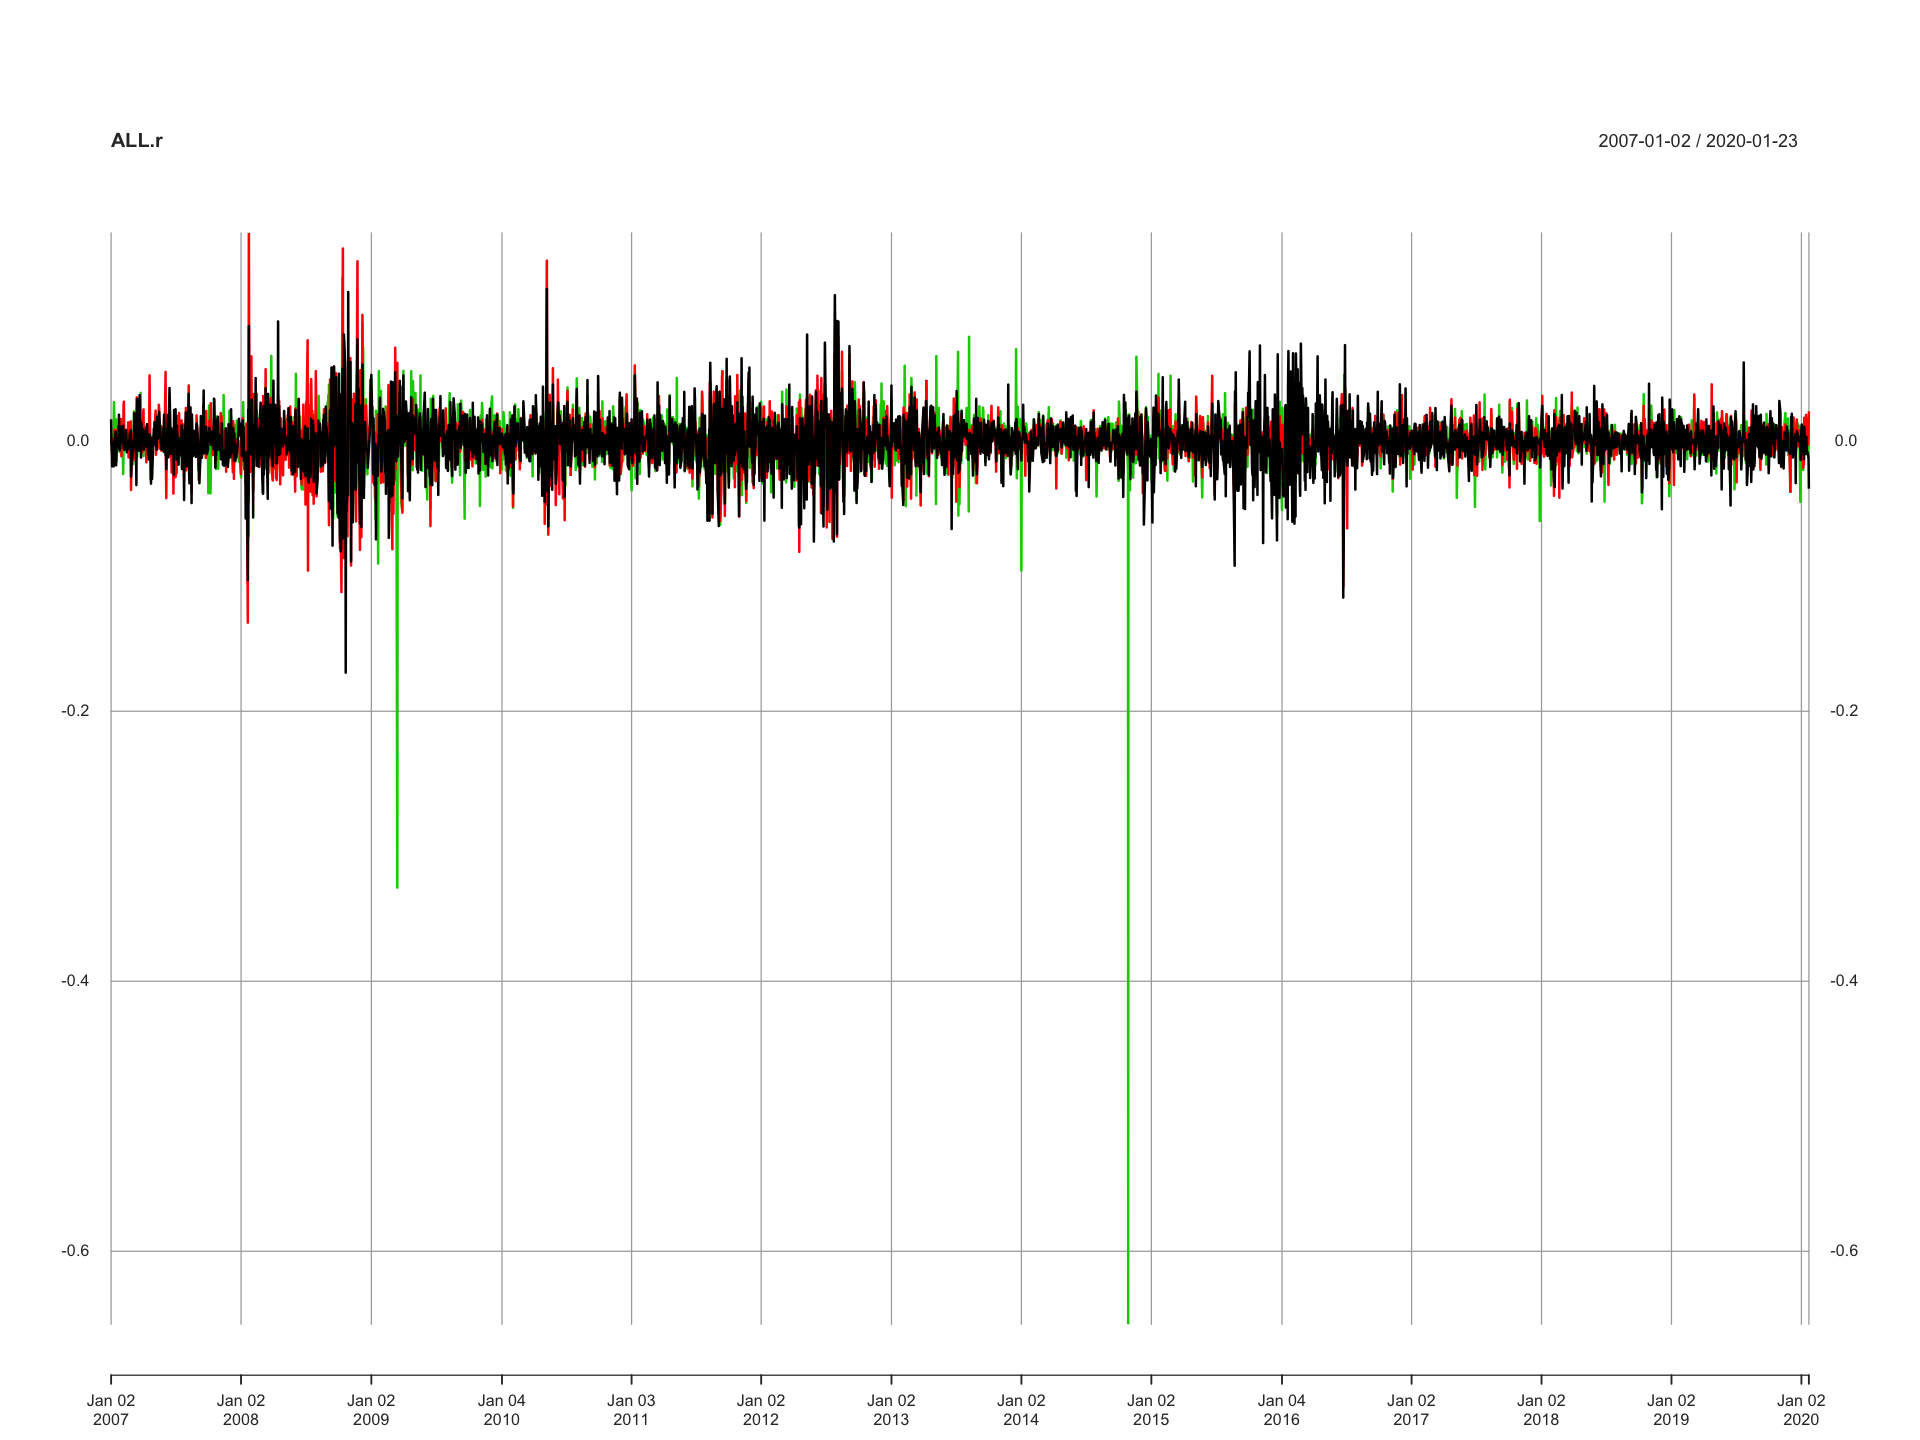

In [66]:
plot(ALL.r)

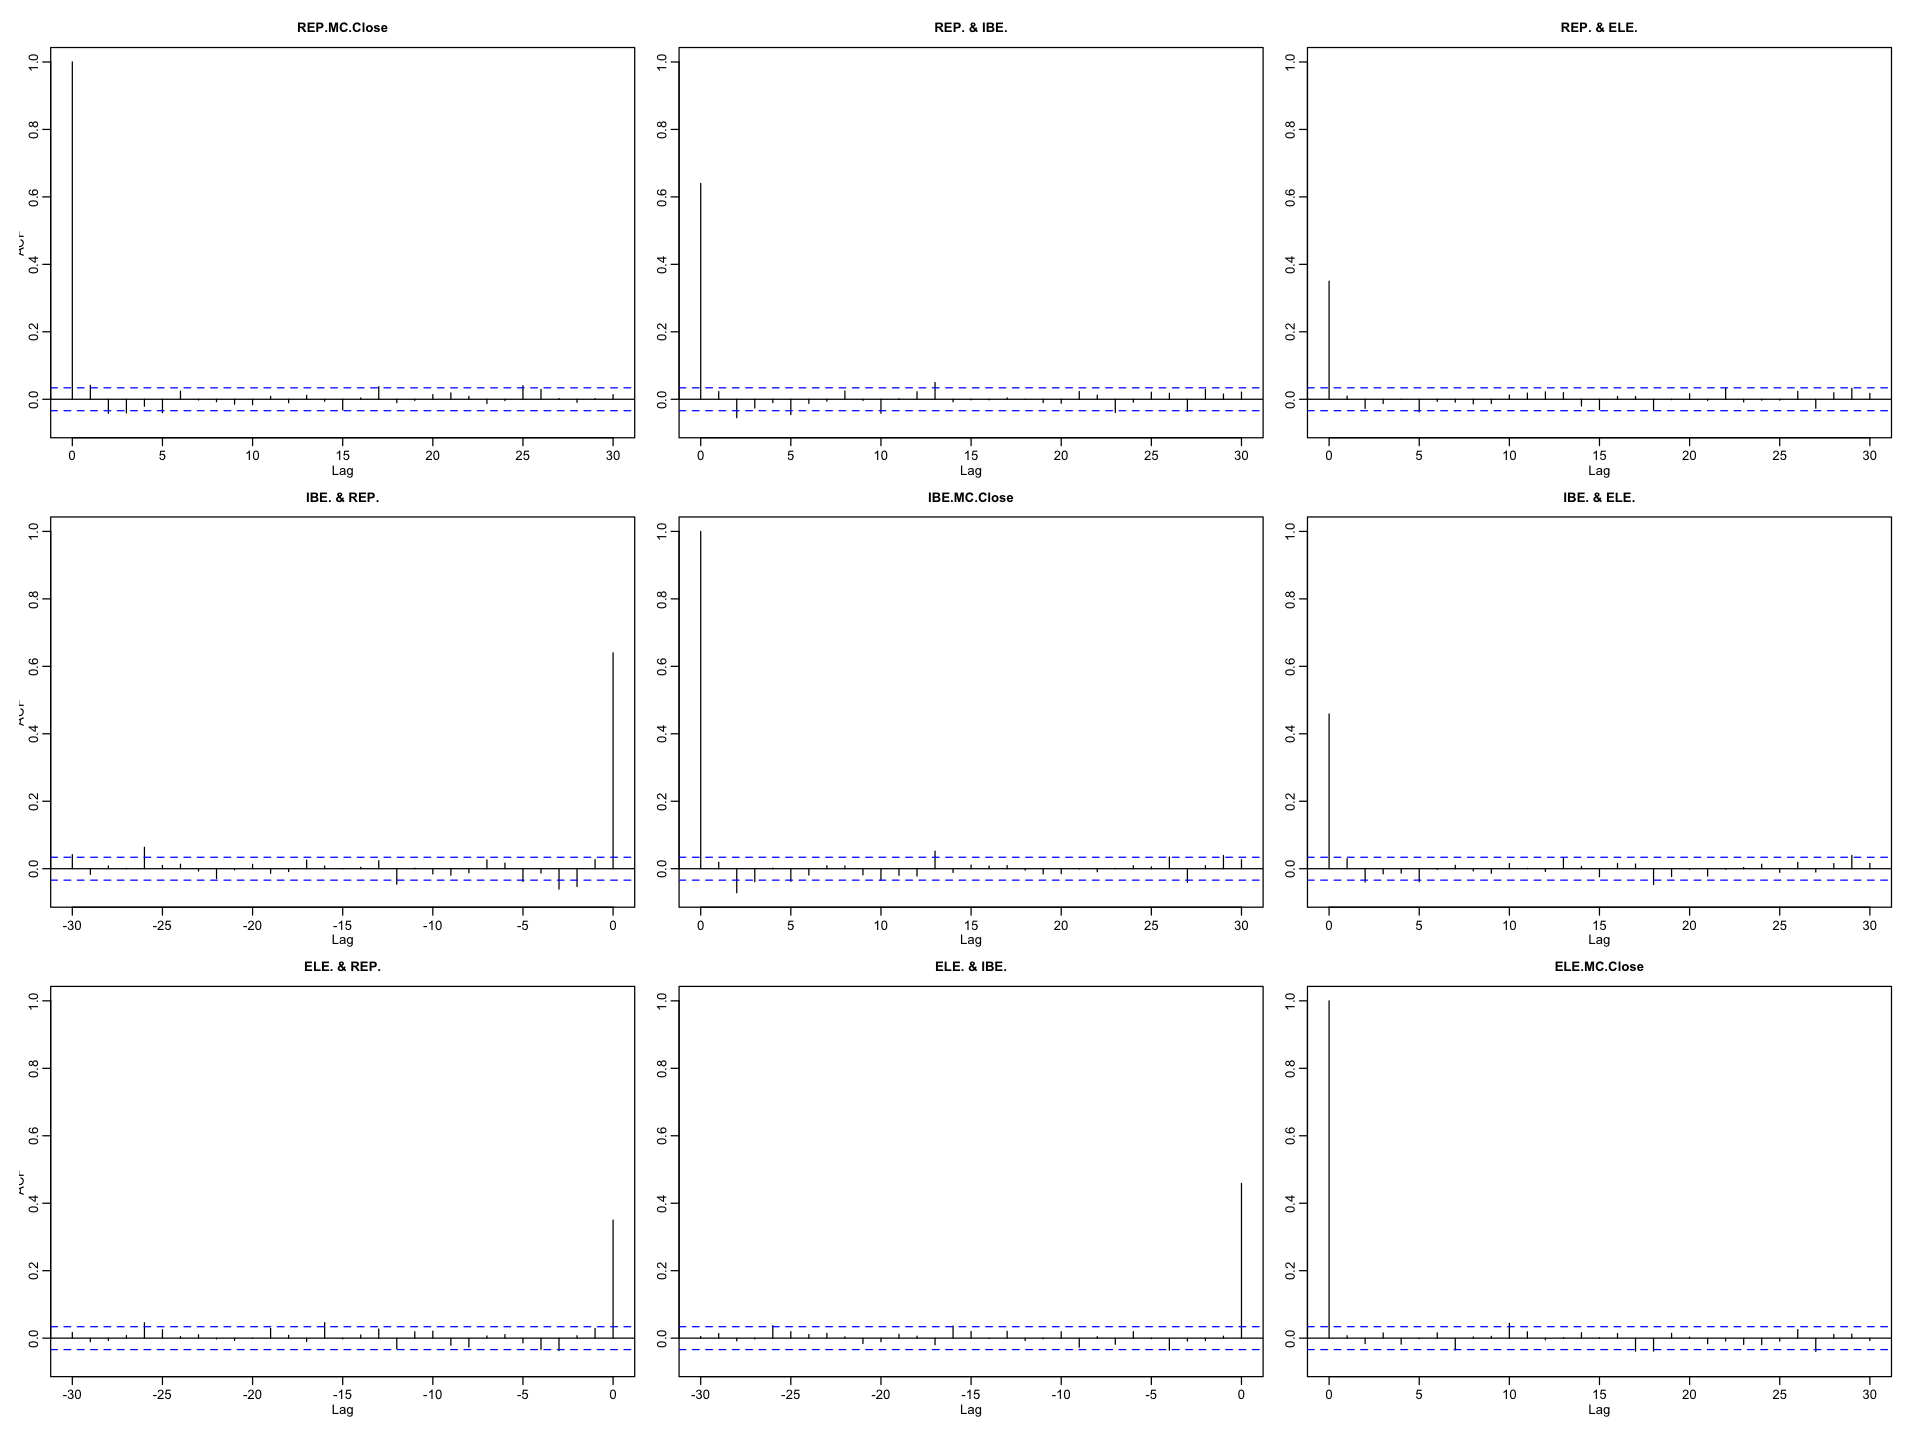

In [67]:
par(mfrow = c(2, 1))
acf(ALL.r)

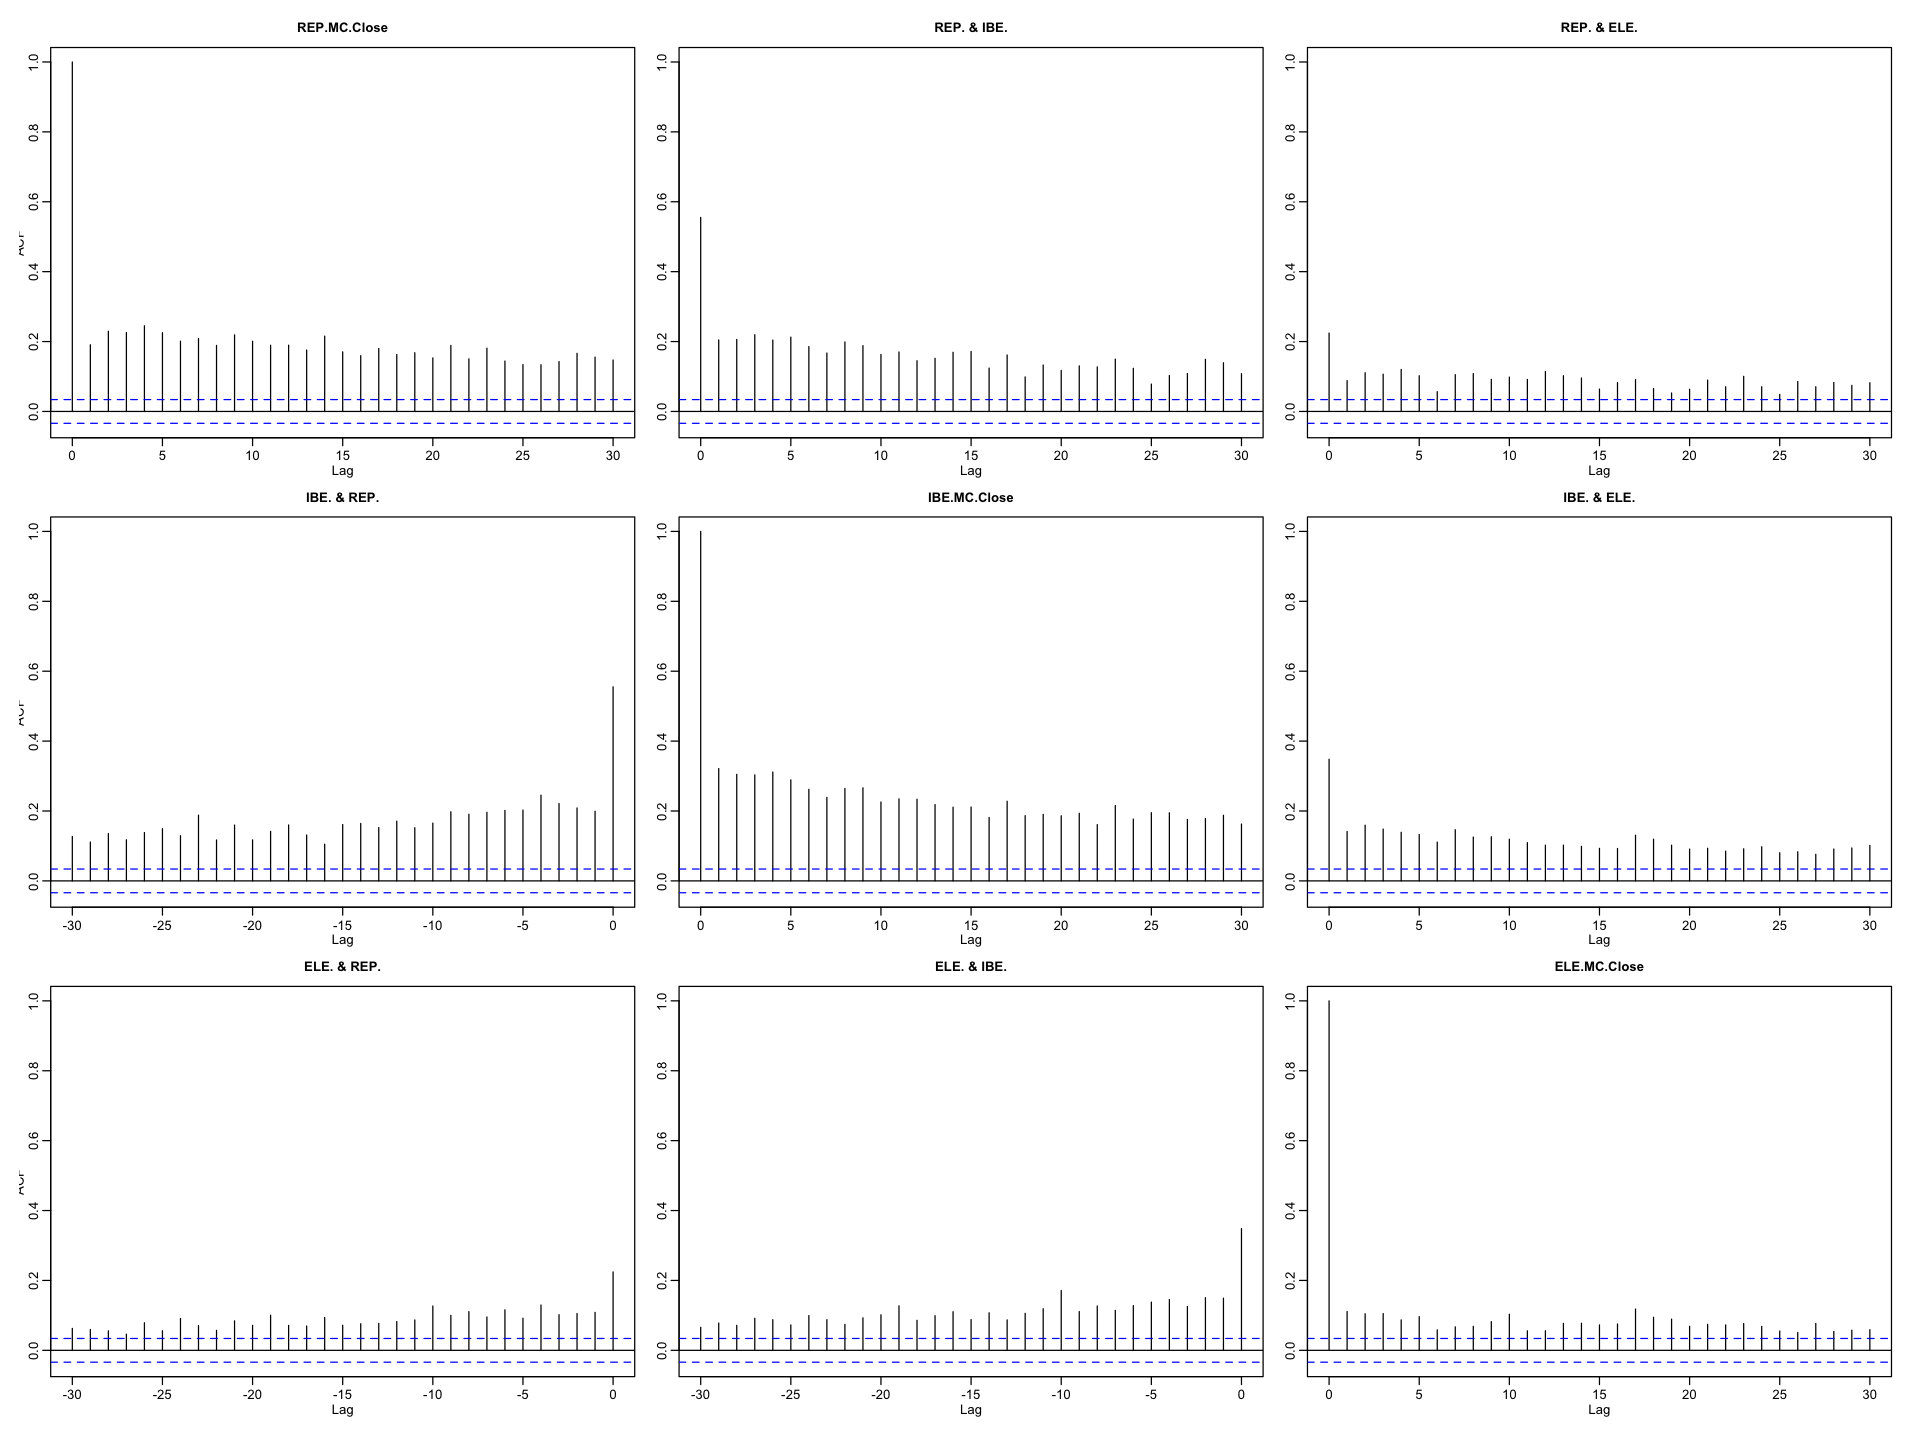

In [68]:
par(mfrow = c(2, 1))
acf(abs(ALL.r))

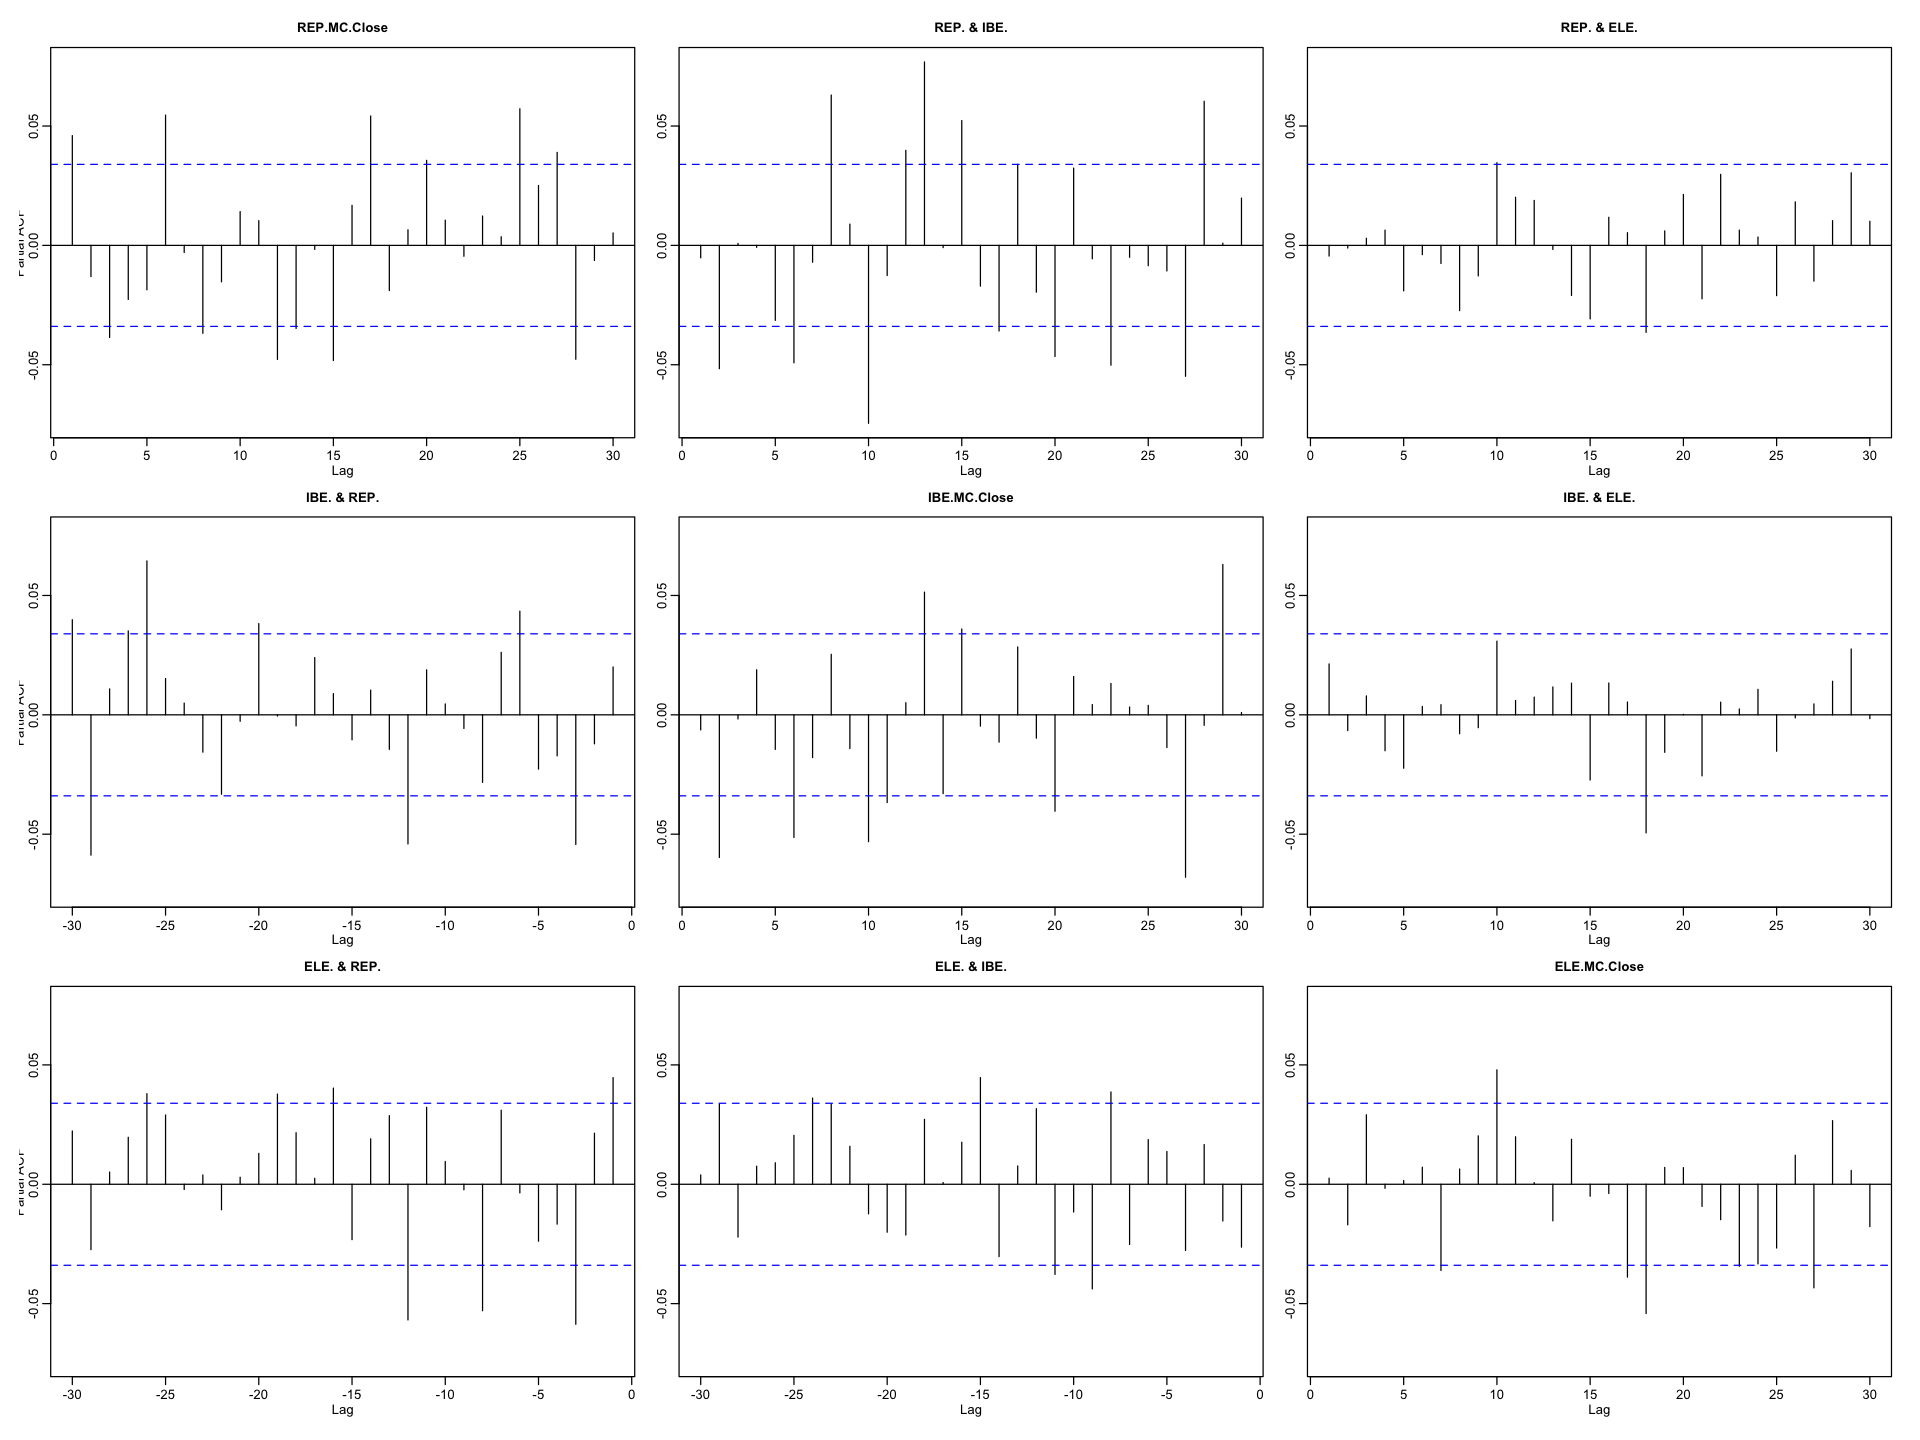

In [69]:
par(mfrow = c(2, 1))
pacf(ALL.r)

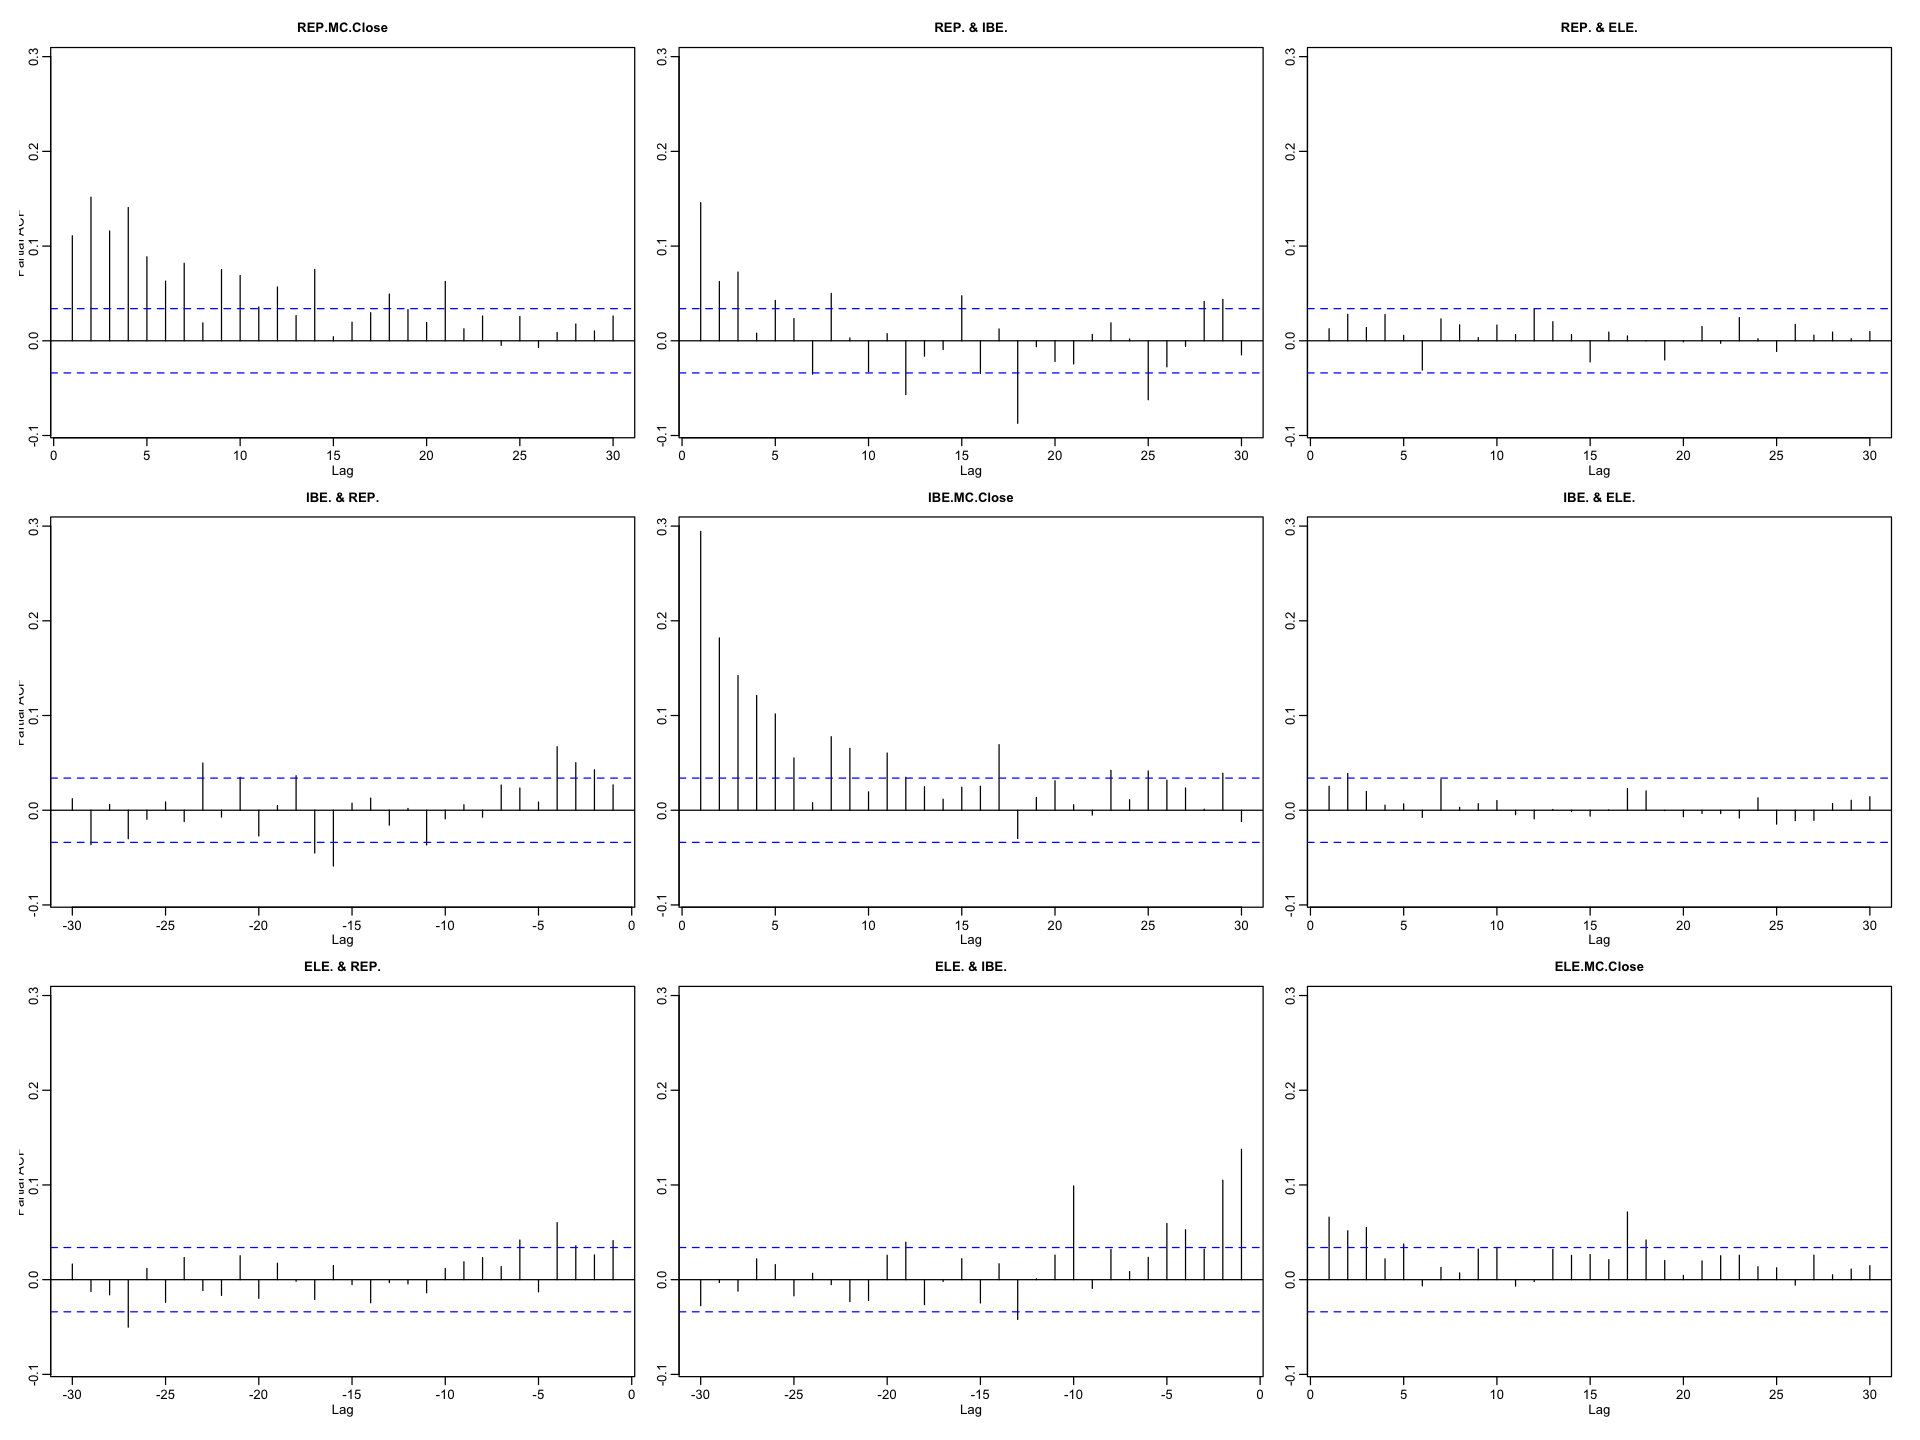

In [70]:
par(mfrow = c(2, 1))
pacf(abs(ALL.r))

Now to examine the correlation structure of markets.

**Notice**

1 The relationship between correlation and volatility

2 How quantile regression gets us to an understanding of high stress (high and
low quantile) episodes

In [71]:
R.corr <- apply.monthly(ALL.r, FUN = cor)
R.vols <- apply.monthly(ALL.r, FUN = colSds) # from MatrixStats
head(R.corr, 3)

           [,1]      [,2]        [,3]      [,4] [,5]       [,6]        [,7]
2007-01-31    1 0.3613554 -0.27540757 0.3613554    1 0.10413800 -0.27540757
2007-02-28    1 0.5661814 -0.09855544 0.5661814    1 0.10760477 -0.09855544
2007-03-30    1 0.4500982 -0.08874664 0.4500982    1 0.08538064 -0.08874664
                 [,8] [,9]
2007-01-31 0.10413800    1
2007-02-28 0.10760477    1
2007-03-30 0.08538064    1

In [72]:
head(R.vols, 3)

           REP.MC.Close IBE.MC.Close ELE.MC.Close
2007-01-31  0.009787963  0.007892759  0.009777426
2007-02-28  0.009181099  0.014571945  0.007674848
2007-03-30  0.015317331  0.012719792  0.010919155

In [73]:
R.corr.1 <- matrix(R.corr[1, ], nrow = 3,
ncol = 3, byrow = FALSE)
rownames(R.corr.1) <- tickers
colnames(R.corr.1) <- tickers
head(R.corr.1)

ELE.MC     IBE.MC    REP.MC    
ELE.MC  1.0000000 0.3613554 -0.2754076
IBE.MC  0.3613554 1.0000000  0.1041380
REP.MC -0.2754076 0.1041380  1.0000000

In [74]:
R.corr <- R.corr[, c(2, 3, 6)]
colnames(R.corr) <- c("ELE.IBE", "ELE.REP",
"IBE.REP")
colnames(R.vols) <- c("ELE.vols", "IBE.vols",
"REP.vols")
head(R.corr, 3)

             ELE.IBE     ELE.REP    IBE.REP
2007-01-31 0.3613554 -0.27540757 0.10413800
2007-02-28 0.5661814 -0.09855544 0.10760477
2007-03-30 0.4500982 -0.08874664 0.08538064

In [75]:
head(R.vols, 3)

              ELE.vols    IBE.vols    REP.vols
2007-01-31 0.009787963 0.007892759 0.009777426
2007-02-28 0.009181099 0.014571945 0.007674848
2007-03-30 0.015317331 0.012719792 0.010919155

In [76]:
R.corr.vols <- merge(R.corr, R.vols)

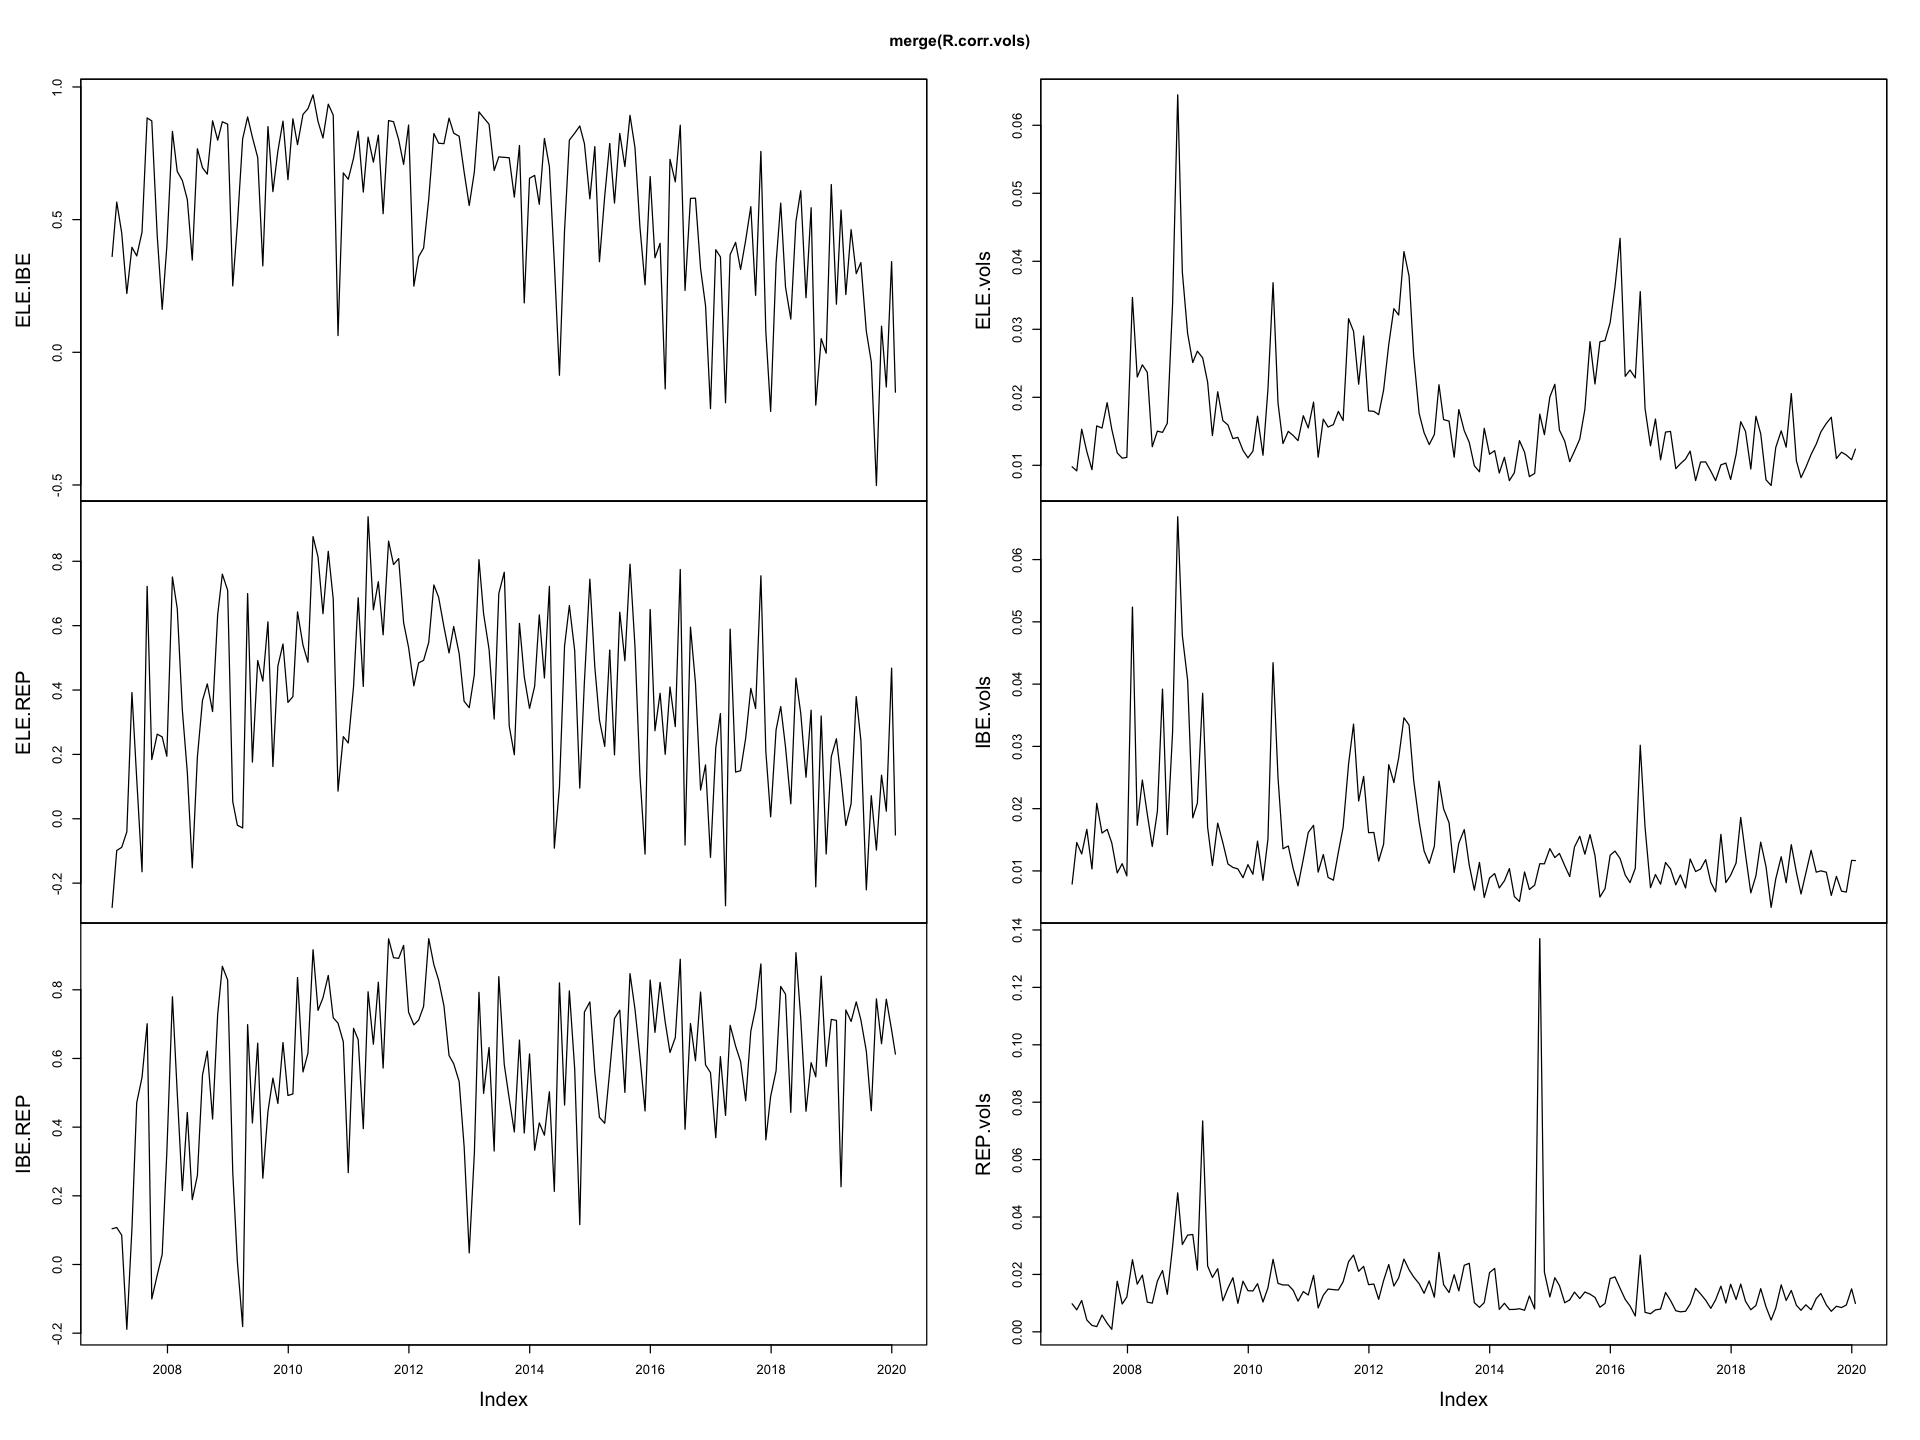

In [77]:
plot.zoo(merge(R.corr.vols))

In [78]:
ELE.vols <- as.numeric(R.corr.vols[,
"ELE.vols"])
IBE.vols <- as.numeric(R.vols[, "IBE.vols"])
REP.vols <- as.numeric(R.vols[, "REP.vols"])
length(ELE.vols)

[1] 157

In [79]:
fisher <- function(r) {
0.5 * log((1 + r)/(1 - r))
}
rho.fisher <- matrix(fisher(as.numeric(R.corr.vols[,
1:3])), nrow = length(ELE.vols),
ncol = 3, byrow = FALSE)

Here is the quantile regression part of the package.

Notice

1 We set taus as the quantiles of interest.

2 We run the quantile regression using the quantreg package and a call to the
rq function.

3 We can overlay the quantile regression results onto the standard linear model
regression.

4 We can sensitize our analysis with the range of upper and lower bounds on the
parameter estimates of the relationship between correlation and volatility.

In [80]:
taus <- seq(0.05, 0.95, 0.05)
fit.rq.ELE.IBE <- rq(rho.fisher[, 1] ~
ELE.vols, tau = taus)
fit.lm.ELE.IBE <- lm(rho.fisher[, 1] ~
ELE.vols)

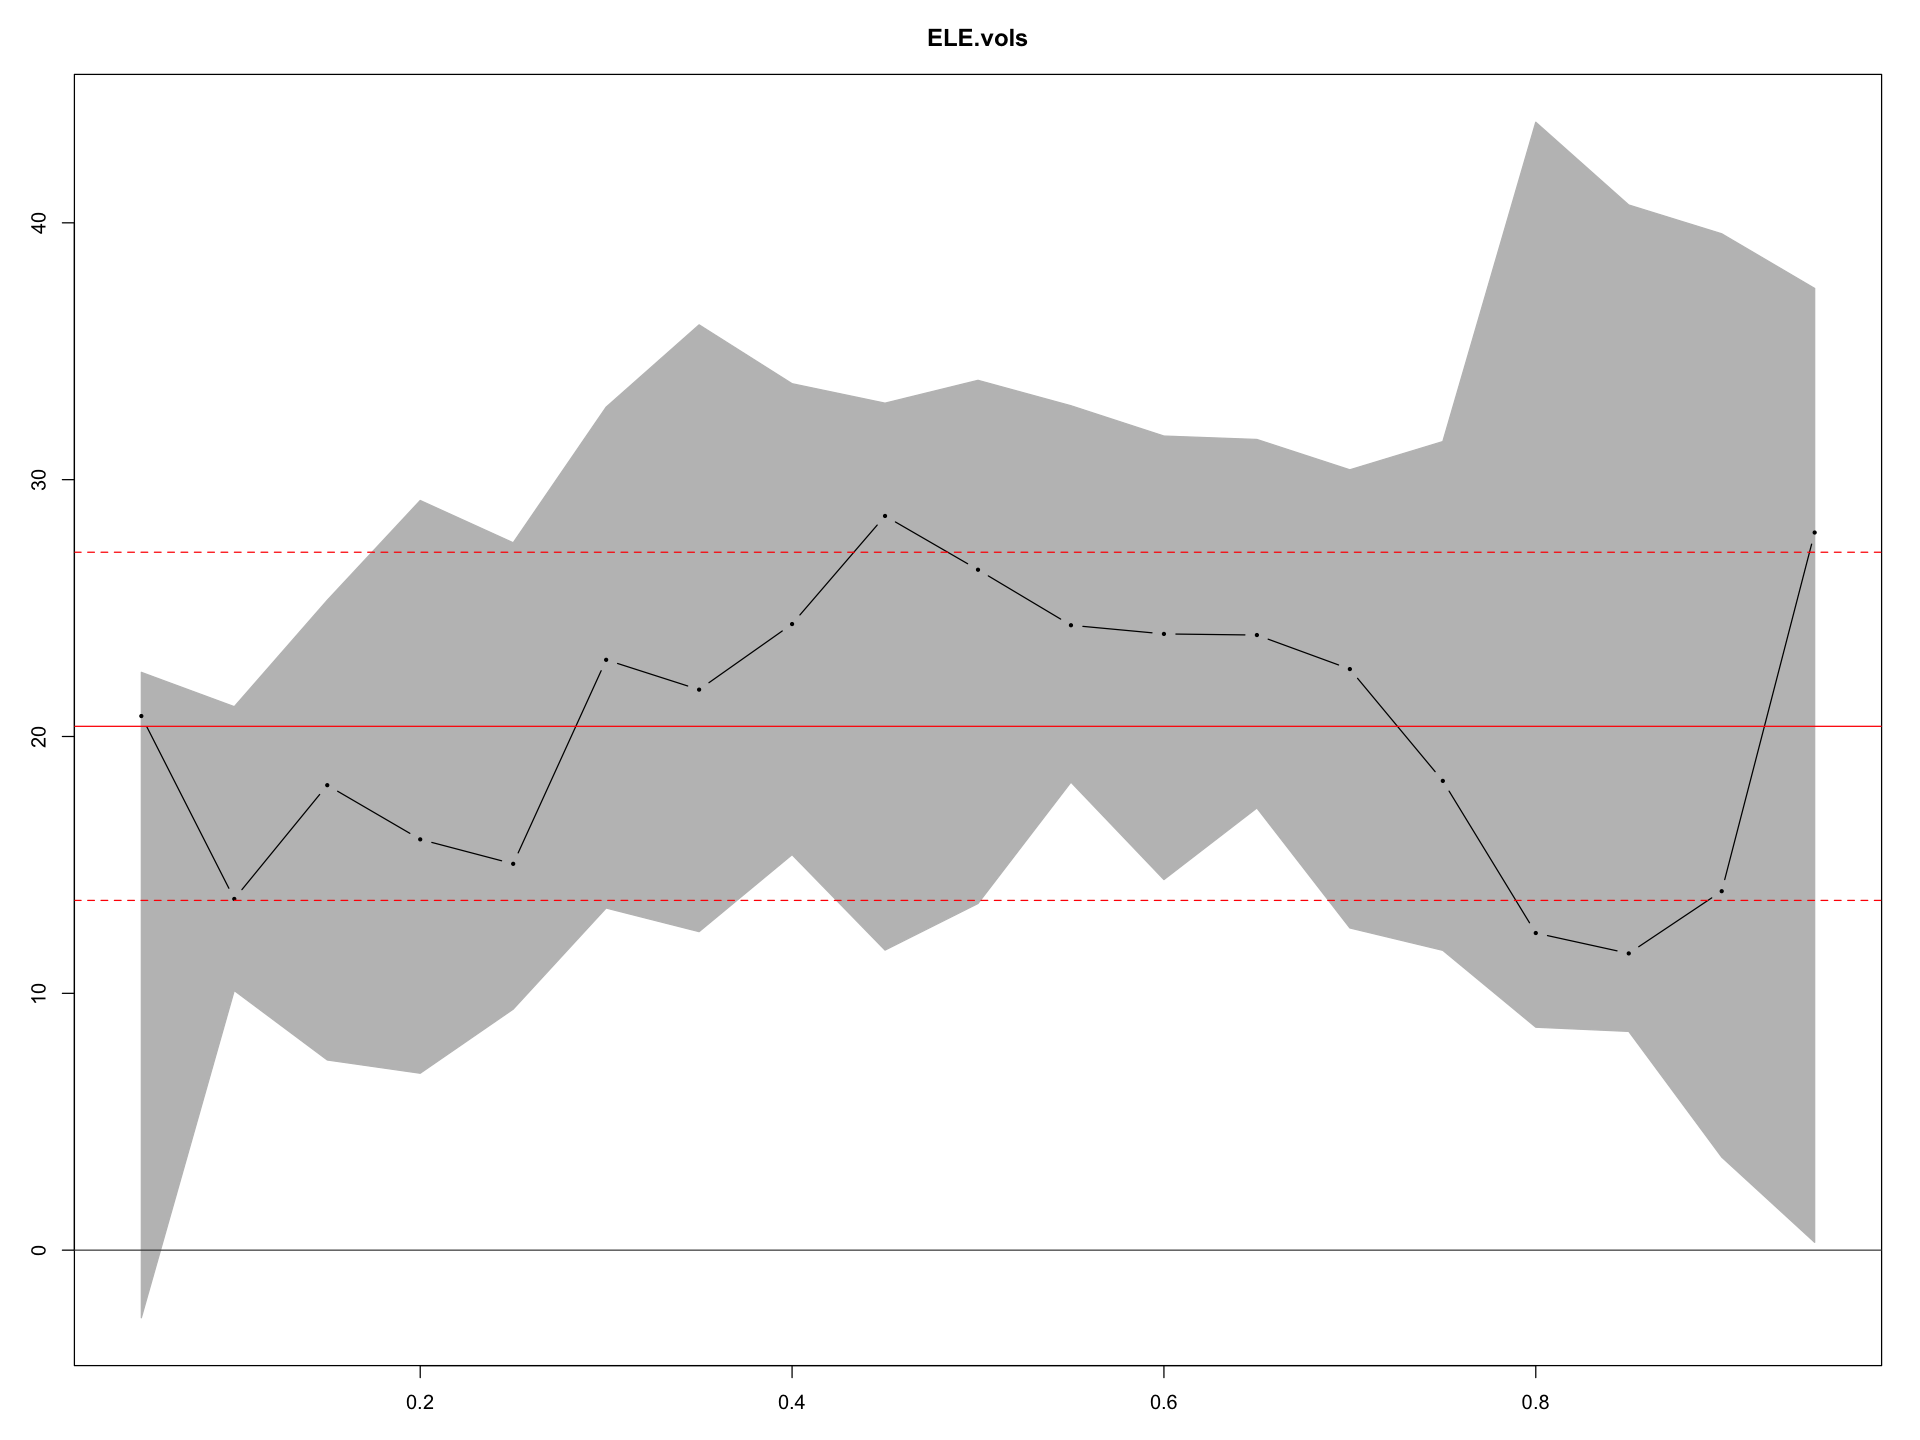

In [81]:
plot(summary(fit.rq.ELE.IBE), parm = "ELE.vols")

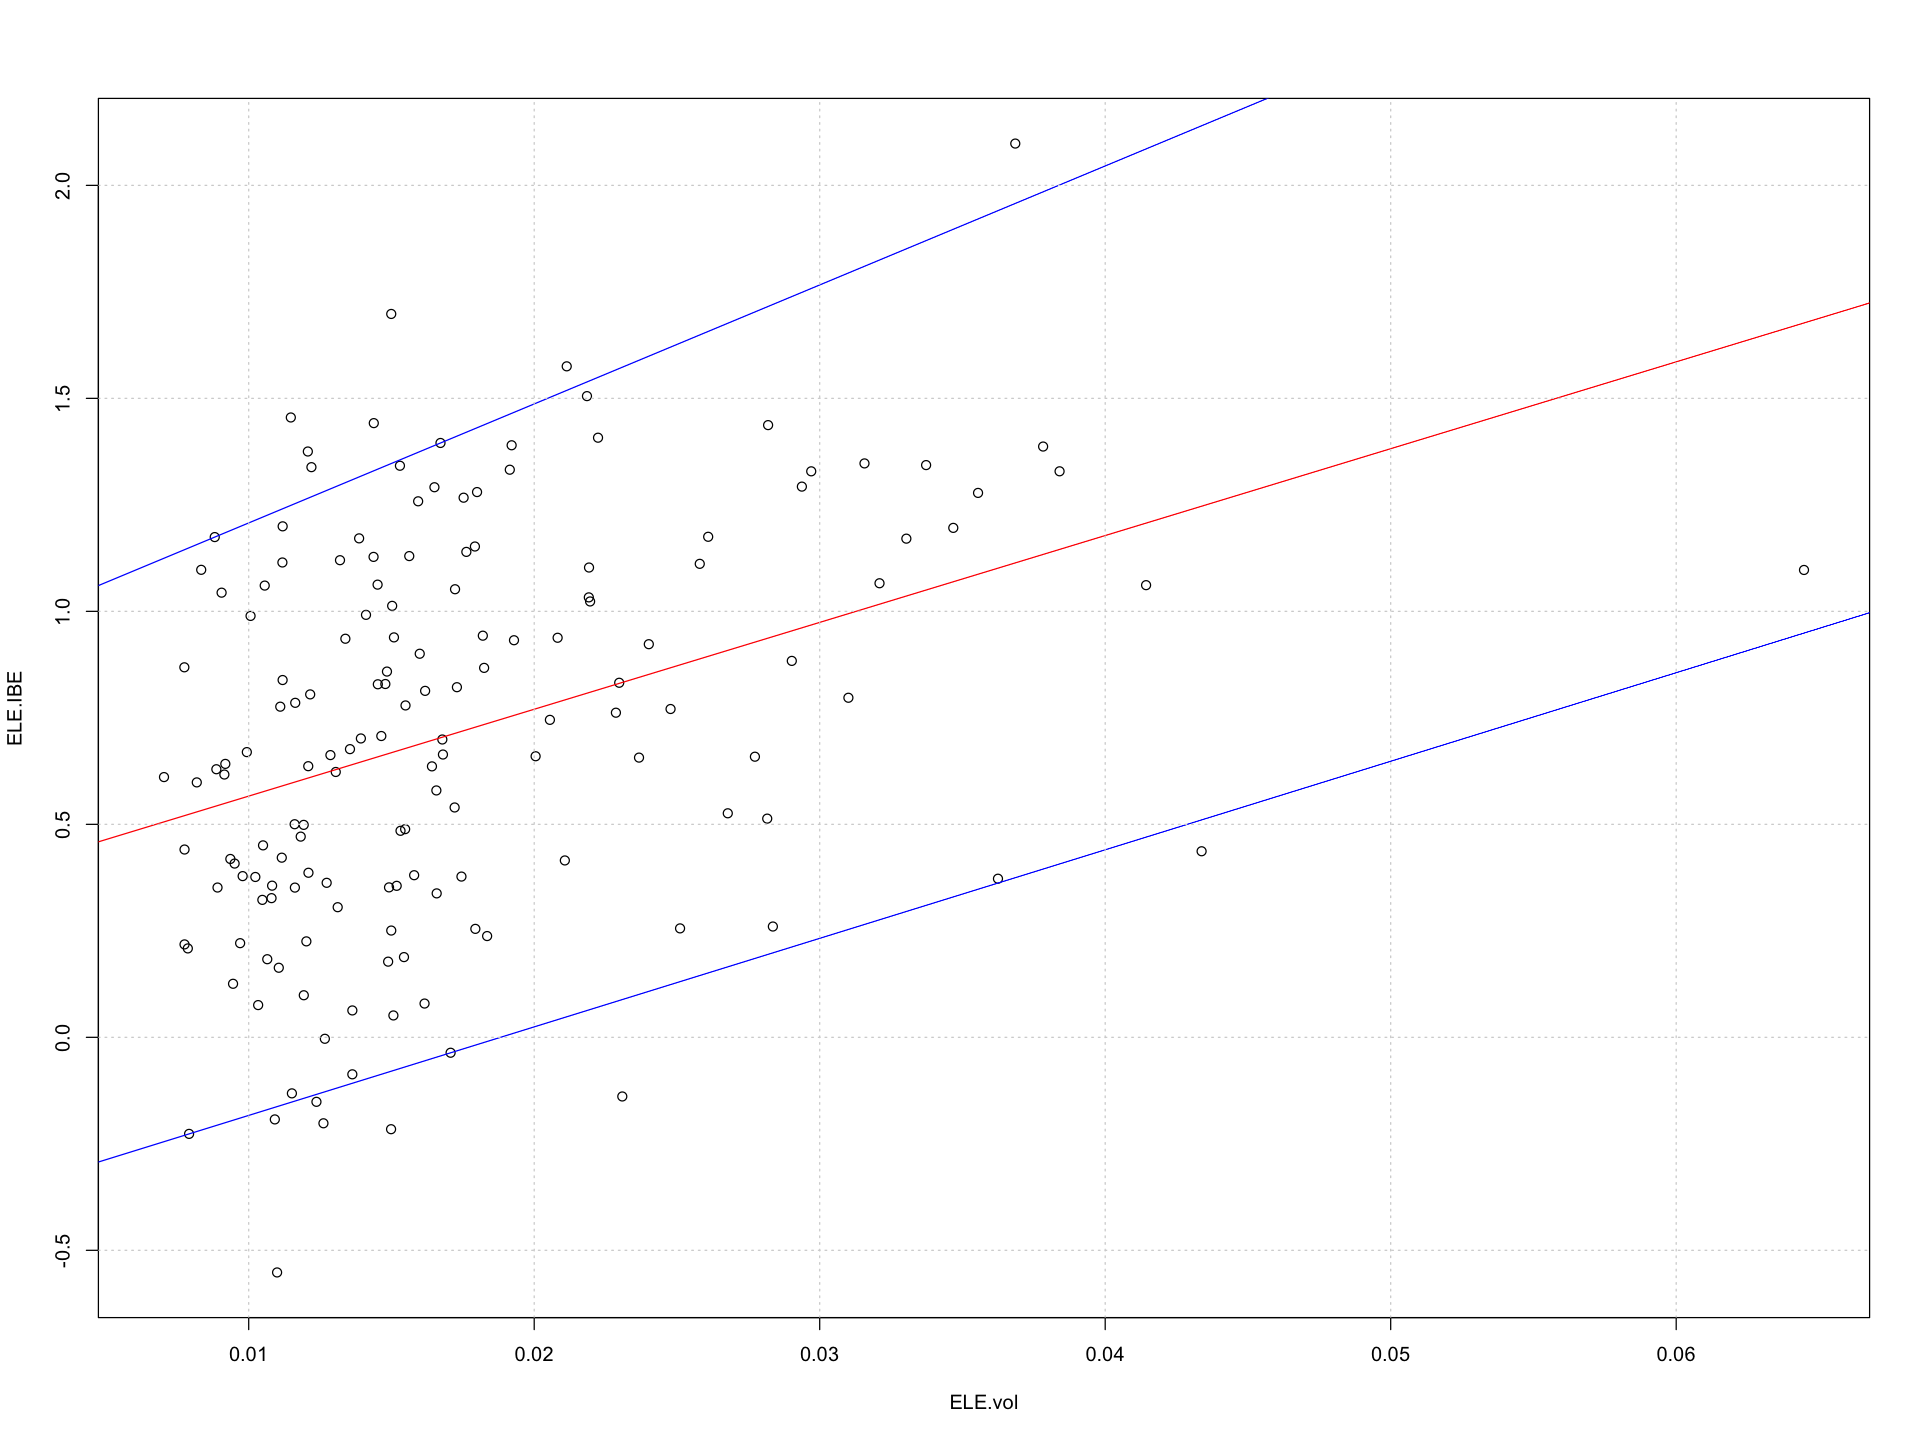

In [82]:
# Here we build the estimations and plot the upper and lower bounds.
taus1 <- c(0.05, 0.95) # fit the confidence interval (CI)
plot(ELE.vols, rho.fisher[, 1], xlab = "ELE.vol",
ylab = "ELE.IBE")
abline(fit.lm.ELE.IBE, col = "red")
for (i in 1:length(taus1)) {
# these lines will be the CI
abline(rq(rho.fisher[, 1] ~ ELE.vols,
tau = taus1[i]), col = "blue")
}
grid()


### Bounding our enthusiasm

1 Quantile regression helps us to see the upper and lower bounds.

2 Relationships between high-stress periods and correlation are abundant.

3 These markets simply reflect normal buying behaviors across many types of
exchanges: buying food at Safeway or Whole Foods, buying collateral to insure
a project, selling off illiquid assets.

## Time is on our side. . .

Let’s start with some US Gross National Product (GNP) data from the St. Louis

Fed’s open data website (“FRED”). We build a URL using the paste() function.

In [83]:
name <- "GNP"
URL <- paste("http://research.stlouisfed.org/fred2/series/", 
             name, "/", "downloaddata/", name, ".csv", sep = "")
download <- read.csv(URL)

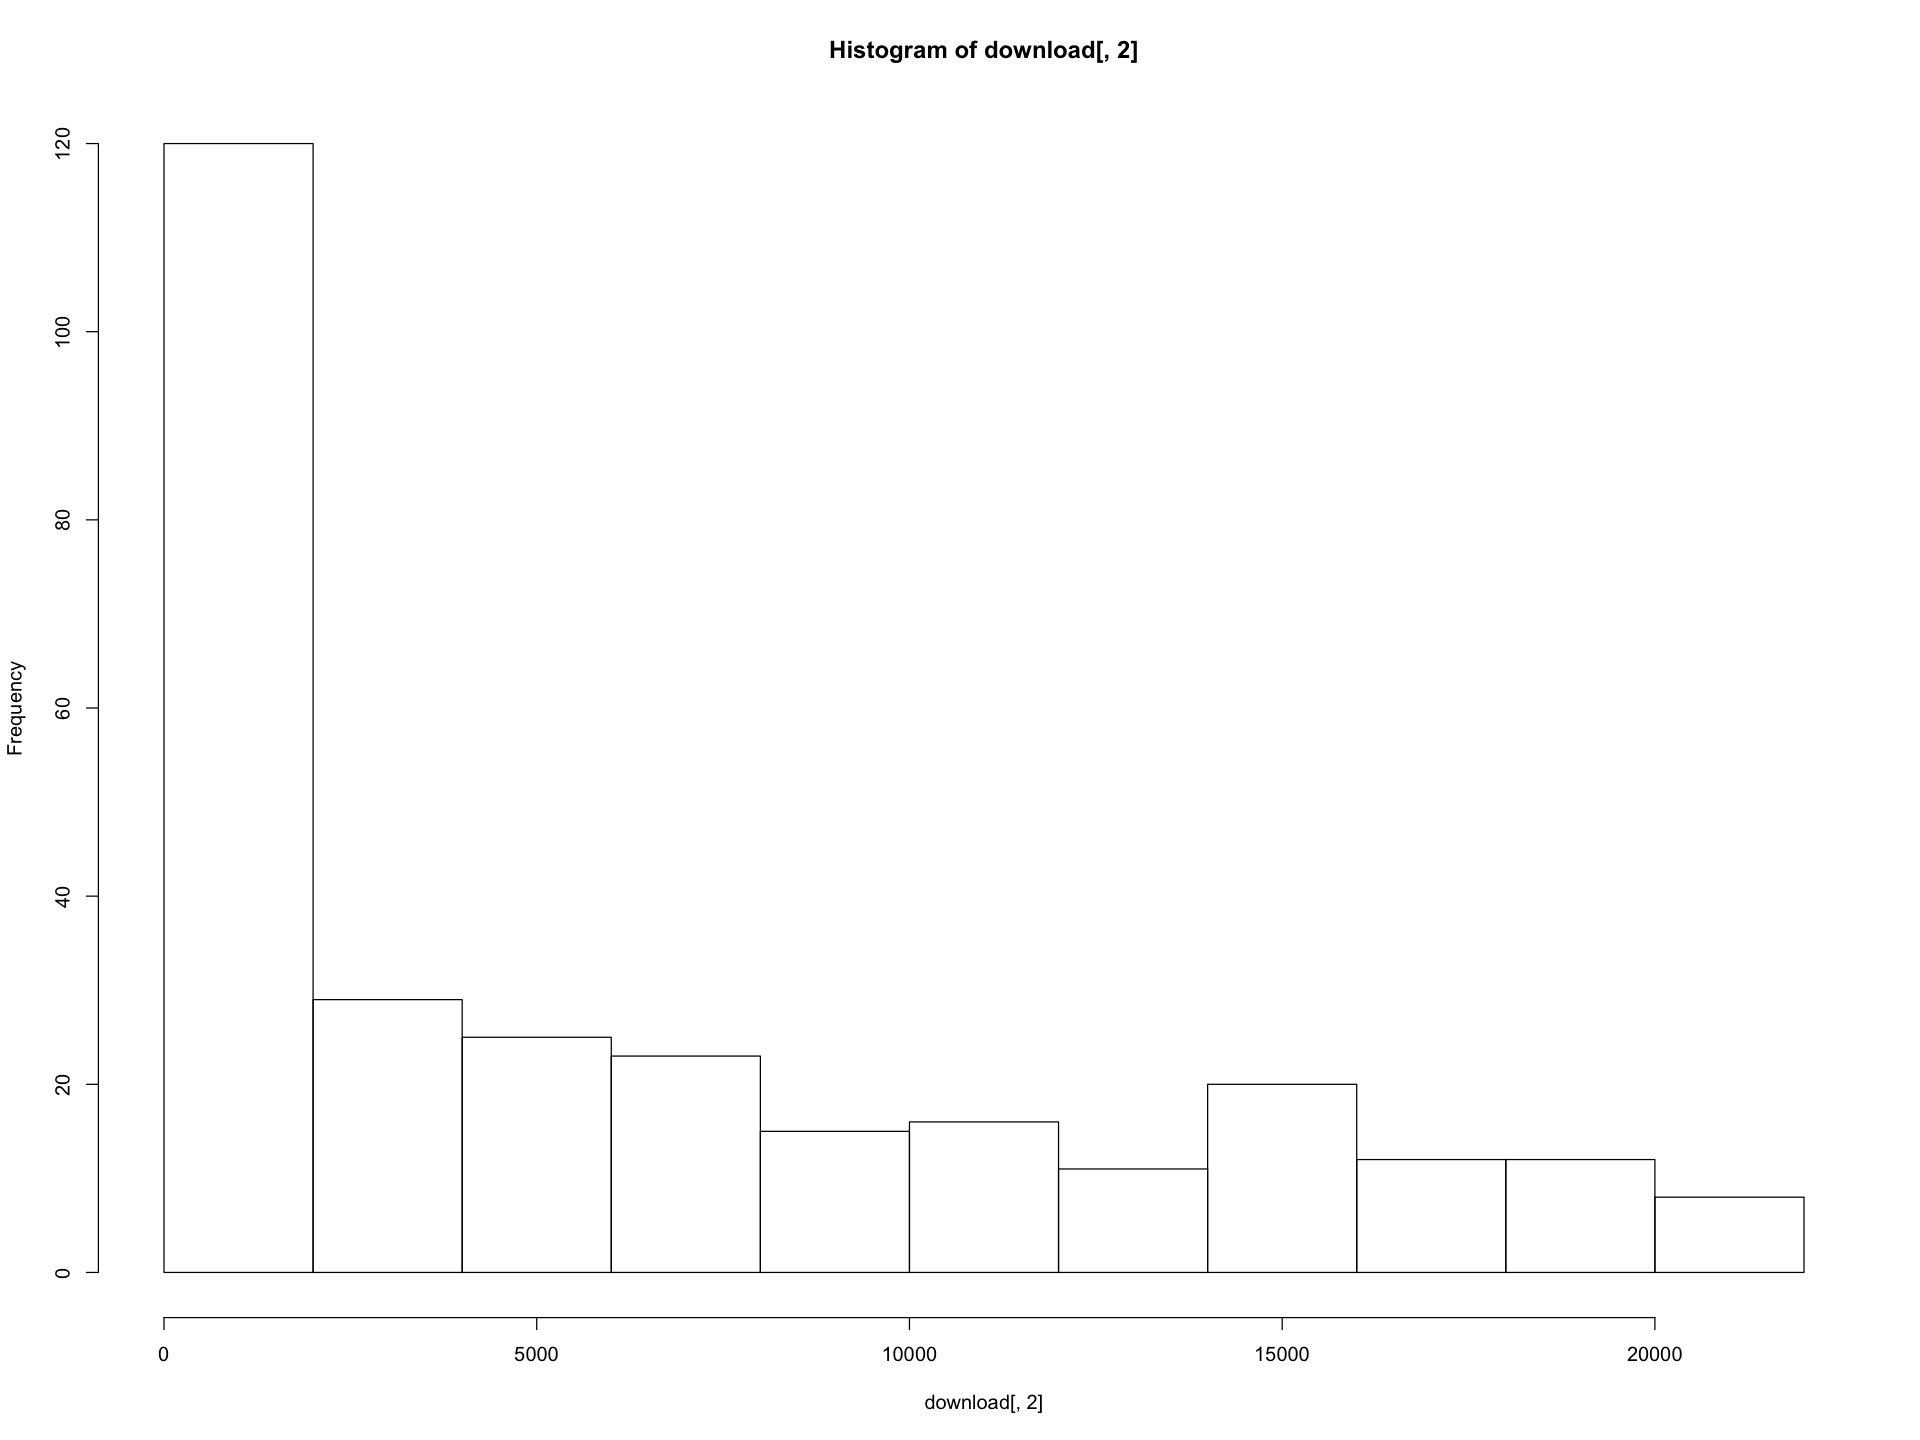

In [84]:
# Look at the data:
hist(download[, 2])

In [85]:
summary(download[, 2])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  244.1   729.5  3615.6  6197.1 10632.2 21851.5 

Create a raw time series object (rownames are dates. . . ), select some data, and
calculate growth rates

In [88]:
GNP <- ts(download[1:84, 2]/1000, start = c(1995, 1), freq = 4)
GNP.rate = 100 * diff(log(GNP))

### Try this . . .

1 Plot the GNP level and rate.

2 Comment on the patterns.


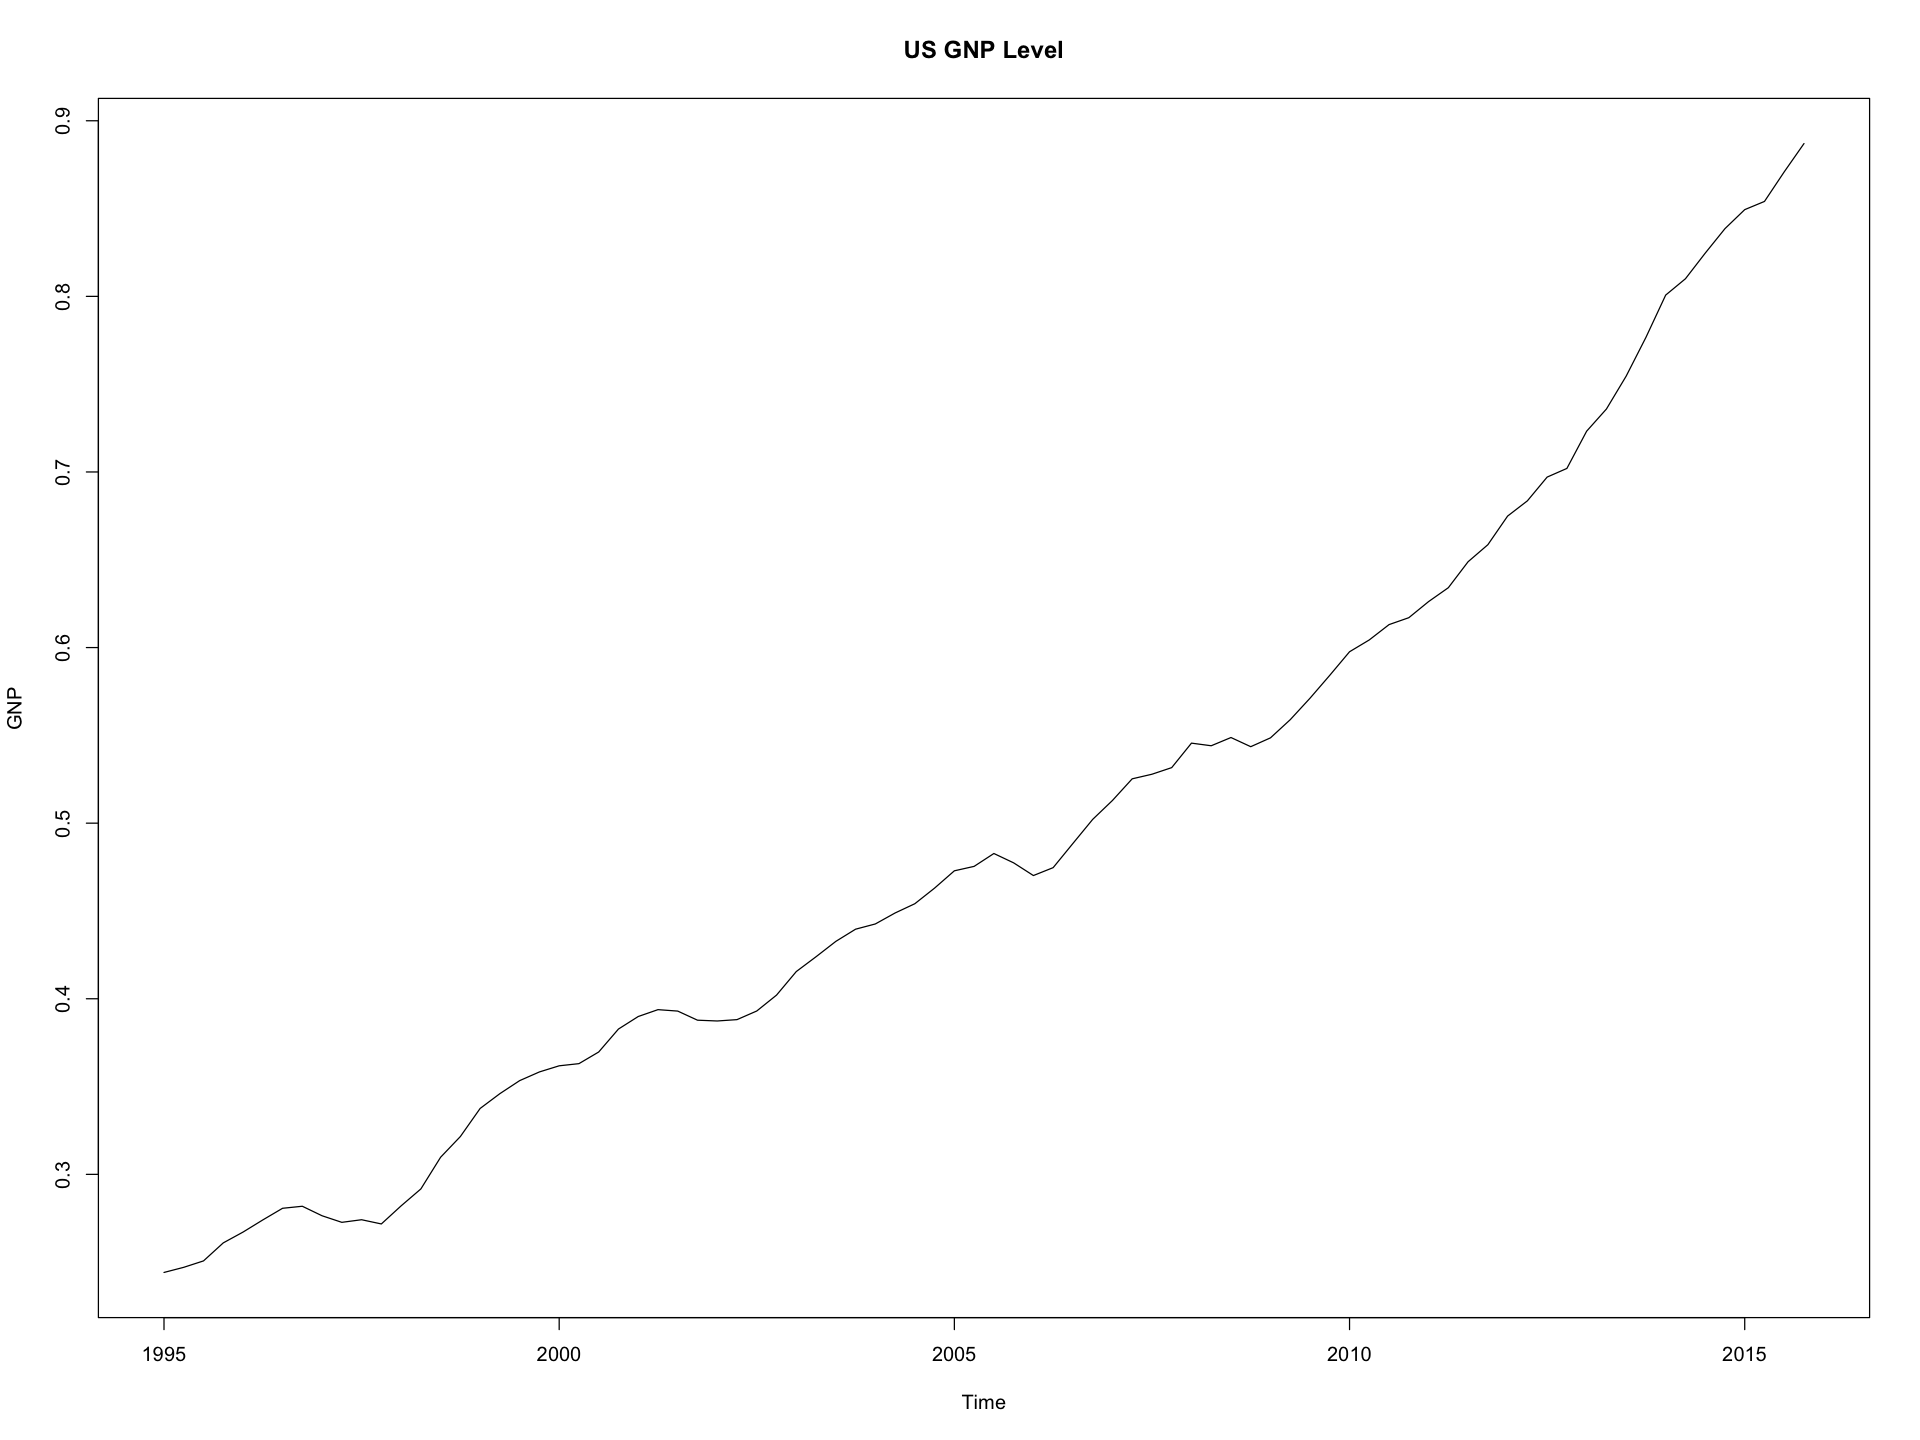

In [89]:
plot(GNP, type = "l", main = "US GNP Level")

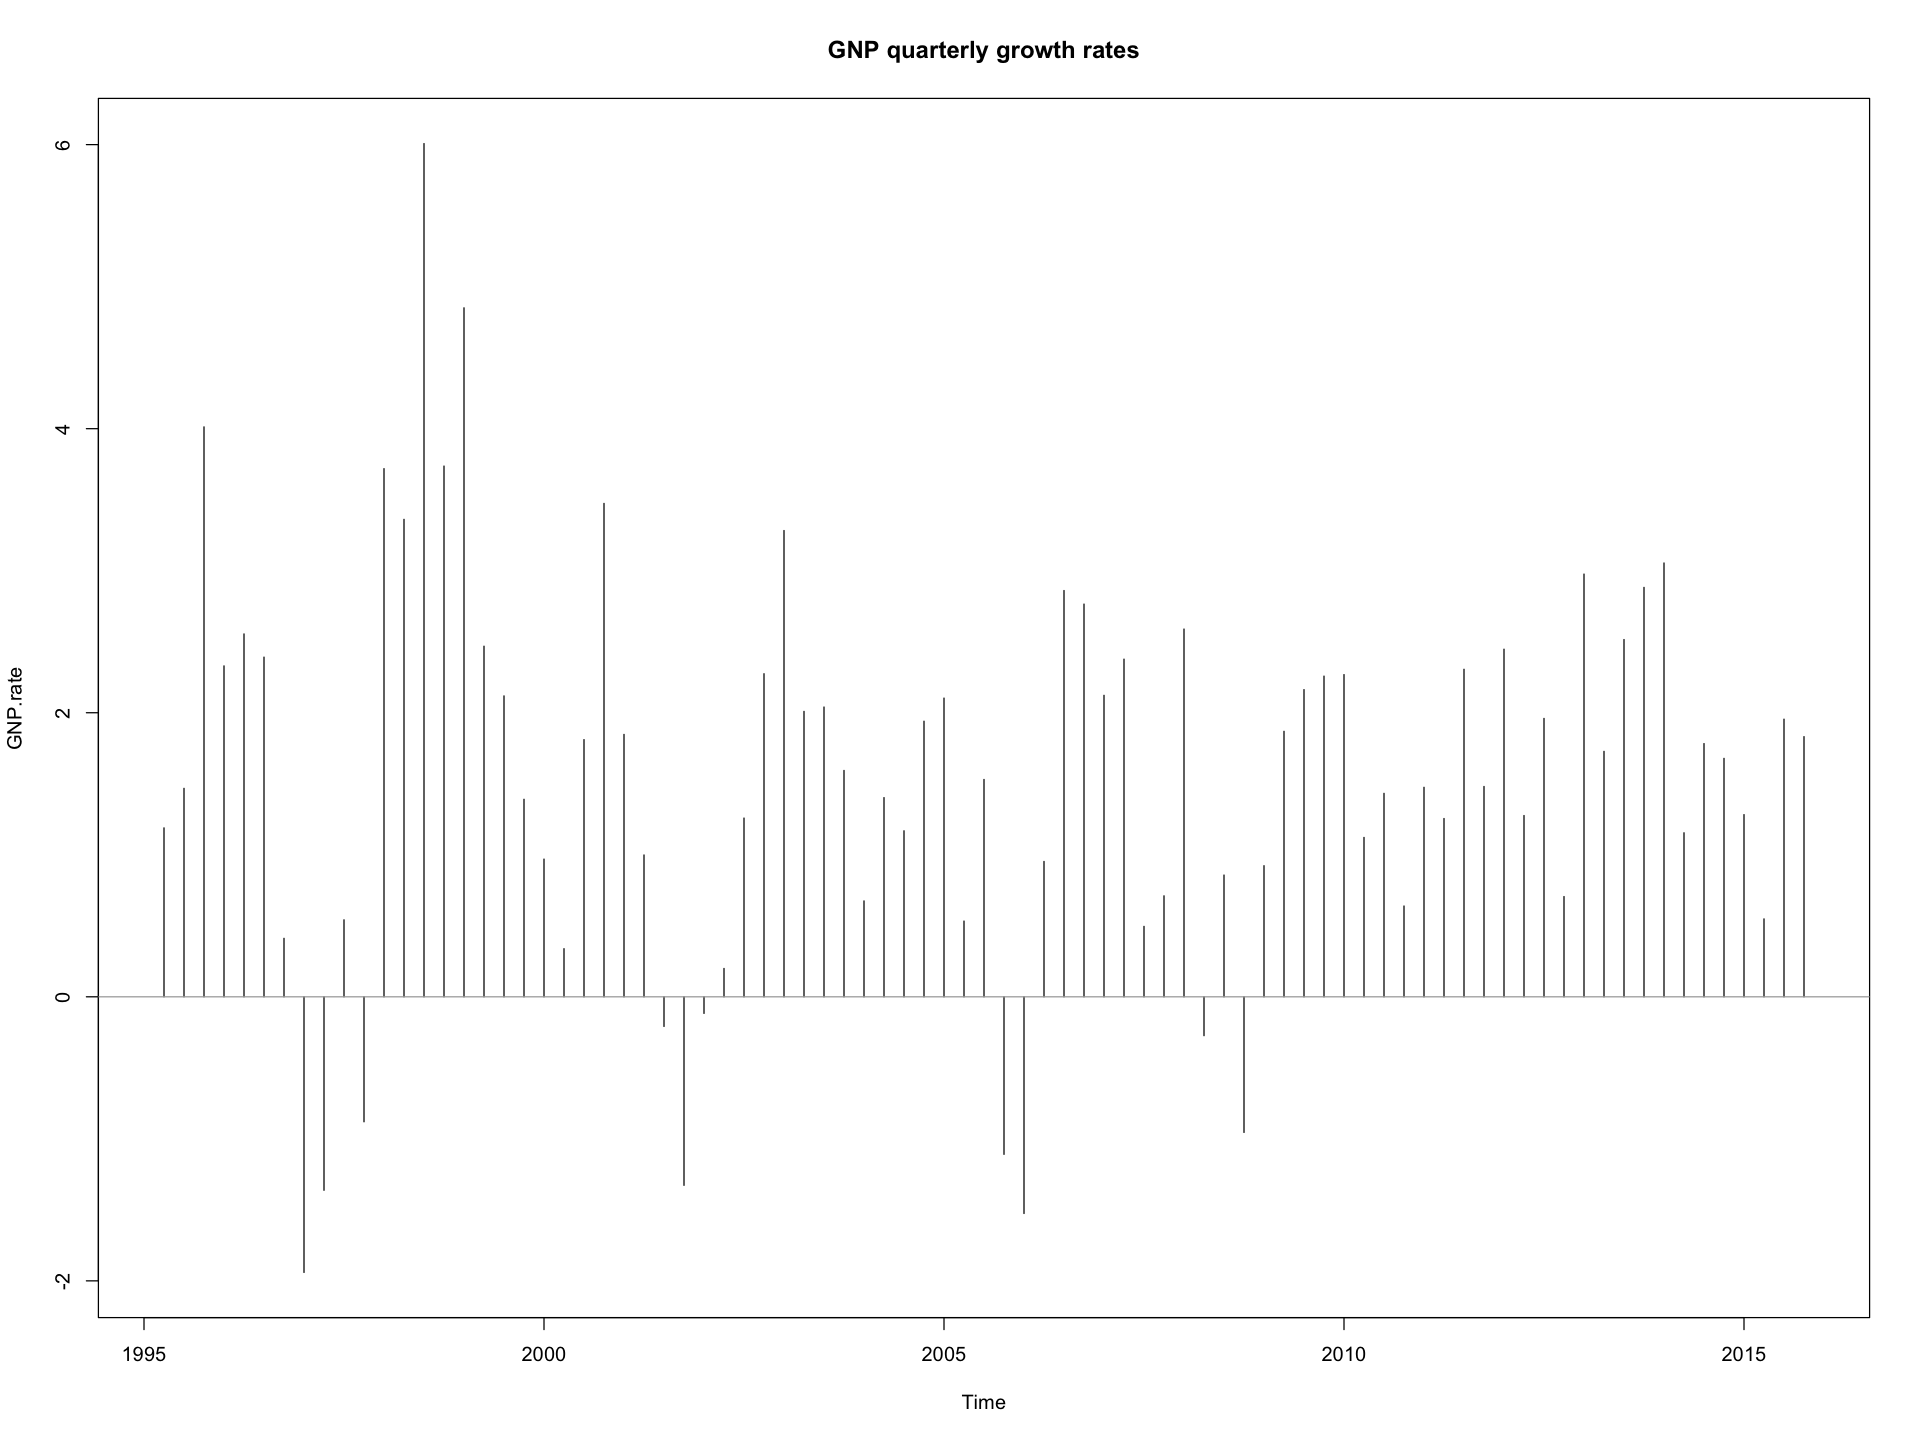

In [97]:
plot(GNP.rate, type = "h", main = "GNP quarterly growth rates")
abline(h = 0, col = "darkgray")

### What we call “nonstationary”

**1 The probability distribution (think hist()) would seem to change over time.**

2 This means that **the standard deviation and mean changes as well.** Cyclicality, or seasonal 

**3 Lots of trend in the level and simply dampened sinusoidal in the rate.**

And here we go. These are the rates and their absolute values. Mild persistence here. Little or no persistence and volatility. So we have a rough idea that GNP might move over time. We'll call that nonstationary-- different distributions over different points in time. But it isn't really severe, and it's really seemingly well-behaved relative to the stock markets, or Brent, for that matter.


## Forecasting GNP

As always let’s look at ACF and PACF:

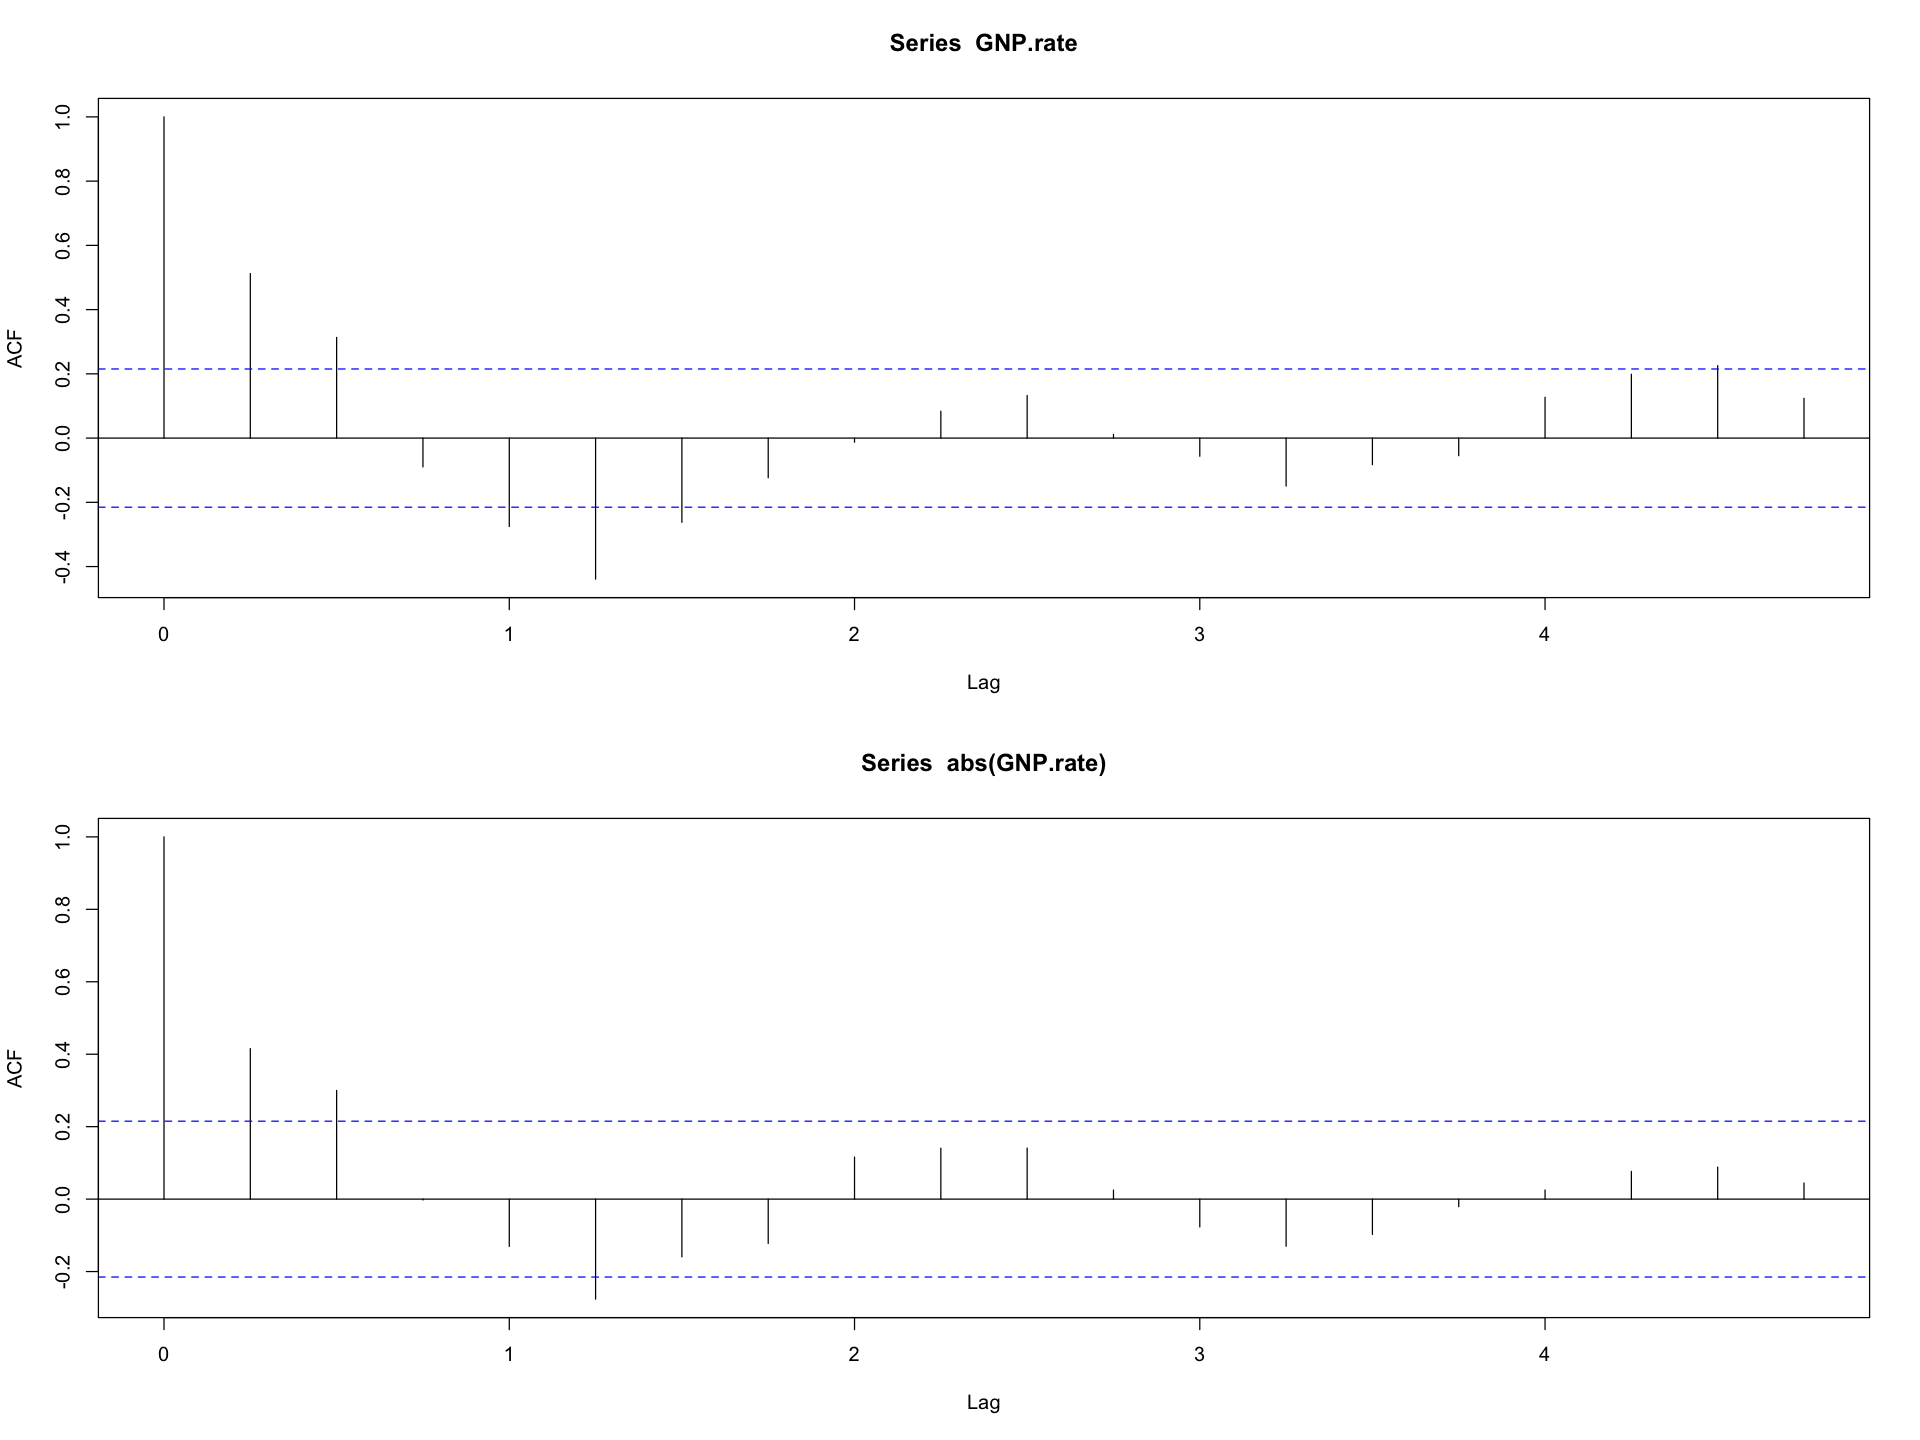

In [91]:
par(mfrow = c(2, 1)) #stacked up and down
acf(GNP.rate)
acf(abs(GNP.rate))

There are several significant ones in the last quarter, little relationship eight quarters back. That's two years. And that's roughly in the congressional election cycle. That's what that has been attributed to. So political changes seem to impact GNP. We find this a lot in a lot of countries, but in the US for sure.

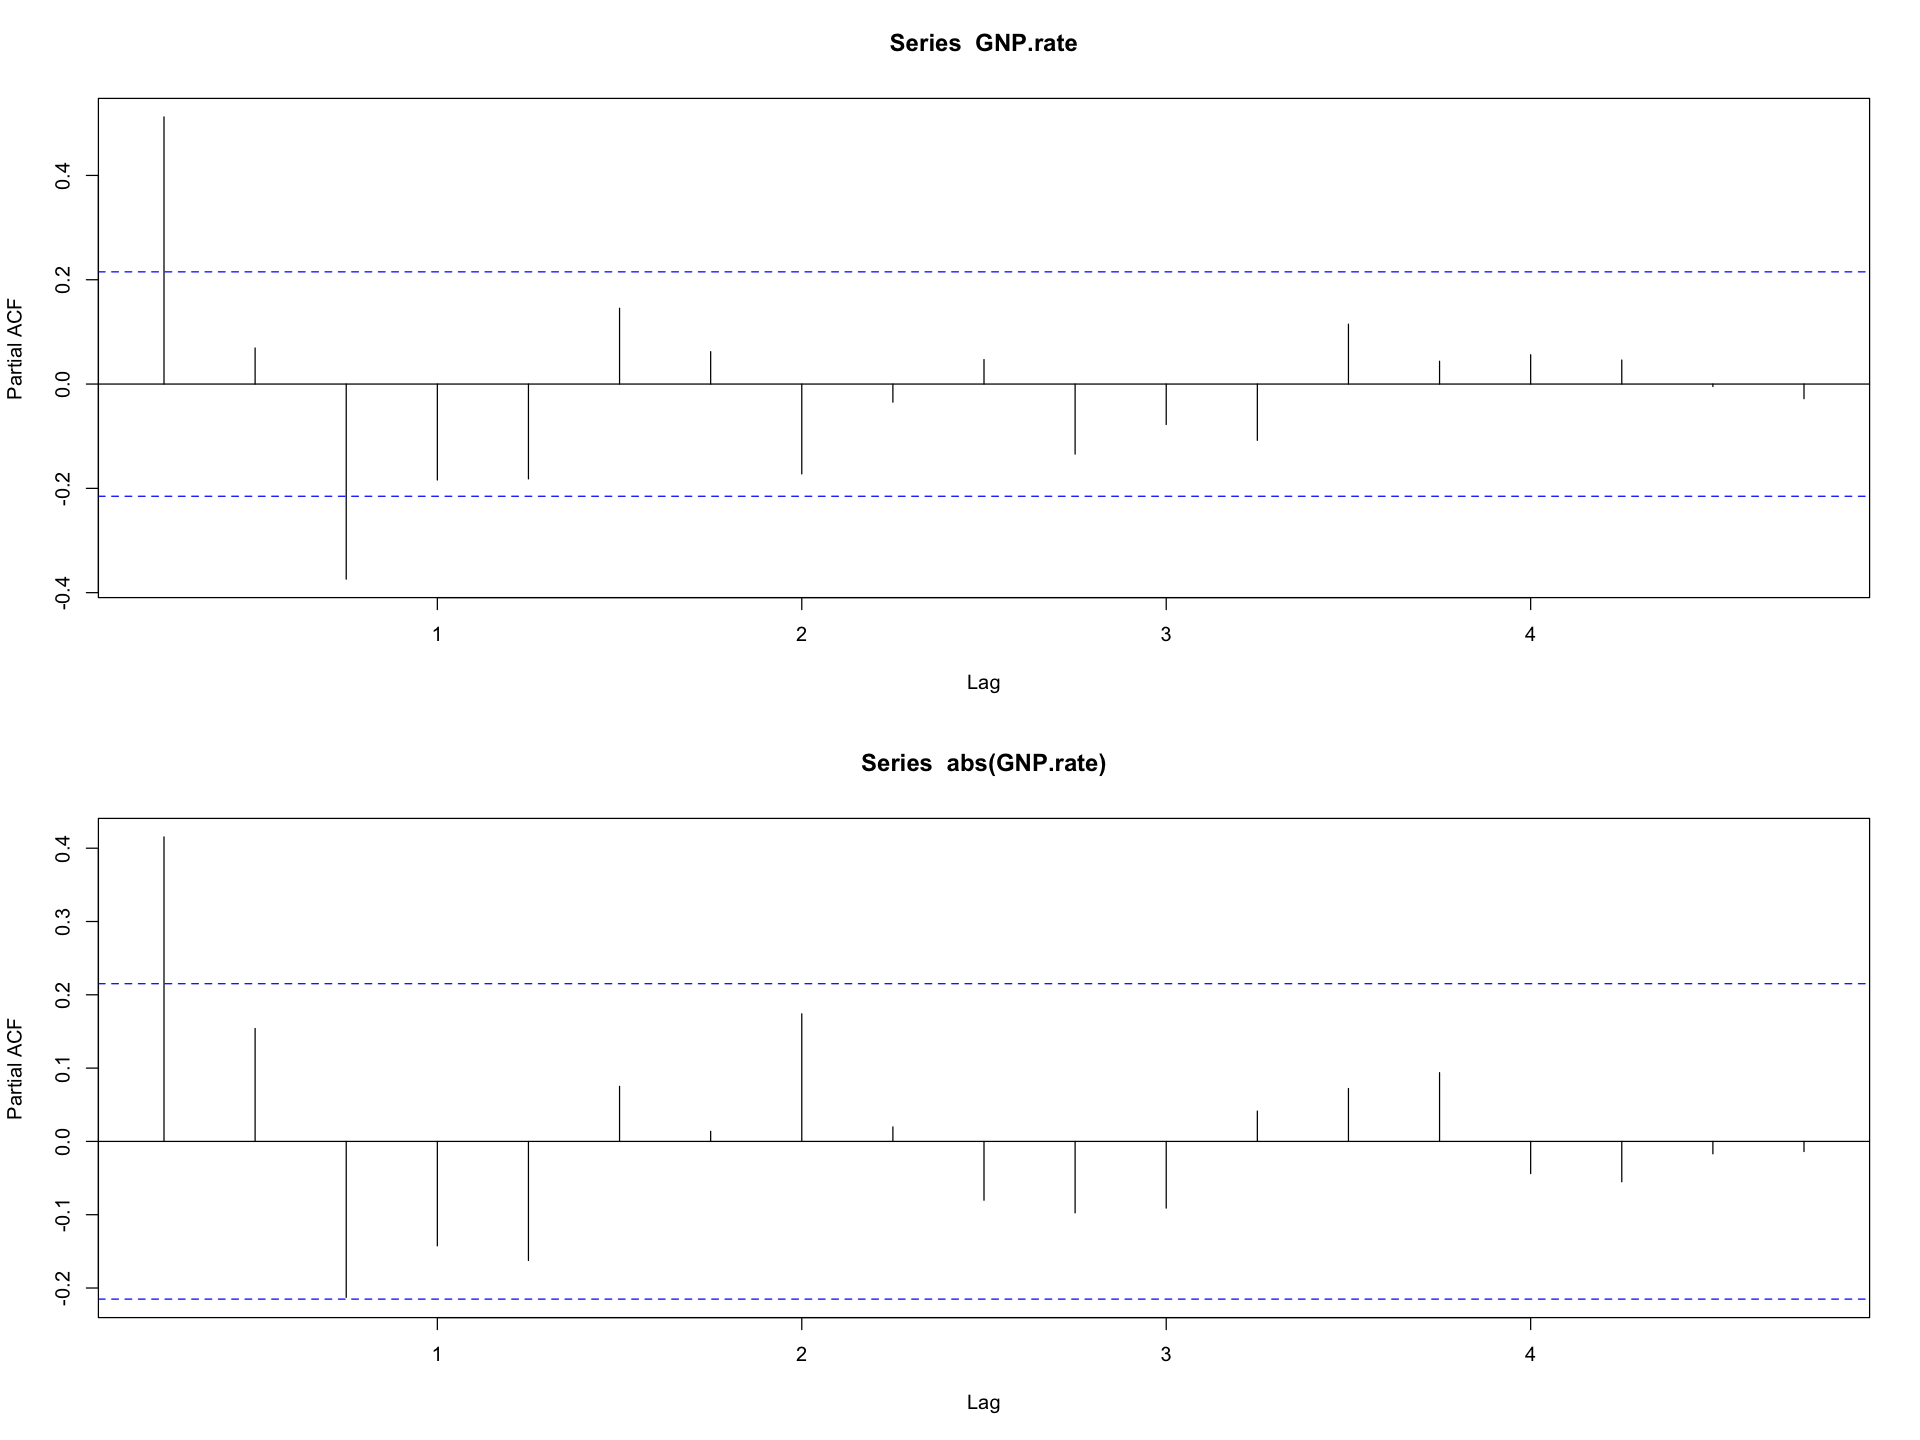

In [92]:
par(mfrow = c(2, 1))
pacf(GNP.rate)
pacf(abs(GNP.rate))
par(mfrow = c(1, 1)) #default setting

### What do you think?

**There are several significant autocorrelations within the last 4 quarters.**

**Partial autocorrelation also indicates some possible relationship 8 quarters
back.**

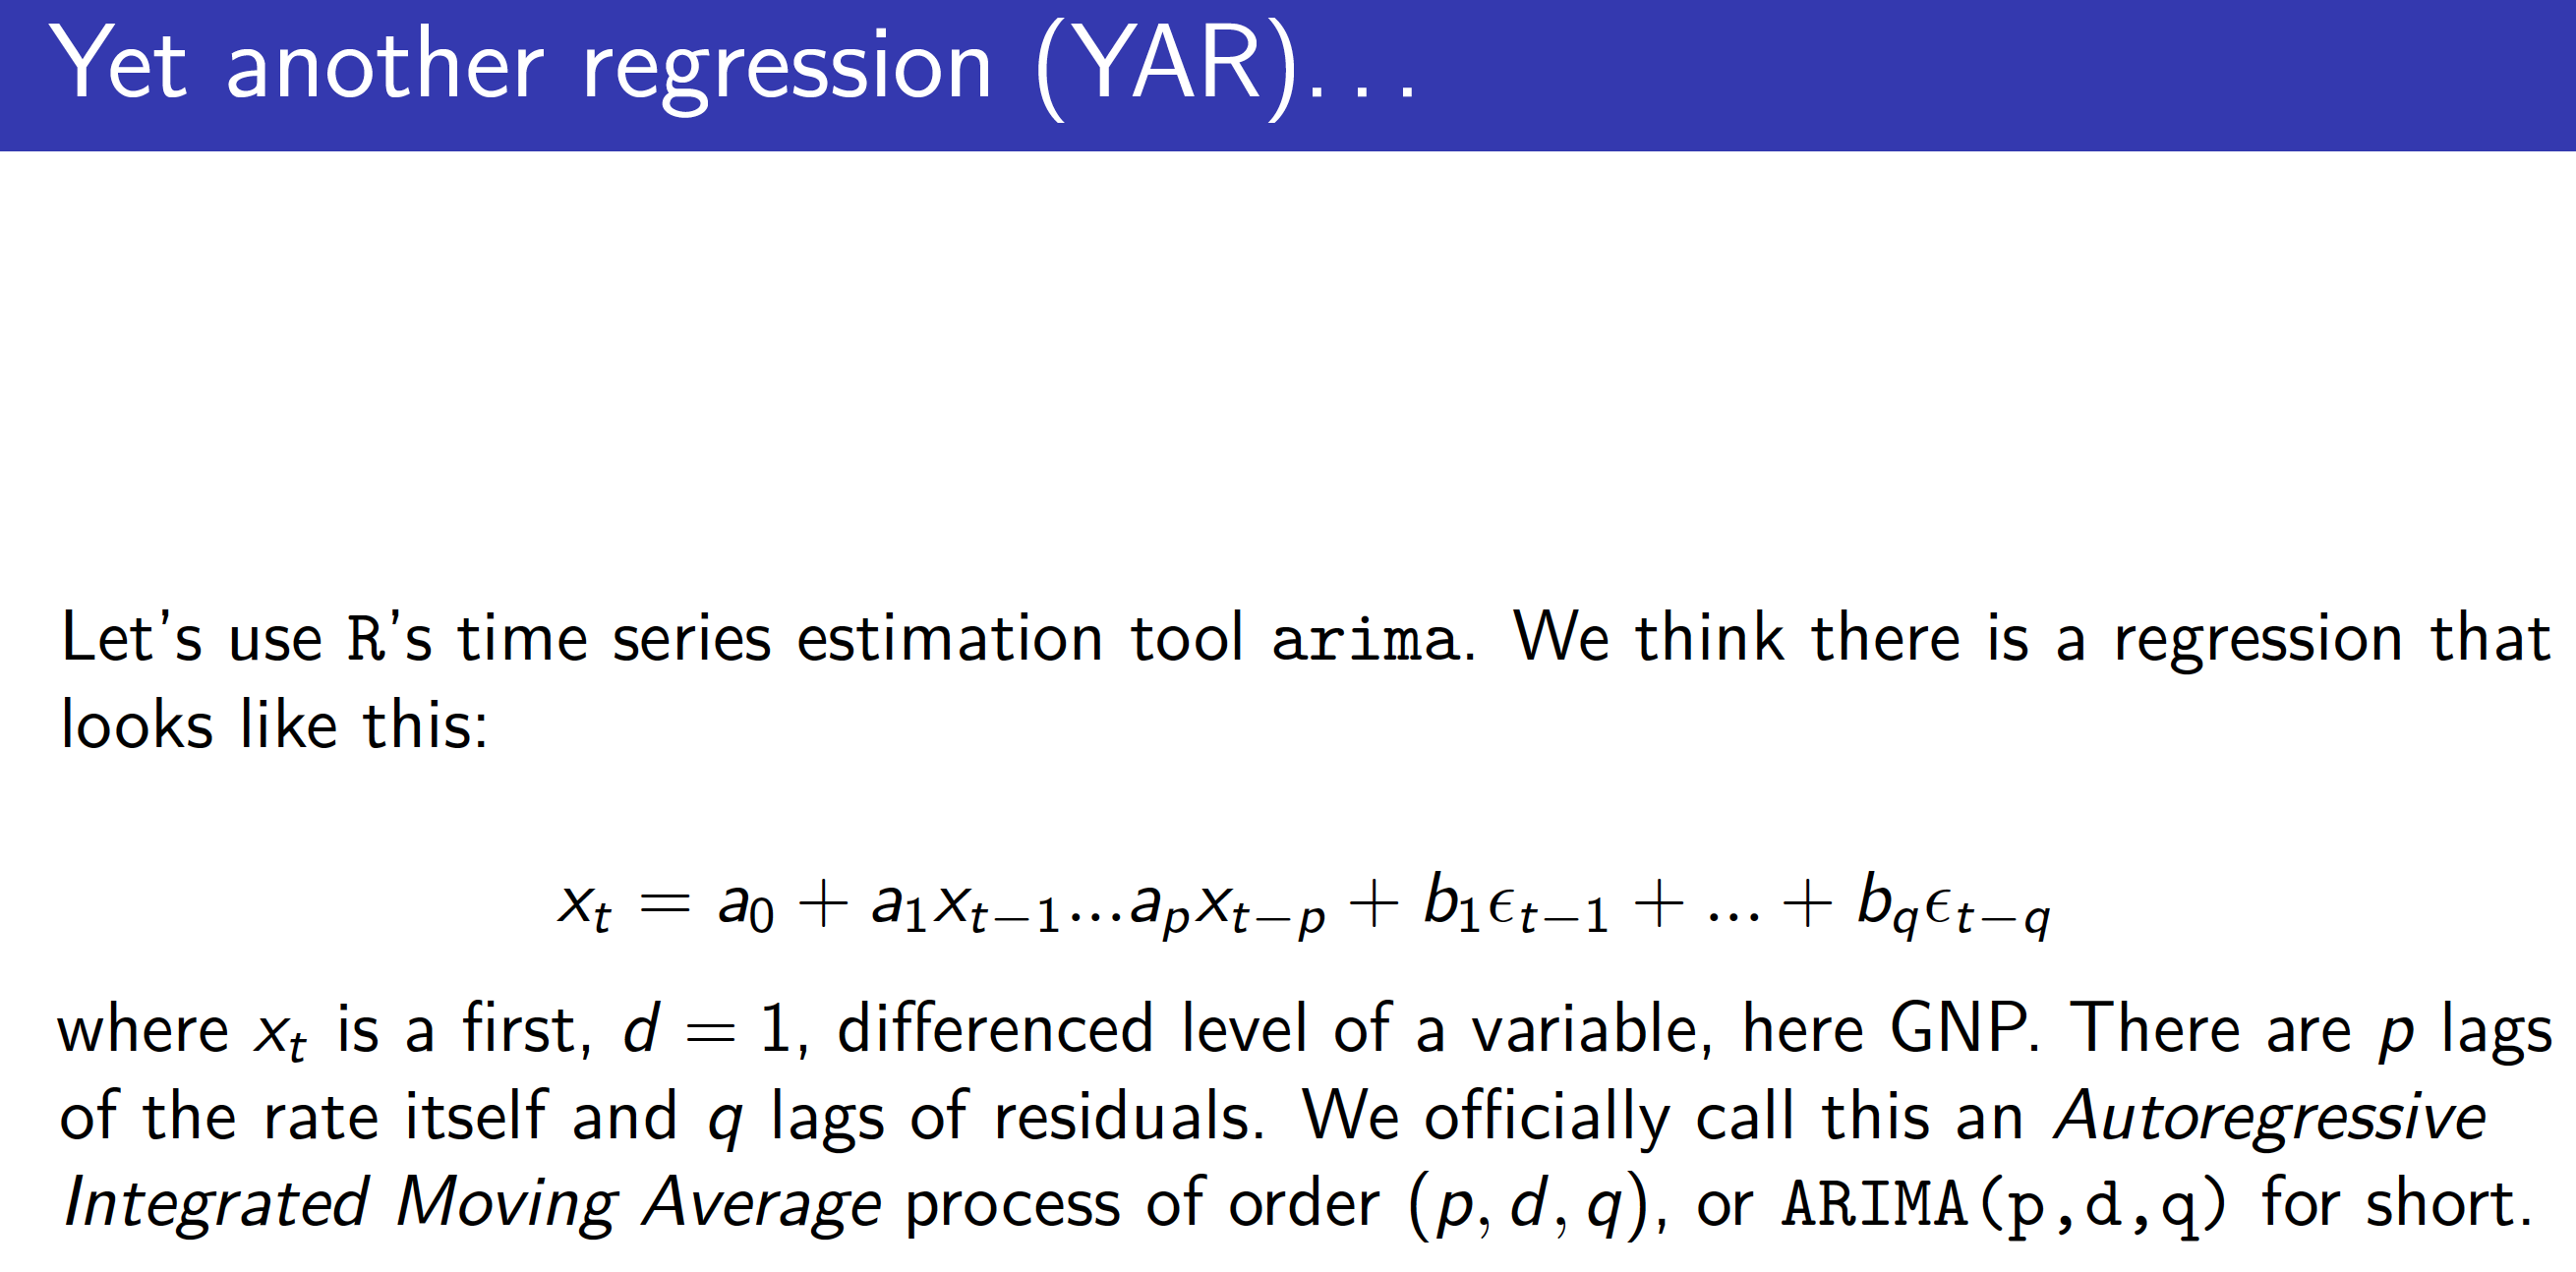

In [93]:
display_png(file = "Screen Shot 2020-01-24 at 8.03.10 PM.png")

## ARIMA -- Autoregressive Integrated Moving Average.

Well, we're going to run another regression-- YAR. Don't yawn, just YAR-- yet another regression. You'll find that most of stats' probability and anything that depends on it, like finance, will be regression based. We're relating one variable to several variables in an effort to try to predict what this one variable-- y, in this case-- might do. That's always what we're after.
In this case, we're using an estimation tool called ARIMA, which stands for autoregressive integrated moving average. And it has three major parameters-- p, d, q-- standing for the order of how many lags in a variable. So if x is GNP, xt minus 1 will be GNP a quarter ago. t minus 2 would be two quarters ago.
But also in the error term-- in the difference between predicting GNP with its lags is going to be an error term. We also find that the error term can have a structure, and error correction models-- machine learning does this a lot-- are very, very cognizant of the fact that prior error terms-- lagged errors-- might also have pattern. We're trying to put it all into the kitchen sink here.
Running the estimation is really simple, thank goodness. We have the GNP rate. We use a p equals 2q equals 0-- I'm sorry-- d equals 0. q equals one structure. d stands for difference. We've already differenced GNP by creating the diff log GNP numbers, the levels. So we've logged them to create a kind of a rate. We differenced the rates.
So already, it's difference. We don't need to do it again. Two lags of rates. One lag of residuals. And we're going to use a function called time series diagnosis to look at the results.

In [94]:
# Estimation is quick and easy.
## fit.rate <- arima(GNP.rate, order = c(2, 0, 1)) NOT WORKING

ERROR: Error in arima(GNP.rate, order = c(2, 0, 1)): non-stationary AR part from CSS


The order is 2 lags of rates, 0 further differencing (already differenced once), and 1 lag of residuals.
Let’s diagnose the results with tsdiag():

And what are the results? We just type in fit.rate, and we get this kind of information. We get the size of the last two quarters' worth of relationship. Standard error is pretty high for the last quarter. Two quarters ago-- eh, not so bad. Very importantly, the error term does have some correlation in it.
There is a intercept, which gives the average level of GNP as well. That's what the intercept can be interpreted as.
Well, we have a couple of things we can look at. One is the Akaike-- yes, Akaike-- information criteria, which measures how much information leakage happened because of this regression. But we need to compare it with another model, really, to get an idea of comparative information leakage.
So we're going to go look at another aspect of these results by taking out the moving average term and rerunning ARIMA and seeing if there's any big effect. And what we do notice when we do that is the Akaike criterion goes up, which means more leakage out of taking out the moving average term.
That's the term, the error term, one quarter ago. So we're going to probably leave it in there. It's going to be a good thing to do.
Our parameters also change tremendously. This was negative before-- and small and insignificant. We don't think it was any different than 0. ar2 was large, positive, very significant.
So buried inside of these parameters is some idea that the error term, or error correction, when people use GNP and generate GNP because of their economic activity-- that those things are somehow buried inside of this much more trivial model than we had before. But Akaike is larger in this new model, so we're probably going to say don't use it.
We can also look at GNP residuals. On fit.rate that we just computed, do a histogram of the residuals and run some lines through them. Let's look at this result. Pop this in. Look at the result. And here are the residuals that were also generated.
This cornsilk line gives kind of a density function through it. Residuals are pretty much centered at 0. High and low-- very symmetrical. Probably normally distributed-- GNP usually is. Normality-- no such thing. Normalcy-- even worse. It's just normally distributed.

In [98]:
# ARIMA 2
fit.rate.2 <- arima(GNP.rate, order = c(2,
0, 0))
fit.rate.2# result is slighly different than the async example


Call:
arima(x = GNP.rate, order = c(2, 0, 0))

Coefficients:
         ar1     ar2  intercept
      0.4717  0.0679     1.5537
s.e.  0.1086  0.1083     0.2779

sigma^2 estimated as 1.402:  log likelihood = -131.94,  aic = 271.88

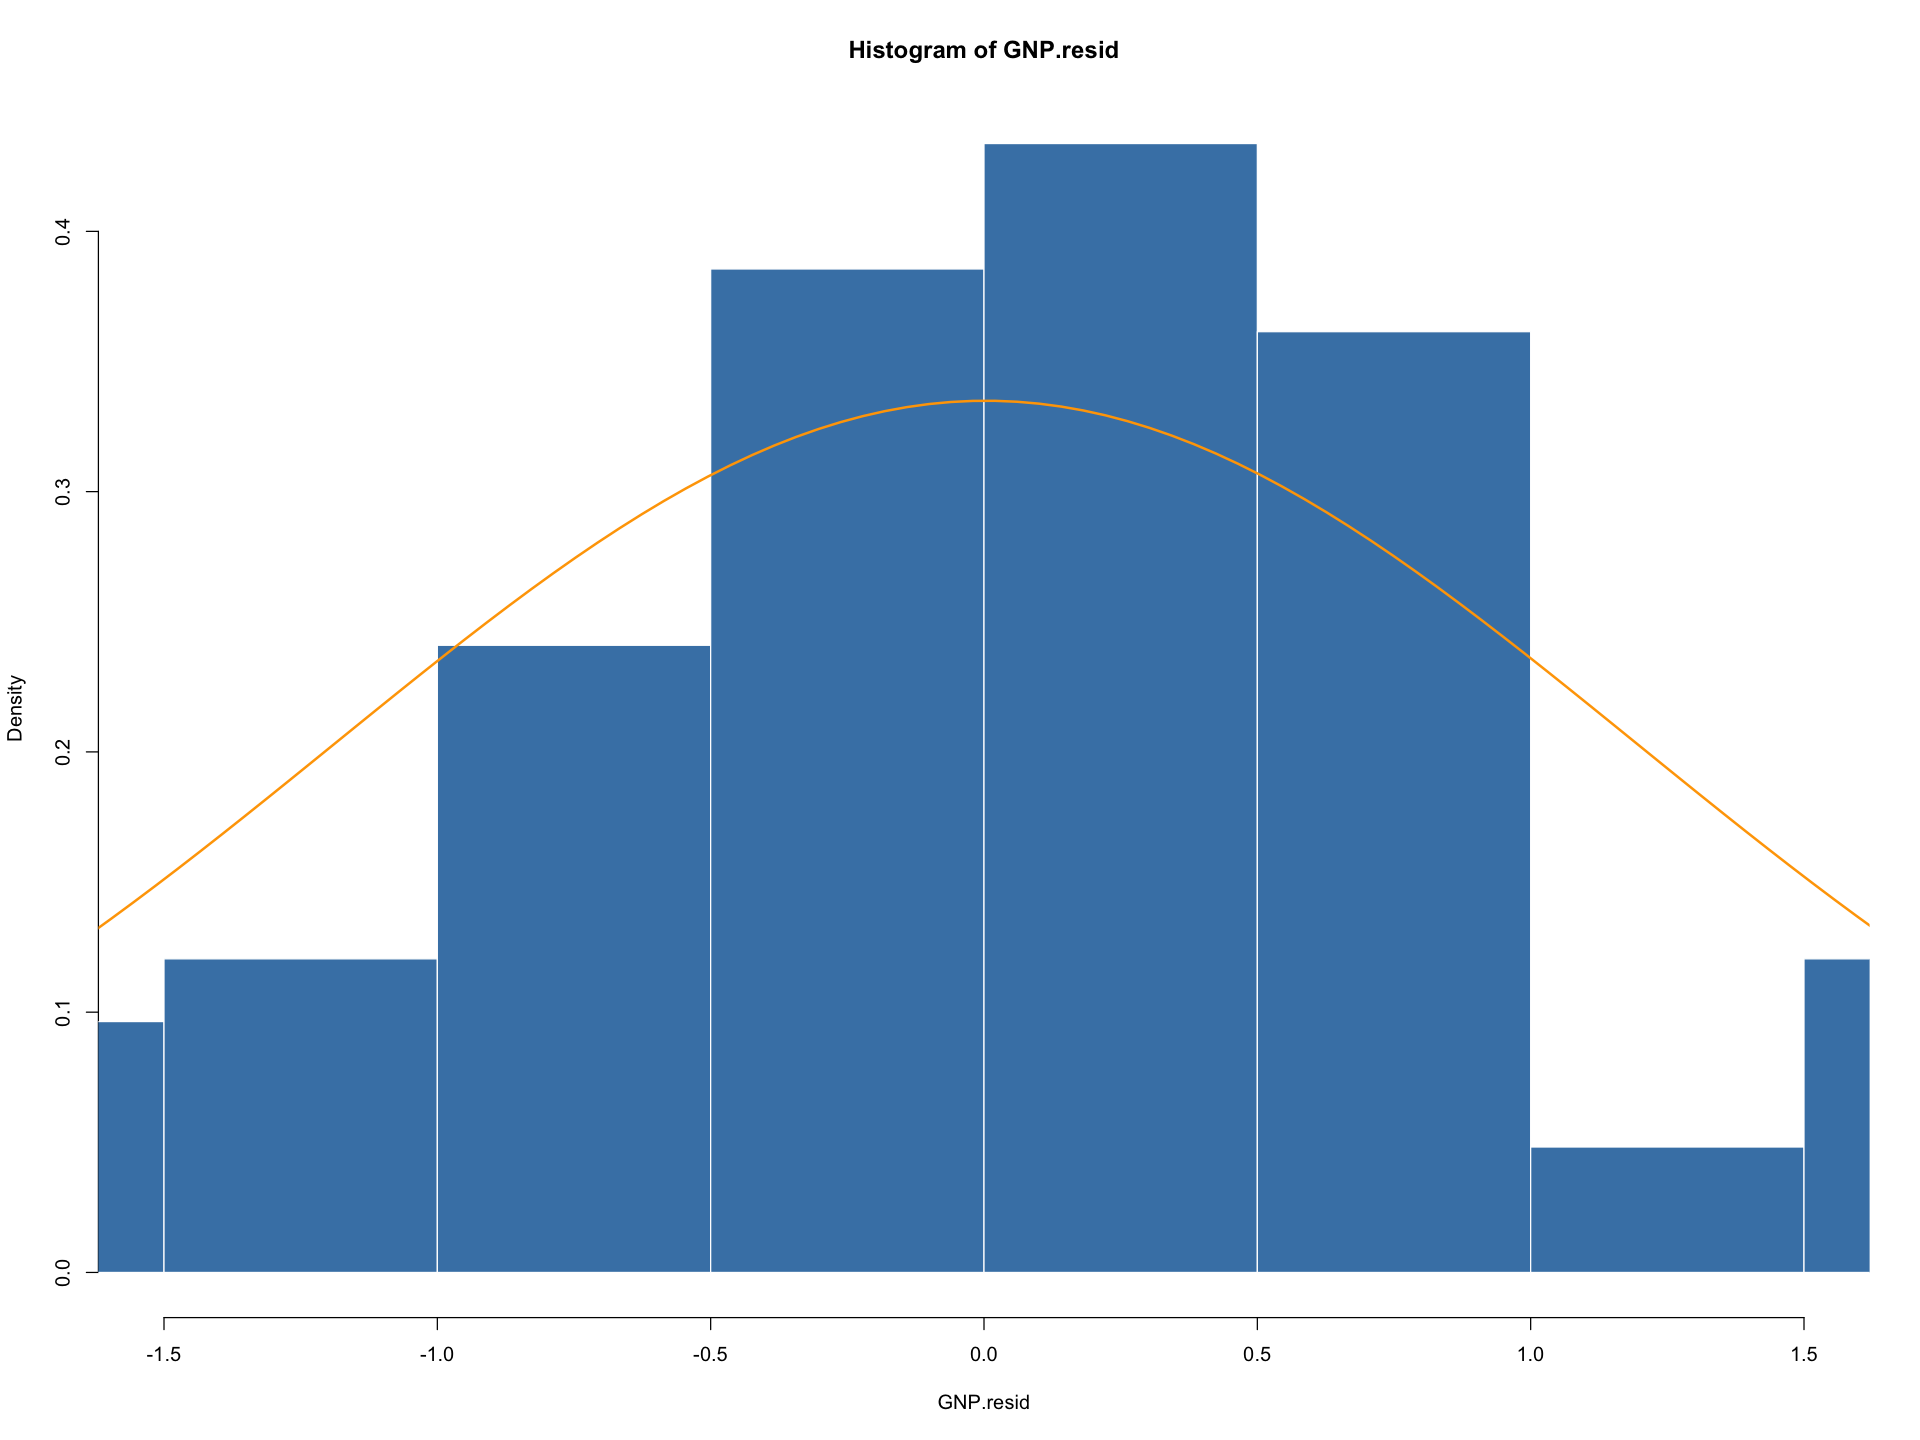

In [100]:
GNP.resid <- resid(fit.rate.2)# fit.rate.2 instead of fit.rate
hist(GNP.resid, probability = TRUE, breaks = "FD",
xlim = c(-1.5, 1.5), col = "steelblue",
border = "white")
x = seq(-2, 2, length = 100)
lines(x, dnorm(x, mean = mean(GNP.resid),
sd = sd(GNP.resid)), col = "orange",
lwd = 2)


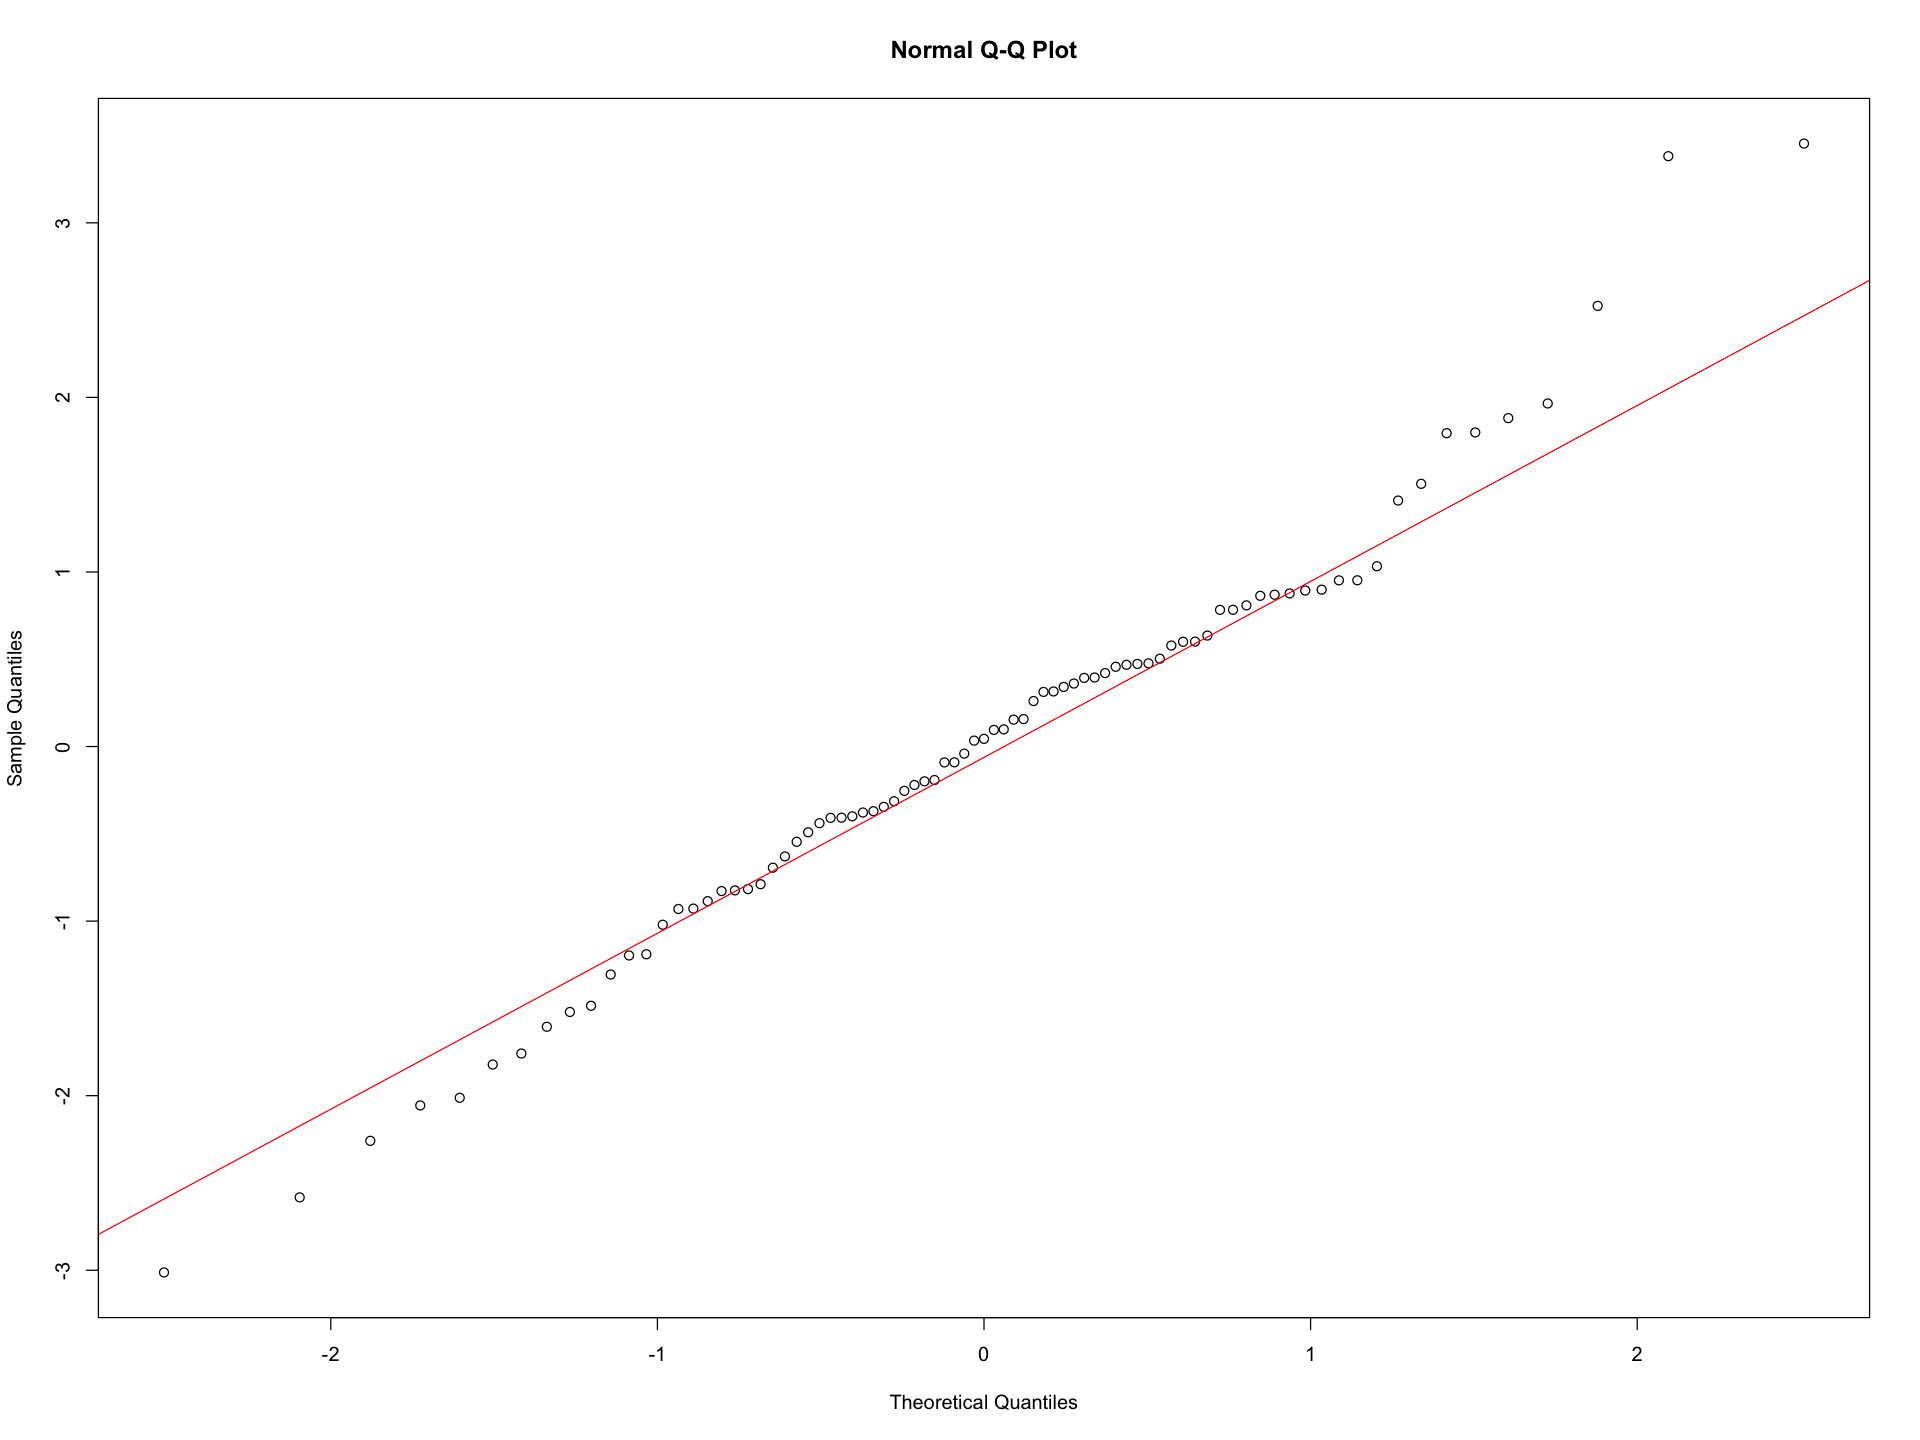

In [101]:
qqnorm(GNP.resid)
qqline(GNP.resid, col="red")

But this plot does scare me. So the line going from here all the way up is the theoretical line for the normal distribution. What we're actually seeing is a lot of deviation from that line in the tails of our error terms. These are pretty thick tails. Deviations at either end, thick tails, more shape than the normal distribution allows-- so not so normal.
Don't just look at the histogram. Look at the q-q plot to get an idea of just how non-normal things are. If it were normal, we would see something like this. All of the observations of error terms would be attracted to the normal line.
Third big tryout. Let's diagnose the GNP residuals, now, using the autocorrelation function and the moments package to produce skewness and kurtosis. We think there are thick tails. Let's measure it.

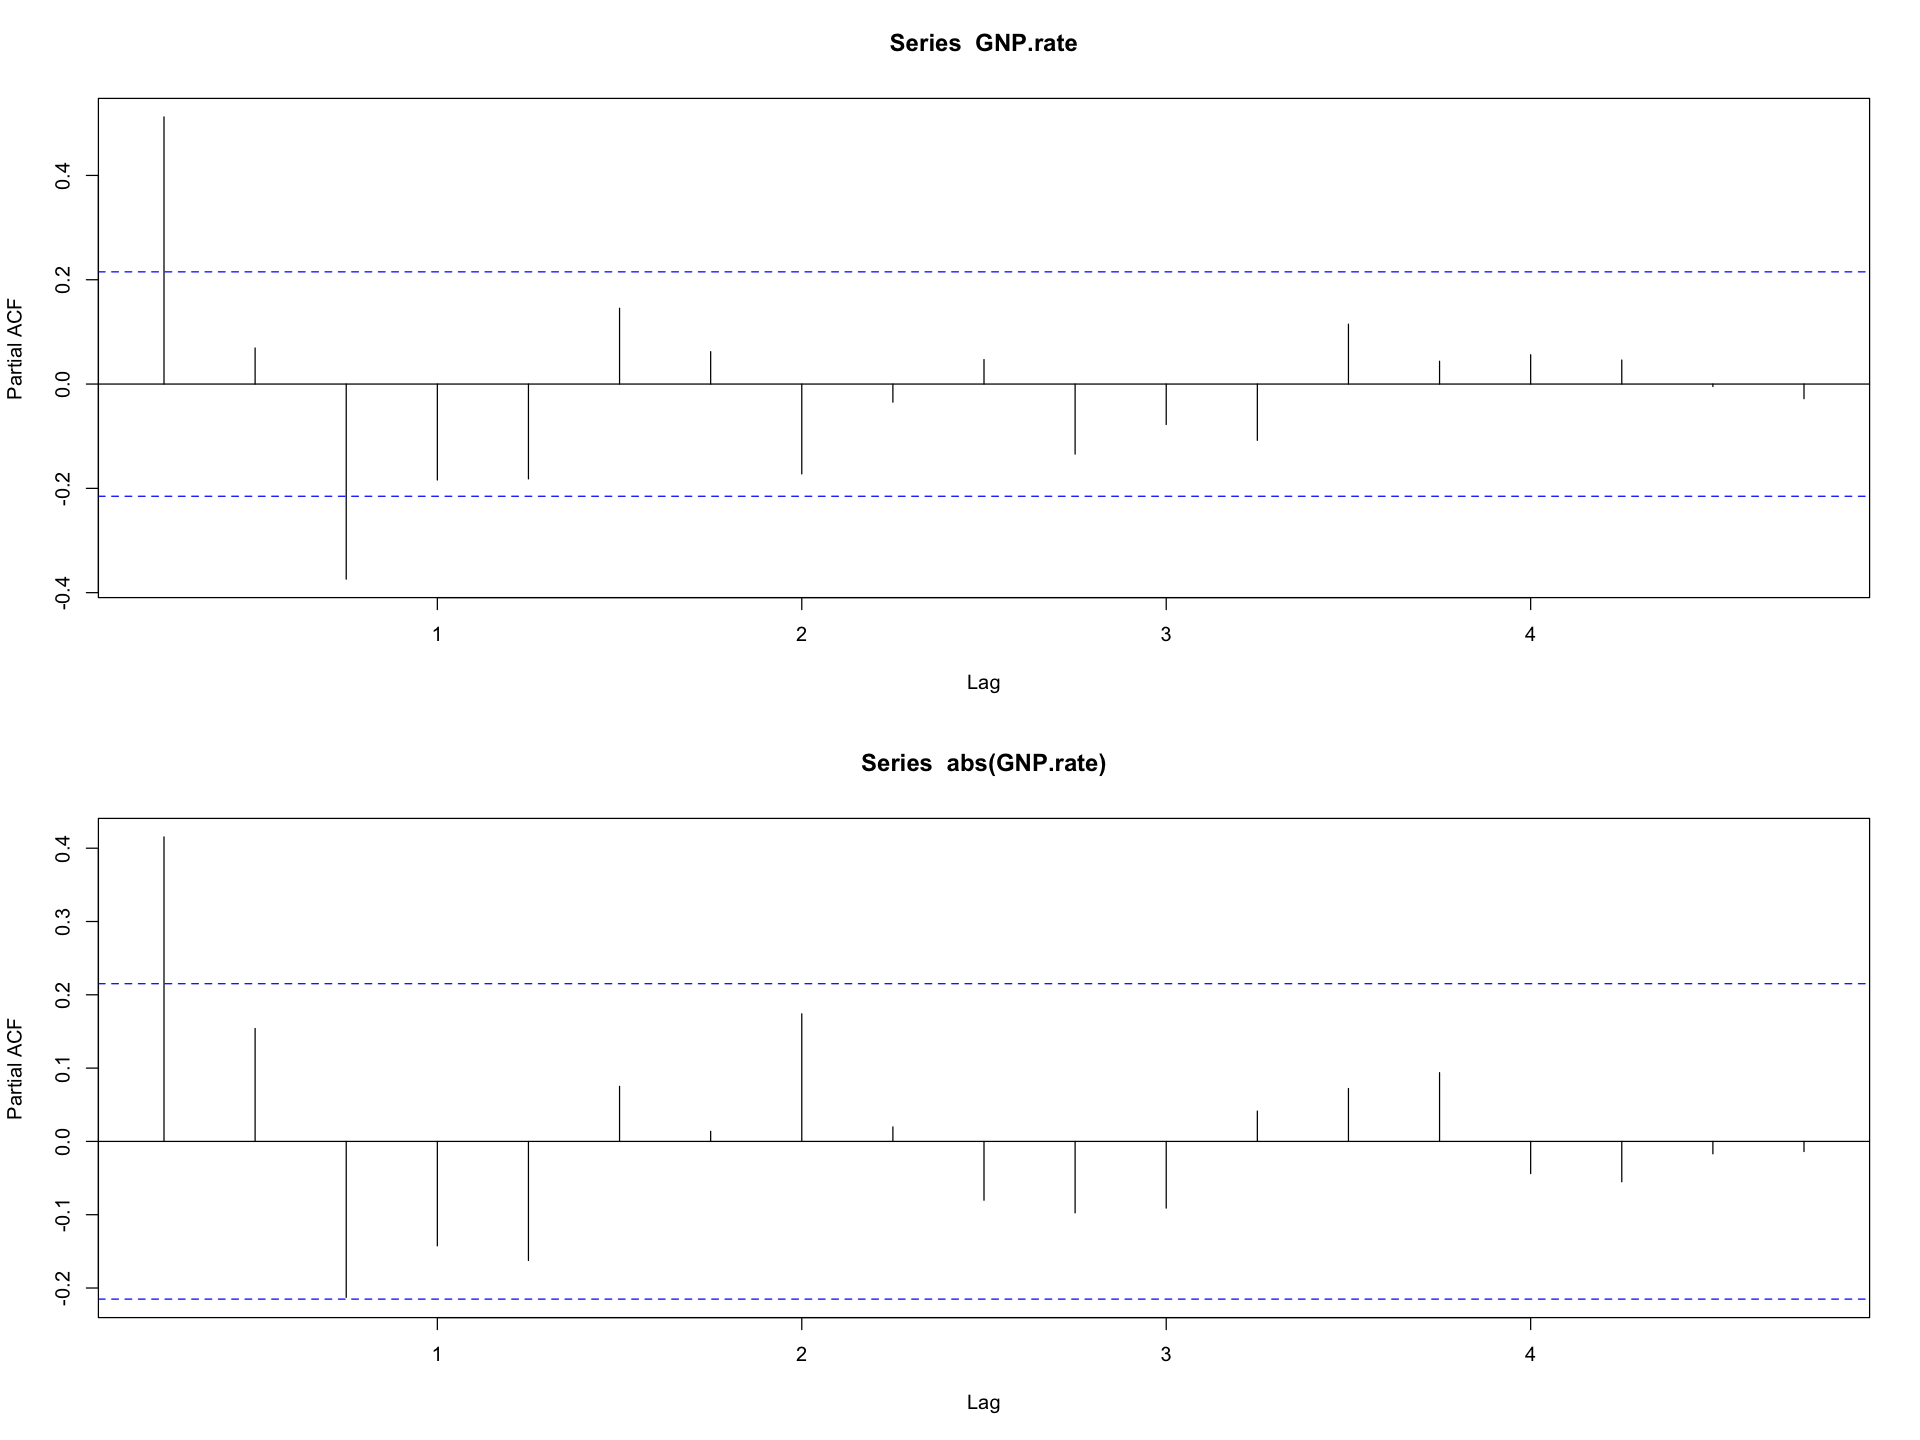

In [102]:
# Try this
par(mfrow = c(2, 1))
pacf(GNP.rate)
pacf(abs(GNP.rate))
par(mfrow = c(1, 1)) #default setting

### Very thick tailed and serially correlated as evidenced by the usual statistical suspects. But no volatility clustering.


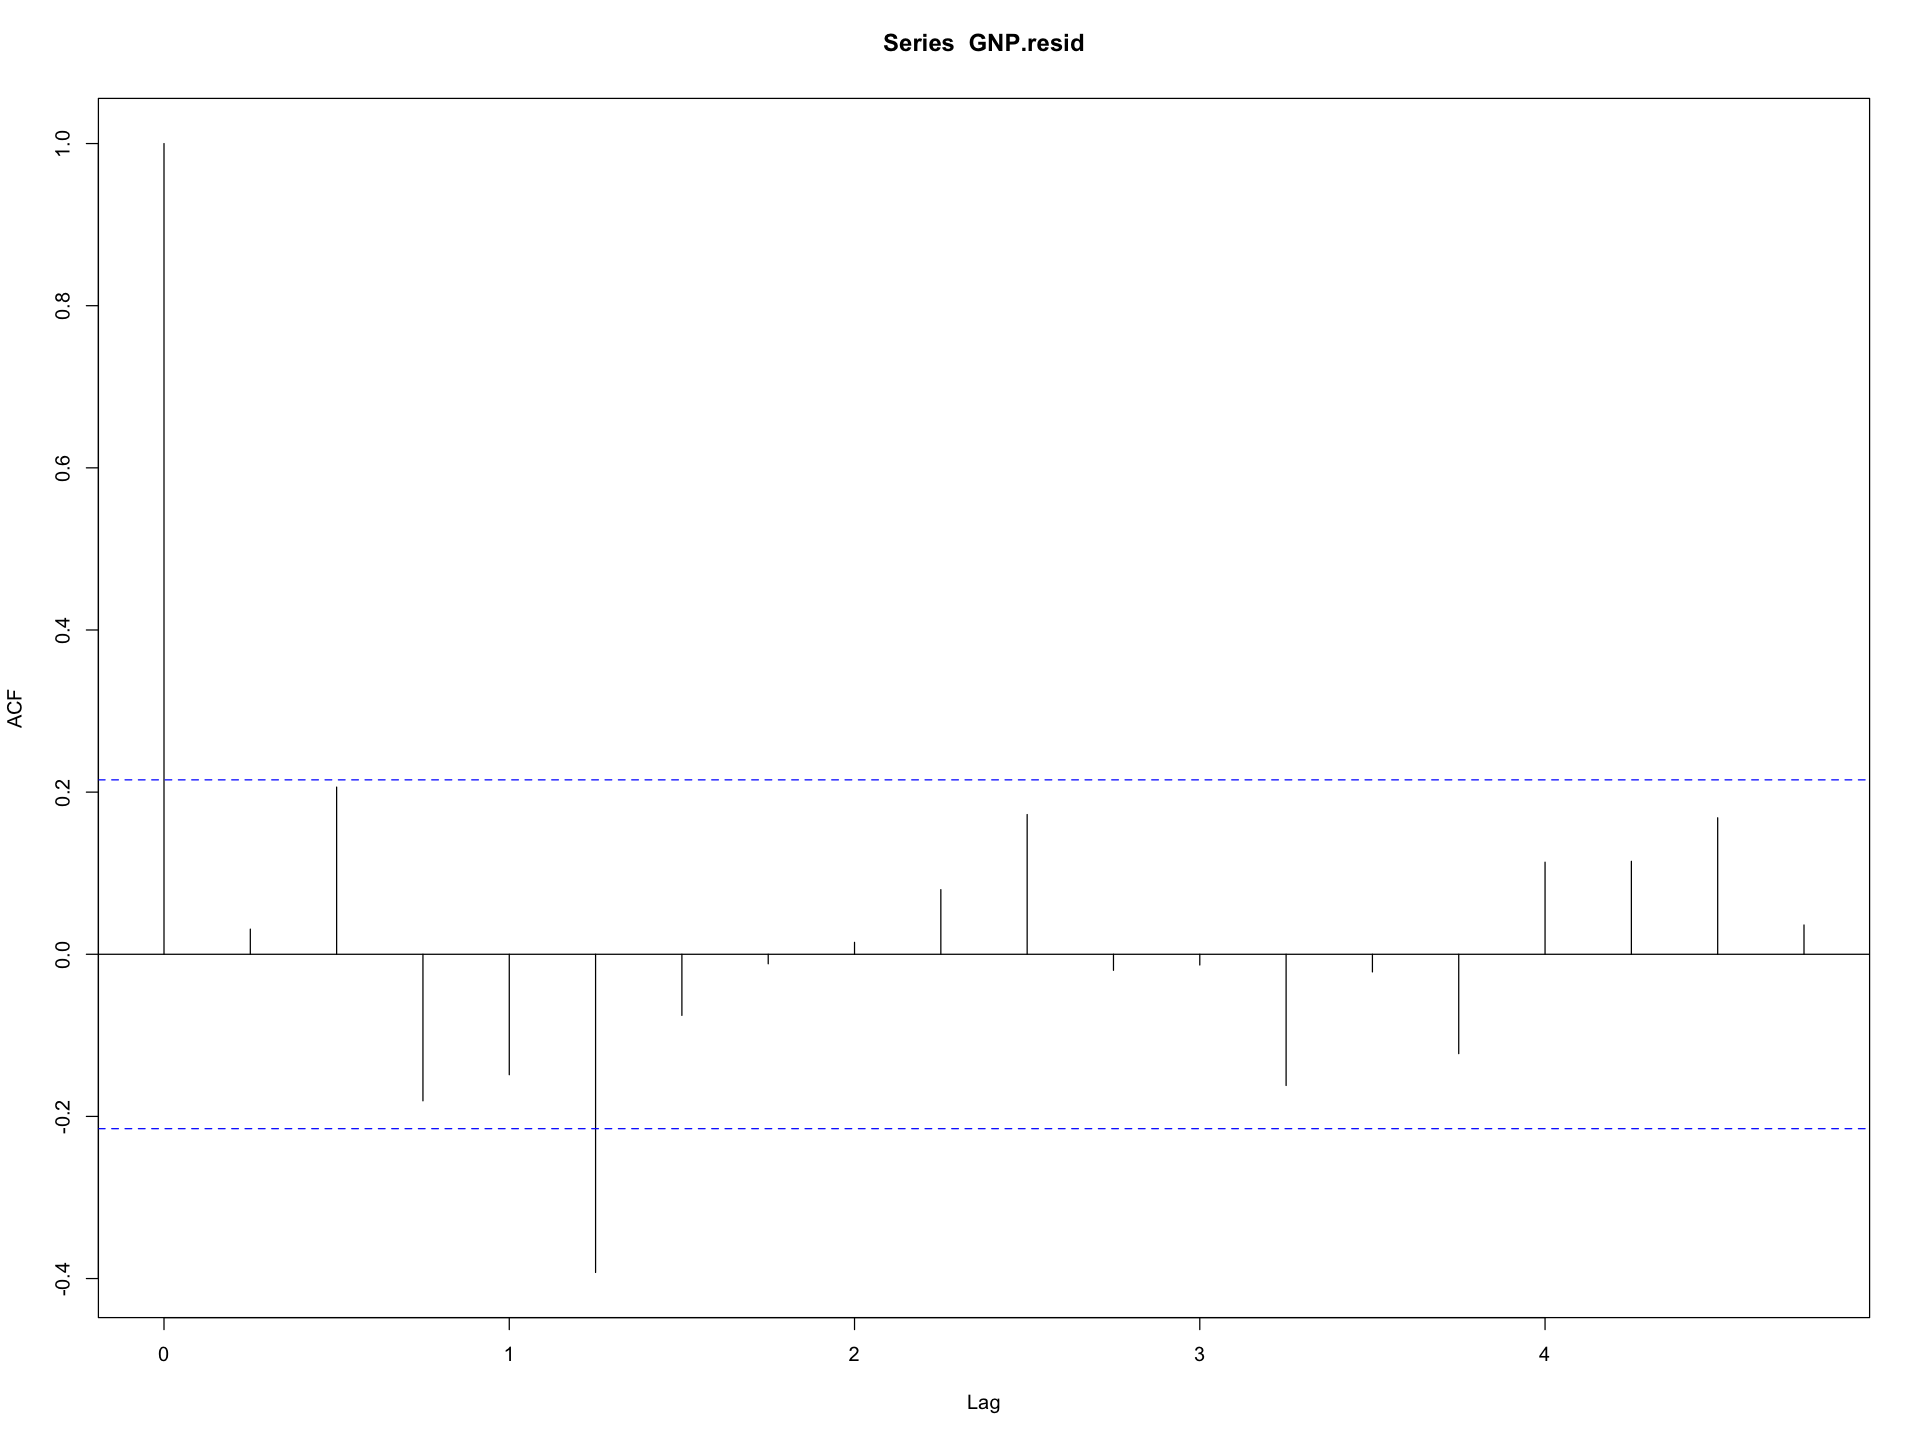

In [103]:
acf(GNP.resid)

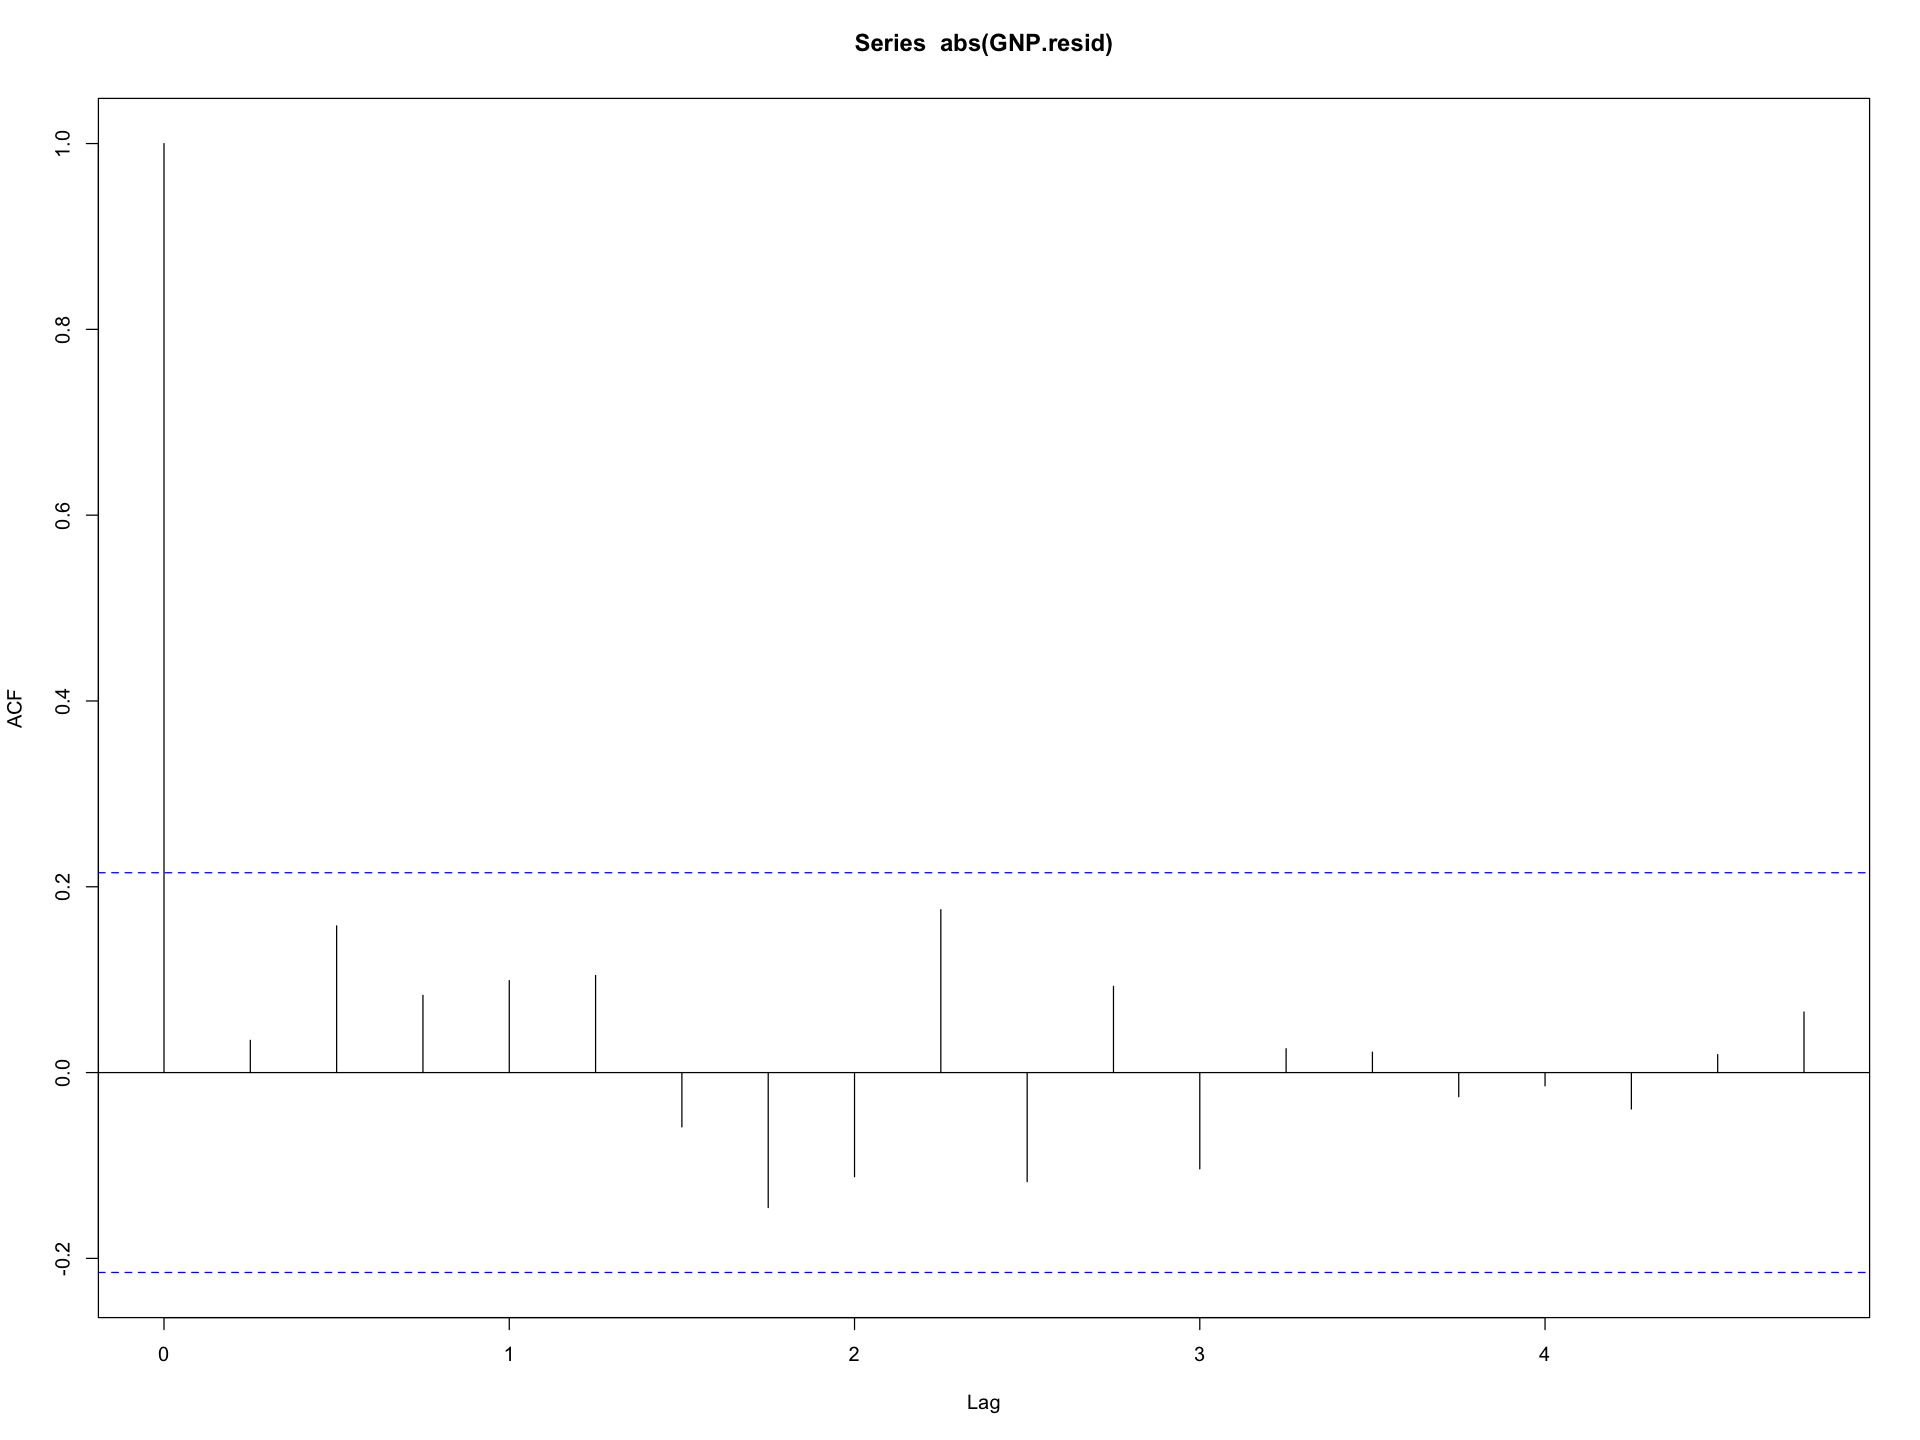

In [104]:
# Nice absolute values (i.e., GNP growth sizes):
acf(abs(GNP.resid))

In [ ]:
require(moments)

In [106]:
skewness(GNP.resid)
kurtosis(GNP.resid)

[1] 0.2074415

[1] 3.77611

### Positively skewed and thick tailed.

## forecast?

In [108]:
(GNP.pred <- predict(fit.rate.2, n.ahead = 8))

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

$pred
         Qtr1     Qtr2     Qtr3     Qtr4
2016 1.712127 1.647311 1.608611 1.585956
2017 1.572643 1.564826 1.560235 1.557538

$se
         Qtr1     Qtr2     Qtr3     Qtr4
2016 1.183950 1.309065 1.353460 1.368169
2017 1.373223 1.374961 1.375560 1.375767

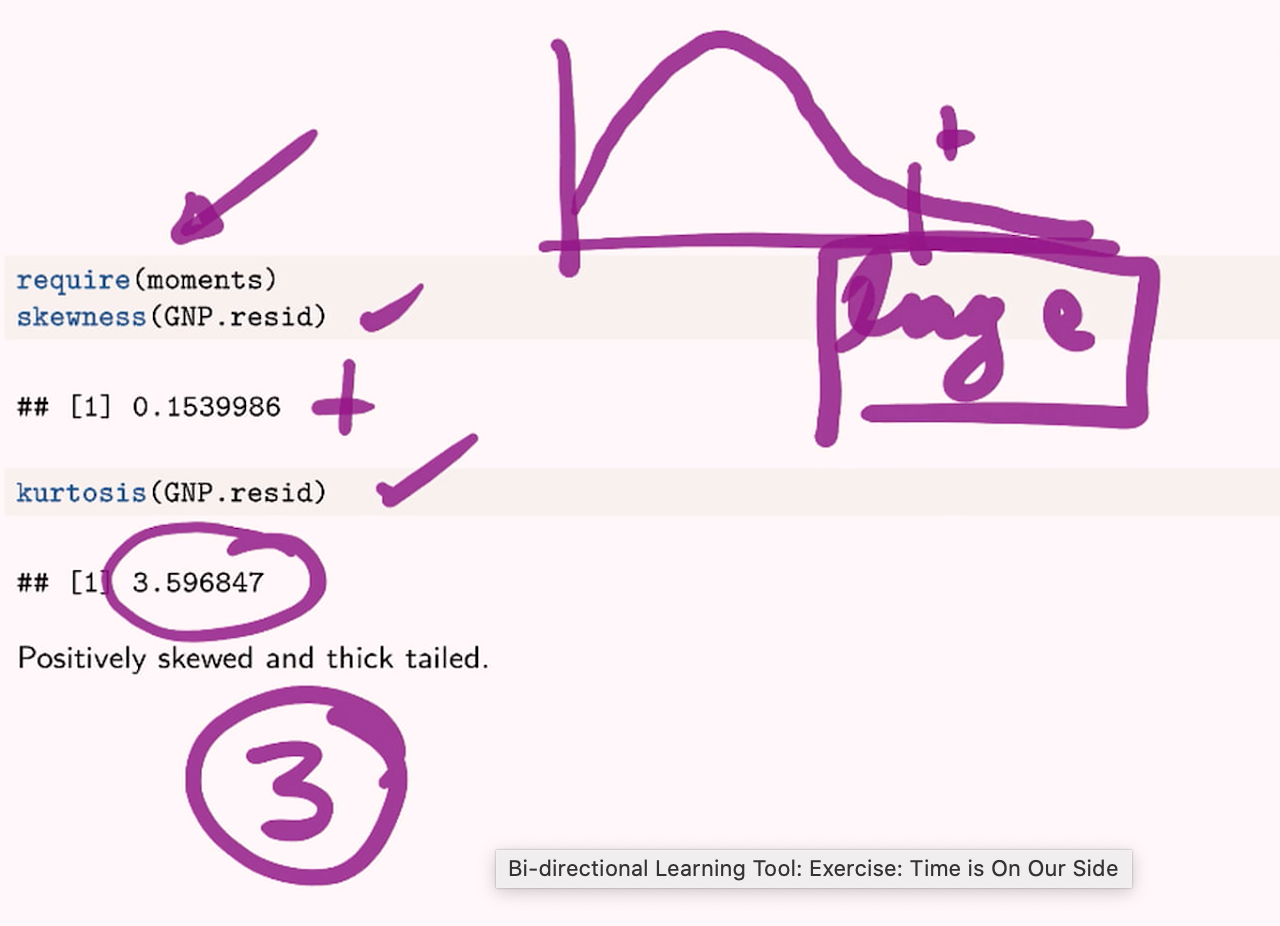

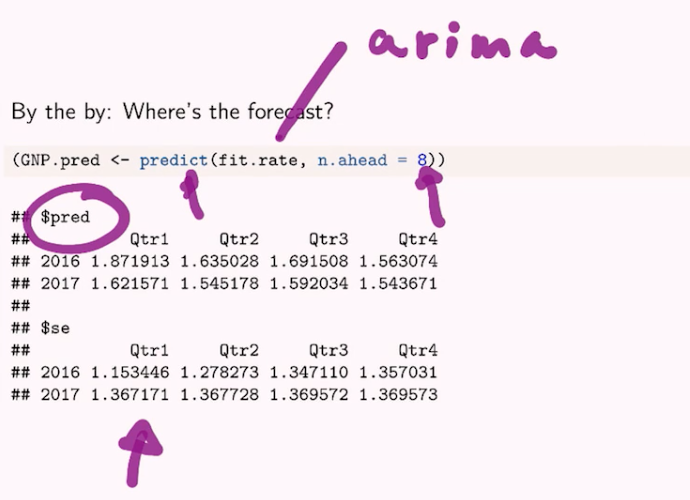

In [112]:
display_png(file = "Screen Shot 2020-01-24 at 11.23.50 PM.png")# from the async video
display_png(file = "Screen Shot 2020-01-24 at 11.25.06 PM.png")


## 3.6 Exercise: Give It the **bootstrapping**

### Goal: An example of simulation-based inference.
The context is just how dependent is today’s stock return on yesterday’s?

We want to use the distribution of real-world returns data, without needing
assumptions about normality.

The null hypothesis is lack of dependence (i.e., an efficient market).

So repeatedly, the data is changed using the replicate function, and the
sample ACF is computed.

This gives us the distribution of the ACF under the null hypotheses,

**H0: independence while using the empirical distribution of the returns data.**

Let’s use the Repsol returns. Pull the 1st autocorrelation from the sample:

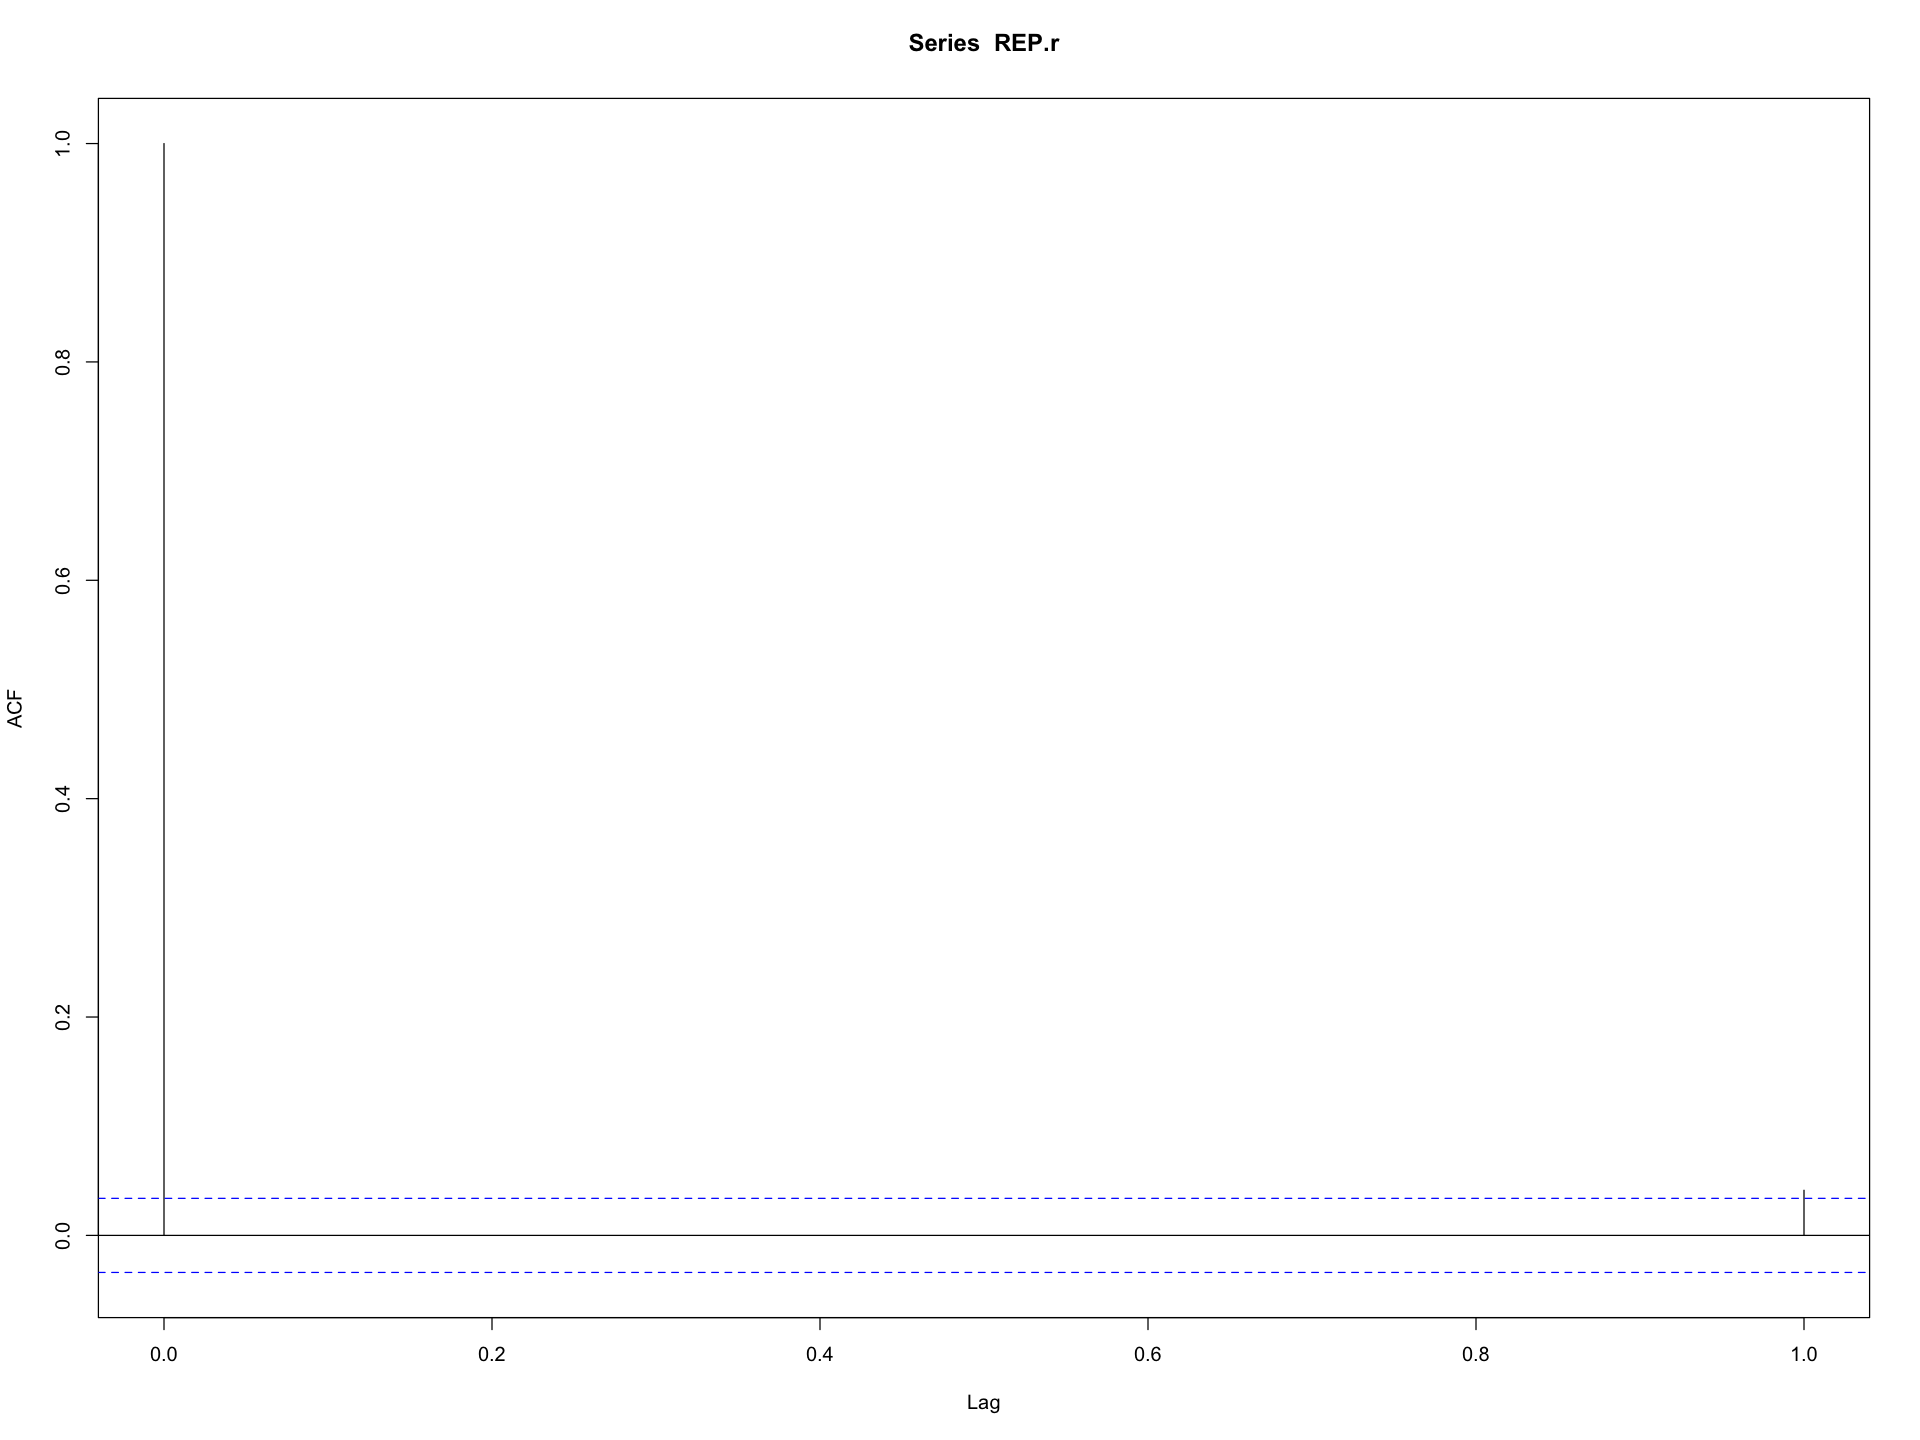

In [113]:
acf(REP.r, 1) # Not much to see – barely a blip – but over the 95% line. Let’s further test this idea.

Obtain 2500 draws from the distribution of the first autocorrelation using the
replicate function.

We operate under the null hypothesis of independence, assuming rational
markets (i.e, rational markets is a “maintained hypothesis”).

In [116]:
set.seed(1016)
acf.coeff.sim <- replicate(2500, acf(sample(REP.r,
    size = 2500, replace = FALSE), lag = 2,
    plot = FALSE)$acf[2])

summary(acf.coeff.sim)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.046291  0.007821  0.021198  0.021587  0.035471  0.088819 

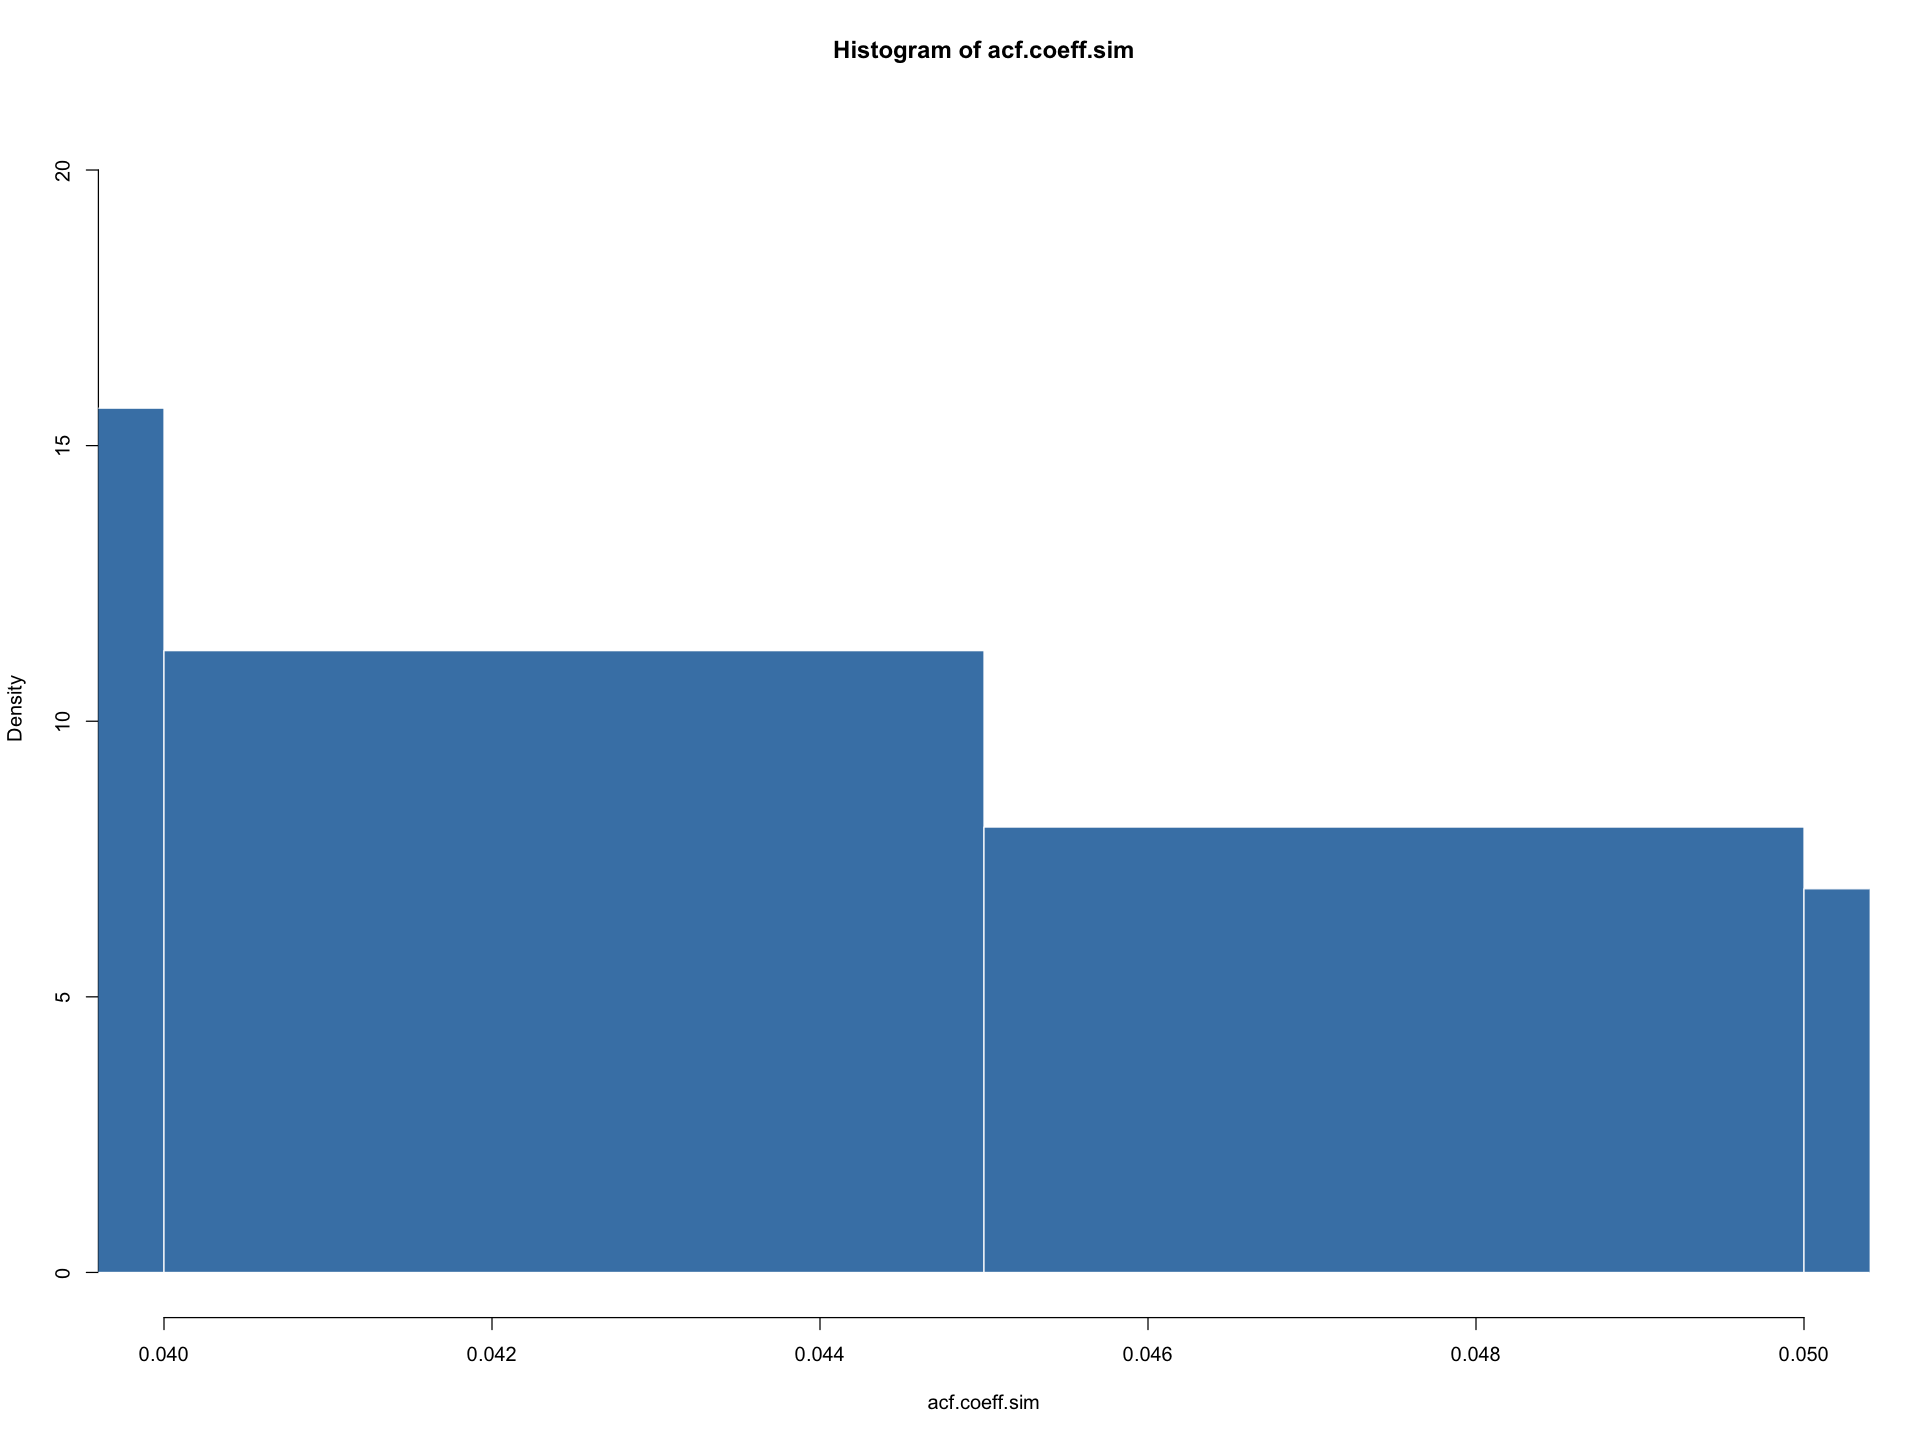

In [115]:
hist(acf.coeff.sim, probability = TRUE,
    breaks = "FD", xlim = c(0.04, 0.05),
    col = "steelblue", border = "white")

### Try this out
Investigate tolerances of 5% and 1% from both ends of the distribution of the 1-lag
acf coefficient using these statements.

 **At 95% tolerance level**

In [117]:
quantile(acf.coeff.sim, probs = c(0.025,
0.975))

2.5%       97.5% 
-0.01877628  0.06080560

In [118]:
# At 99% tolerance level
quantile(acf.coeff.sim, probs = c(0.005,
0.995))

0.5%       99.5% 
-0.03038463  0.07643313

In [119]:
# And the
(t.sim <- mean(acf.coeff.sim)/sd(acf.coeff.sim))

[1] 1.054498

### Some (highly preliminary and provisional answers)

1 Quantile values are very narrow. . .

2 How narrow (feeling like rejecting the null hypothesis)?

3 t-stat is huge, but. . .

**4 . . . no buts!, the probability that we would be wrong to reject the null
hypothesis is very small.**

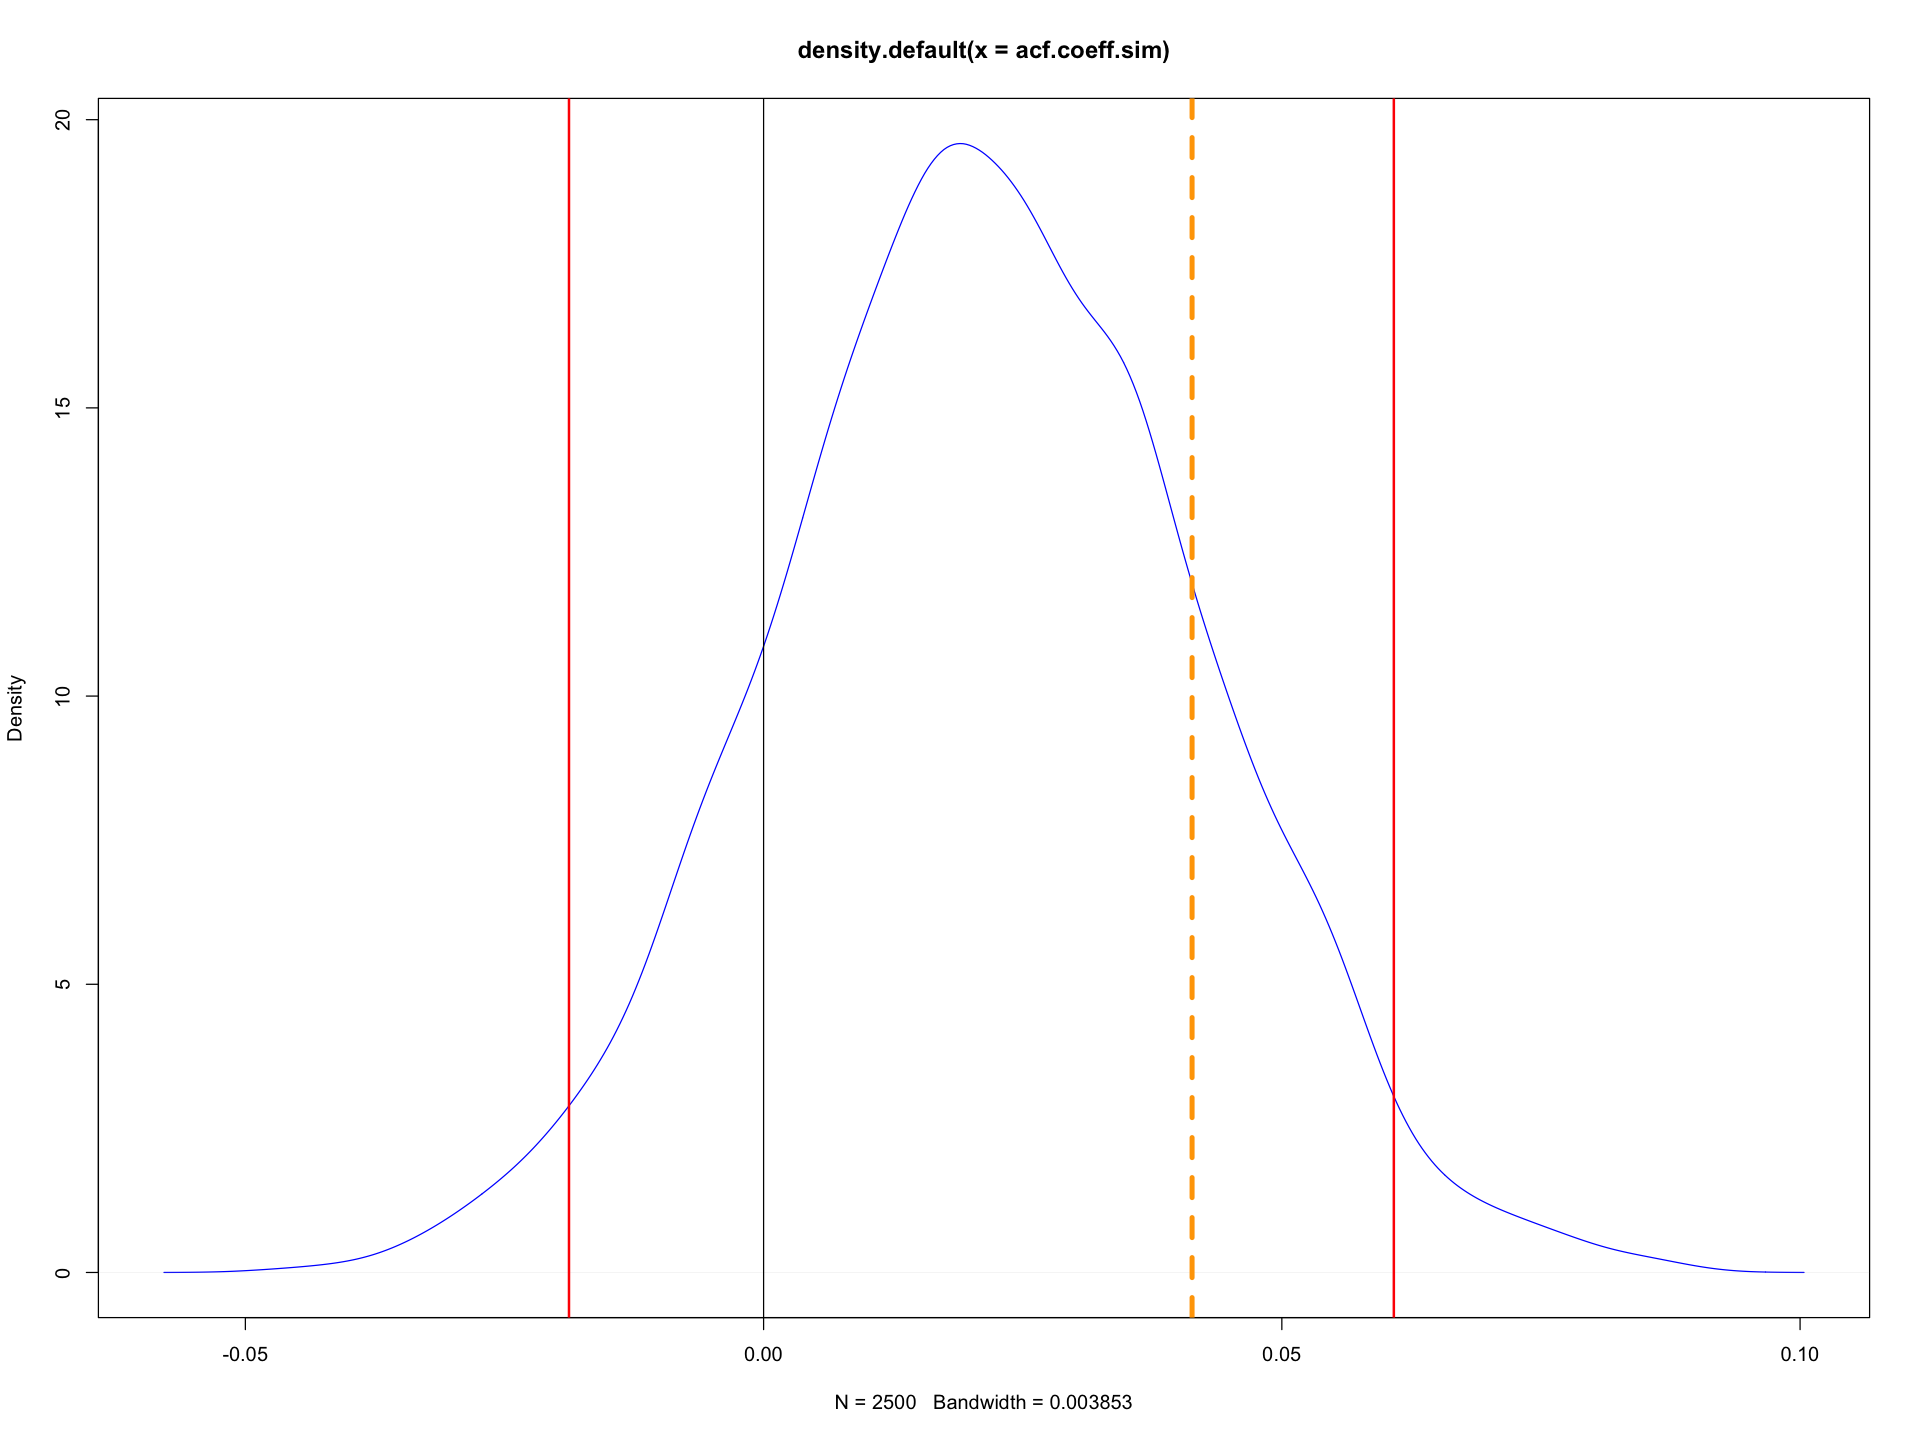

In [121]:
# Plot the simulated density and lower and upper quantiles, along with the estimate of the lag-1 coefficient:
plot(density(acf.coeff.sim), col = "blue")
abline(v = 0)
abline(v = quantile(acf.coeff.sim, probs = c(0.025,
0.975)), lwd = 2, col = "red")
abline(v = acf(REP.r, 1, plot = FALSE)$acf[2],
lty = 2, lwd = 4, col = "orange")


## Can we reject the null hypothesis that the coefficient = 0? Is the market “efficient”?

1 Reject the null hypothesis since there is a less than 0.02% chance that the
coefficient is zero.

2 Read [Fama(2013, p. 365-367)]https://www.nobelprize.org/nobel_
prizes/economic-sciences/laureates/2013/fama-lecture.pdf for a
diagnosis.

3 If the model is correct (ACF lag-1) then the previous day’s return can predict
today’s return according to our analysis. Thus the market would seem to be
inefficient.

4 This means we might be able to create a profitable trading strategy that
makes use of the little bit of correlation we found to be significant (net of the
costs of trading).